# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold, StratifiedKFold

# IMPORT DATA

In [2]:
df_bece = pd.read_excel('BECE RESULT.xlsx')
df_ssce = pd.read_excel('SSCE RESULT.xlsx')
df_jamb = pd.read_excel('JAMB RESULT.xlsx')

In [3]:
df_bece.head()

,NIGERIAN - TURKISH INTERNATIONAL COLLEGE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,STATISTICAL ANALYSIS OF JULY 2014/2015 BECE R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DETAILED RESULTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Year,CANDIDATE NAME,School,Boarding,City,Gender,ENGLISH,MATHEMATICS,AGRIC,BASIC SCIENCE,BASIC TECHNOLOGY,SOCIAL STUDY,CIVIC EDUCATION,CREATIVE AND CULTURAL ART
3,1,2012,ABDULAZEEZ OLAITAN BAYONLE,Abuja Boys,Boarding,Osun,Boy,70,70,90,70,70,70,70,70
4,2,2012,ABDULLAHI MUJAHID,Abuja Boys,Boarding,Abuja,Boy,70,55,70,55,70,70,55,70


In [4]:
df_ssce.head()

,NIGERIAN TURKISH INTERNATIONAL COLLEGE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,STATISTICAL ANALYSIS OF JULY 2015 NECO RESULT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DETAILED RESULTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S/NO.,Year,CANDIDATE NAME,School,Deparment,Boarding,City,Gender,ENGLISH,MATHEMATIS,BIOLOGY,CHEMISTRY,PHYSICS,ECONOMICS,GOVERNMENT,LITERATURE
3,1,2015,ABDULAZEEZ OLAITAN BAYONLE,Abuja Boys,Science,Boarding,Osun,Boy,72,98,72,57,57,NaN,NaN,NaN
4,2,2015,ABDULLAHI MUJAHID,Abuja Boys,Art,Boarding,Abuja,Boy,72,52,NaN,NaN,NaN,62,72,52


In [5]:
df_jamb.head()

,NIGERIAN - TURKISH INTERNATIONAL COLLEGE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,STATISTICAL ANALYSIS OF JAMB,NaN,NaN,NaN,NaN,NaN,NaN
1,ABDULAZEEZ OLAITAN BAYONLE,Abuja Boys,Science,Boarding,Osun,Boy,223.0
2,ABDULLAHI MUJAHID,Abuja Boys,Art,Boarding,Abuja,Boy,230.0
3,ABDULLAHI MUSTAPHA,Abuja Boys,Art,Boarding,Abuja,Boy,185.0
4,ABDULSALAM AMINA UMMI,Abuja Girls,Art,Boarding,Kogi,Girl,202.0


In [6]:
df_bece.columns = df_bece.iloc[2]

In [7]:
df_bece = df_bece.drop(df_bece.index[0:3])

In [8]:
df_bece = df_bece.drop(df_bece.columns[0], axis=1)

In [9]:
df_bece.reset_index(drop=True, inplace=True)

In [10]:
df_bece.head()

2,Year,CANDIDATE NAME,School,Boarding,City,Gender,ENGLISH,MATHEMATICS,AGRIC,BASIC SCIENCE,BASIC TECHNOLOGY,SOCIAL STUDY,CIVIC EDUCATION,CREATIVE AND CULTURAL ART
0,2012,ABDULAZEEZ OLAITAN BAYONLE,Abuja Boys,Boarding,Osun,Boy,70,70,90,70,70,70,70,70
1,2012,ABDULLAHI MUJAHID,Abuja Boys,Boarding,Abuja,Boy,70,55,70,55,70,70,55,70
2,2012,ABDULLAHI MUSTAPHA,Abuja Boys,Boarding,Abuja,Boy,70,55,70,70,70,70,55,70
3,2012,ABDULSALAM AMINA UMMI,Abuja Girls,Boarding,Kogi,Girl,70,55,70,55,70,70,70,55
4,2012,ABIOYE FIYINFOLUWA OLUWATOYOSI,Abuja Girls,Boarding,Kogi,Girl,70,55,70,70,90,70,70,70


In [11]:
df_bece.describe()

2,Year,CANDIDATE NAME,School,Boarding,City,Gender,ENGLISH,MATHEMATICS,AGRIC,BASIC SCIENCE,BASIC TECHNOLOGY,SOCIAL STUDY,CIVIC EDUCATION,CREATIVE AND CULTURAL ART
count,586,586,586,586,586,586,586,586,586,586,586,586,586,586
unique,4,585,3,2,33,2,4,4,4,4,4,4,4,4
top,2013,GAIDAM IBRAHIM IBRAHIM,Abuja Co-Ed,Boarding,Abuja,Boy,70,55,70,70,70,70,70,70
freq,150,2,214,302,314,304,423,284,297,310,359,385,378,383


In [12]:
df_ssce.head()

,NIGERIAN TURKISH INTERNATIONAL COLLEGE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,STATISTICAL ANALYSIS OF JULY 2015 NECO RESULT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DETAILED RESULTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S/NO.,Year,CANDIDATE NAME,School,Deparment,Boarding,City,Gender,ENGLISH,MATHEMATIS,BIOLOGY,CHEMISTRY,PHYSICS,ECONOMICS,GOVERNMENT,LITERATURE
3,1,2015,ABDULAZEEZ OLAITAN BAYONLE,Abuja Boys,Science,Boarding,Osun,Boy,72,98,72,57,57,NaN,NaN,NaN
4,2,2015,ABDULLAHI MUJAHID,Abuja Boys,Art,Boarding,Abuja,Boy,72,52,NaN,NaN,NaN,62,72,52


In [13]:
df_ssce.columns = df_ssce.iloc[2]

In [14]:
df_ssce = df_ssce.drop(df_ssce.index[0:3])

In [15]:
df_ssce = df_ssce.drop(df_ssce.columns[0], axis=1)

In [16]:
df_ssce

2,Year,CANDIDATE NAME,School,Deparment,Boarding,City,Gender,ENGLISH,MATHEMATIS,BIOLOGY,CHEMISTRY,PHYSICS,ECONOMICS,GOVERNMENT,LITERATURE
3,2015,ABDULAZEEZ OLAITAN BAYONLE,Abuja Boys,Science,Boarding,Osun,Boy,72,98,72,57,57,NaN,NaN,NaN
4,2015,ABDULLAHI MUJAHID,Abuja Boys,Art,Boarding,Abuja,Boy,72,52,NaN,NaN,NaN,62,72,52
5,2015,ABDULLAHI MUSTAPHA,Abuja Boys,Art,Boarding,Abuja,Boy,52,42,NaN,NaN,NaN,62,52,52
6,2015,ABDULSALAM AMINA UMMI,Abuja Girls,Art,Boarding,Kogi,Girl,62,72,NaN,NaN,NaN,57,52,52
7,2015,ABIOYE FIYINFOLUWA OLUWATOYOSI,Abuja Girls,Science,Boarding,Kogi,Girl,62,98,52,72,72,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,2018,YAHAYA HANEEF DANZARIA,Abuja Boys,Science,Day Scholar,Abuja,Boy,87,57,72,52,47,NaN,NaN,NaN
585,2018,YUGUDA ABUBAKAR SADIQ,Abuja Co-Ed,Science,Day Scholar,Abuja,Boy,57,72,57,47,62,NaN,NaN,NaN
586,2018,YUSUF AMINA BINJI,Abuja Girls,Art,Boarding,Abuja,Girl,72,57,NaN,NaN,NaN,72,57,52
587,2018,ZANNA FATIMA ABBA,Abuja Girls,Science,Day Scholar,Abuja,Girl,98,72,57,87,62,NaN,NaN,NaN


In [17]:
df_ssce.reset_index(drop=True, inplace=True)

In [18]:
df_ssce.head()

2,Year,CANDIDATE NAME,School,Deparment,Boarding,City,Gender,ENGLISH,MATHEMATIS,BIOLOGY,CHEMISTRY,PHYSICS,ECONOMICS,GOVERNMENT,LITERATURE
0,2015,ABDULAZEEZ OLAITAN BAYONLE,Abuja Boys,Science,Boarding,Osun,Boy,72,98,72,57,57,NaN,NaN,NaN
1,2015,ABDULLAHI MUJAHID,Abuja Boys,Art,Boarding,Abuja,Boy,72,52,NaN,NaN,NaN,62,72,52
2,2015,ABDULLAHI MUSTAPHA,Abuja Boys,Art,Boarding,Abuja,Boy,52,42,NaN,NaN,NaN,62,52,52
3,2015,ABDULSALAM AMINA UMMI,Abuja Girls,Art,Boarding,Kogi,Girl,62,72,NaN,NaN,NaN,57,52,52
4,2015,ABIOYE FIYINFOLUWA OLUWATOYOSI,Abuja Girls,Science,Boarding,Kogi,Girl,62,98,52,72,72,NaN,NaN,NaN


In [19]:
df_ssce.describe()

2,Year,CANDIDATE NAME,School,Deparment,Boarding,City,Gender,ENGLISH,MATHEMATIS,BIOLOGY,CHEMISTRY,PHYSICS,ECONOMICS,GOVERNMENT,LITERATURE
count,586,586,586,584,586,586,586,586,586,387,387,387,201,201,197
unique,4,585,3,2,2,33,2,9,9,9,9,9,8,8,8
top,2016,GAIDAM IBRAHIM IBRAHIM,Abuja Co-Ed,Science,Boarding,Abuja,Boy,72,72,57,52,57,62,52,52
freq,150,2,214,385,302,314,304,154,134,117,113,118,53,60,71


In [20]:
df_jamb.head()

,NIGERIAN - TURKISH INTERNATIONAL COLLEGE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,STATISTICAL ANALYSIS OF JAMB,NaN,NaN,NaN,NaN,NaN,NaN
1,ABDULAZEEZ OLAITAN BAYONLE,Abuja Boys,Science,Boarding,Osun,Boy,223.0
2,ABDULLAHI MUJAHID,Abuja Boys,Art,Boarding,Abuja,Boy,230.0
3,ABDULLAHI MUSTAPHA,Abuja Boys,Art,Boarding,Abuja,Boy,185.0
4,ABDULSALAM AMINA UMMI,Abuja Girls,Art,Boarding,Kogi,Girl,202.0


In [21]:
df_jamb = df_jamb.drop(df_jamb.index[0])

In [22]:
df_jamb.reset_index(drop=True, inplace=True)

In [23]:
df_jamb.head()

,NIGERIAN - TURKISH INTERNATIONAL COLLEGE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,ABDULAZEEZ OLAITAN BAYONLE,Abuja Boys,Science,Boarding,Osun,Boy,223.0
1,ABDULLAHI MUJAHID,Abuja Boys,Art,Boarding,Abuja,Boy,230.0
2,ABDULLAHI MUSTAPHA,Abuja Boys,Art,Boarding,Abuja,Boy,185.0
3,ABDULSALAM AMINA UMMI,Abuja Girls,Art,Boarding,Kogi,Girl,202.0
4,ABIOYE FIYINFOLUWA OLUWATOYOSI,Abuja Girls,Science,Boarding,Kogi,Girl,245.0


In [24]:
df_jamb.describe()

,Unnamed: 6
count,586.000000
mean,224.575085
std,28.433614
min,105.000000
25%,204.000000
50%,220.000000
75%,244.000000
max,330.000000


# MERGE DATA FRAMES

In [25]:
df_bece.columns = ['Year_BECE', 'CANDIDATE NAME', 'School', 'Boarding_BECE', 'City', 'Gender',
       'ENGLISH_BECE', 'MATHEMATICS_BECE', 'AGRIC_BECE', 'BASIC SCIENCE_BECE', 'BASIC TECHNOLOGY_BECE',
       'SOCIAL STUDY_BECE', 'CIVIC EDUCATION_BECE', 'CREATIVE AND CULTURAL ART_BECE']

In [26]:
df_ssce.columns = ['Year_SSCE', 'CANDIDATE NAME', 'School_SSCE', 'Department', 'Boarding_SSCE', 'City',
       'Gender', 'ENGLISH_SSCE', 'MATHEMATICS_SSCE', 'BIOLOGY_SSCE', 'CHEMISTRY_SSCE', 'PHYSICS_SSCE',
       'ECONOMICS_SSCE', 'GOVERNMENT_SSCE', 'LITERATURE_SSCE']

In [27]:
df_jamb.columns = ['CANDIDATE NAME', 'School', 'Department', 'Boarding', 'City',
       'Gender', 'JAMB_SCORE']

In [28]:
df_jamb.head()

,CANDIDATE NAME,School,Department,Boarding,City,Gender,JAMB_SCORE
0,ABDULAZEEZ OLAITAN BAYONLE,Abuja Boys,Science,Boarding,Osun,Boy,223.0
1,ABDULLAHI MUJAHID,Abuja Boys,Art,Boarding,Abuja,Boy,230.0
2,ABDULLAHI MUSTAPHA,Abuja Boys,Art,Boarding,Abuja,Boy,185.0
3,ABDULSALAM AMINA UMMI,Abuja Girls,Art,Boarding,Kogi,Girl,202.0
4,ABIOYE FIYINFOLUWA OLUWATOYOSI,Abuja Girls,Science,Boarding,Kogi,Girl,245.0


In [29]:
df = pd.concat([df_bece, df_ssce[['Year_SSCE', 'Department', 'Boarding_SSCE',
       'ENGLISH_SSCE', 'MATHEMATICS_SSCE', 'BIOLOGY_SSCE', 'CHEMISTRY_SSCE', 'PHYSICS_SSCE',
       'ECONOMICS_SSCE', 'GOVERNMENT_SSCE', 'LITERATURE_SSCE']], df_jamb[['JAMB_SCORE']]], axis=1, ignore_index=False)



In [30]:
df.head()

,Year_BECE,CANDIDATE NAME,School,Boarding_BECE,City,Gender,ENGLISH_BECE,MATHEMATICS_BECE,AGRIC_BECE,BASIC SCIENCE_BECE,...,Boarding_SSCE,ENGLISH_SSCE,MATHEMATICS_SSCE,BIOLOGY_SSCE,CHEMISTRY_SSCE,PHYSICS_SSCE,ECONOMICS_SSCE,GOVERNMENT_SSCE,LITERATURE_SSCE,JAMB_SCORE
0,2012,ABDULAZEEZ OLAITAN BAYONLE,Abuja Boys,Boarding,Osun,Boy,70,70,90,70,...,Boarding,72,98,72,57,57,NaN,NaN,NaN,223.0
1,2012,ABDULLAHI MUJAHID,Abuja Boys,Boarding,Abuja,Boy,70,55,70,55,...,Boarding,72,52,NaN,NaN,NaN,62,72,52,230.0
2,2012,ABDULLAHI MUSTAPHA,Abuja Boys,Boarding,Abuja,Boy,70,55,70,70,...,Boarding,52,42,NaN,NaN,NaN,62,52,52,185.0
3,2012,ABDULSALAM AMINA UMMI,Abuja Girls,Boarding,Kogi,Girl,70,55,70,55,...,Boarding,62,72,NaN,NaN,NaN,57,52,52,202.0
4,2012,ABIOYE FIYINFOLUWA OLUWATOYOSI,Abuja Girls,Boarding,Kogi,Girl,70,55,70,70,...,Boarding,62,98,52,72,72,NaN,NaN,NaN,245.0


In [31]:
df.count()

Year_BECE                         586
CANDIDATE NAME                    586
School                            586
Boarding_BECE                     586
City                              586
Gender                            586
ENGLISH_BECE                      586
MATHEMATICS_BECE                  586
AGRIC_BECE                        586
BASIC SCIENCE_BECE                586
BASIC TECHNOLOGY_BECE             586
SOCIAL STUDY_BECE                 586
CIVIC EDUCATION_BECE              586
CREATIVE AND CULTURAL ART_BECE    586
Year_SSCE                         586
Department                        584
Boarding_SSCE                     586
ENGLISH_SSCE                      586
MATHEMATICS_SSCE                  586
BIOLOGY_SSCE                      387
CHEMISTRY_SSCE                    387
PHYSICS_SSCE                      387
ECONOMICS_SSCE                    201
GOVERNMENT_SSCE                   201
LITERATURE_SSCE                   197
JAMB_SCORE                        586
dtype: int64

In [32]:
len(df)

586

# DATA VISUALIZATION AND REPRESENTATION

In [33]:
df['JAMB_SCORE_Grades'] = 0

In [34]:
for i in range(len(df)):
    score = int(df['JAMB_SCORE'][i])
    if score >= 180:
        df['JAMB_SCORE_Grades'][i] = "Pass"
    else:
        df['JAMB_SCORE_Grades'][i] = "Fail"

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

# Pair Plot

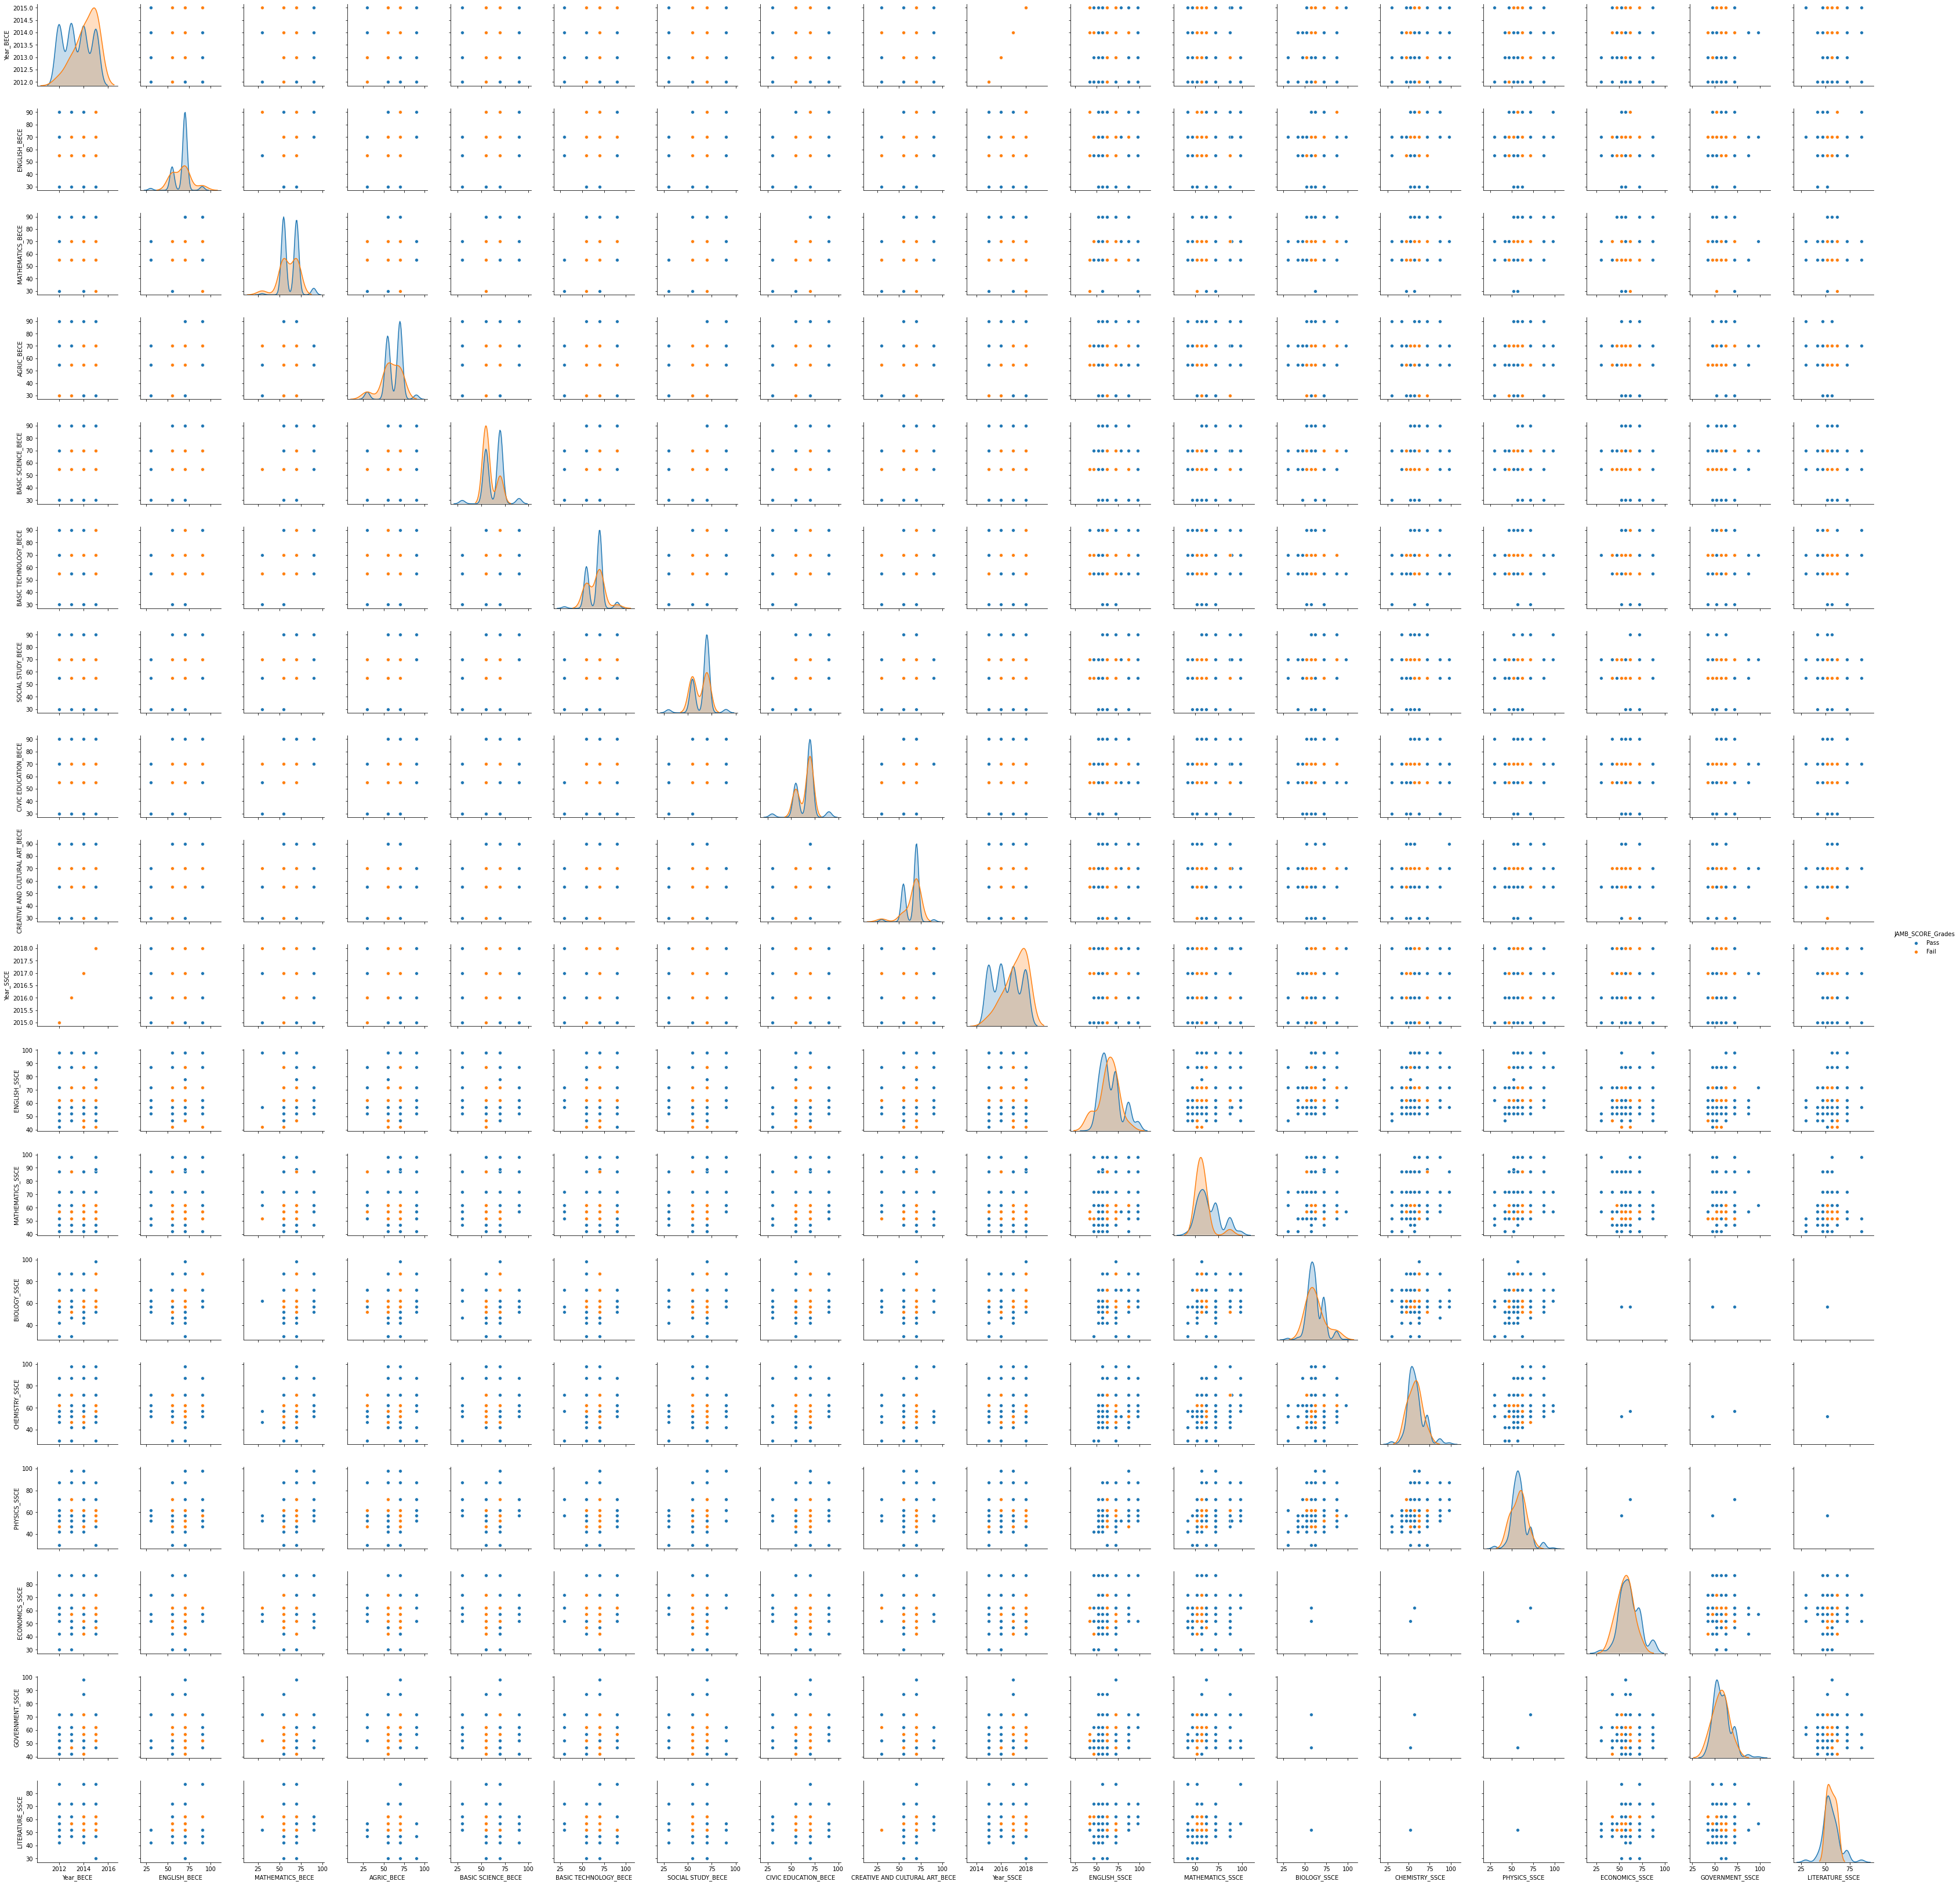

In [35]:
sns.pairplot(df[['Year_BECE', 'CANDIDATE NAME', 'School', 'Boarding_BECE', 'City',
       'Gender', 'ENGLISH_BECE', 'MATHEMATICS_BECE', 'AGRIC_BECE',
       'BASIC SCIENCE_BECE', 'BASIC TECHNOLOGY_BECE', 'SOCIAL STUDY_BECE',
       'CIVIC EDUCATION_BECE', 'CREATIVE AND CULTURAL ART_BECE', 'Year_SSCE',
       'Department', 'Boarding_SSCE', 'ENGLISH_SSCE', 'MATHEMATICS_SSCE',
       'BIOLOGY_SSCE', 'CHEMISTRY_SSCE', 'PHYSICS_SSCE', 'ECONOMICS_SSCE',
       'GOVERNMENT_SSCE', 'LITERATURE_SSCE',
       'JAMB_SCORE_Grades']], hue="JAMB_SCORE_Grades")
plt.show()

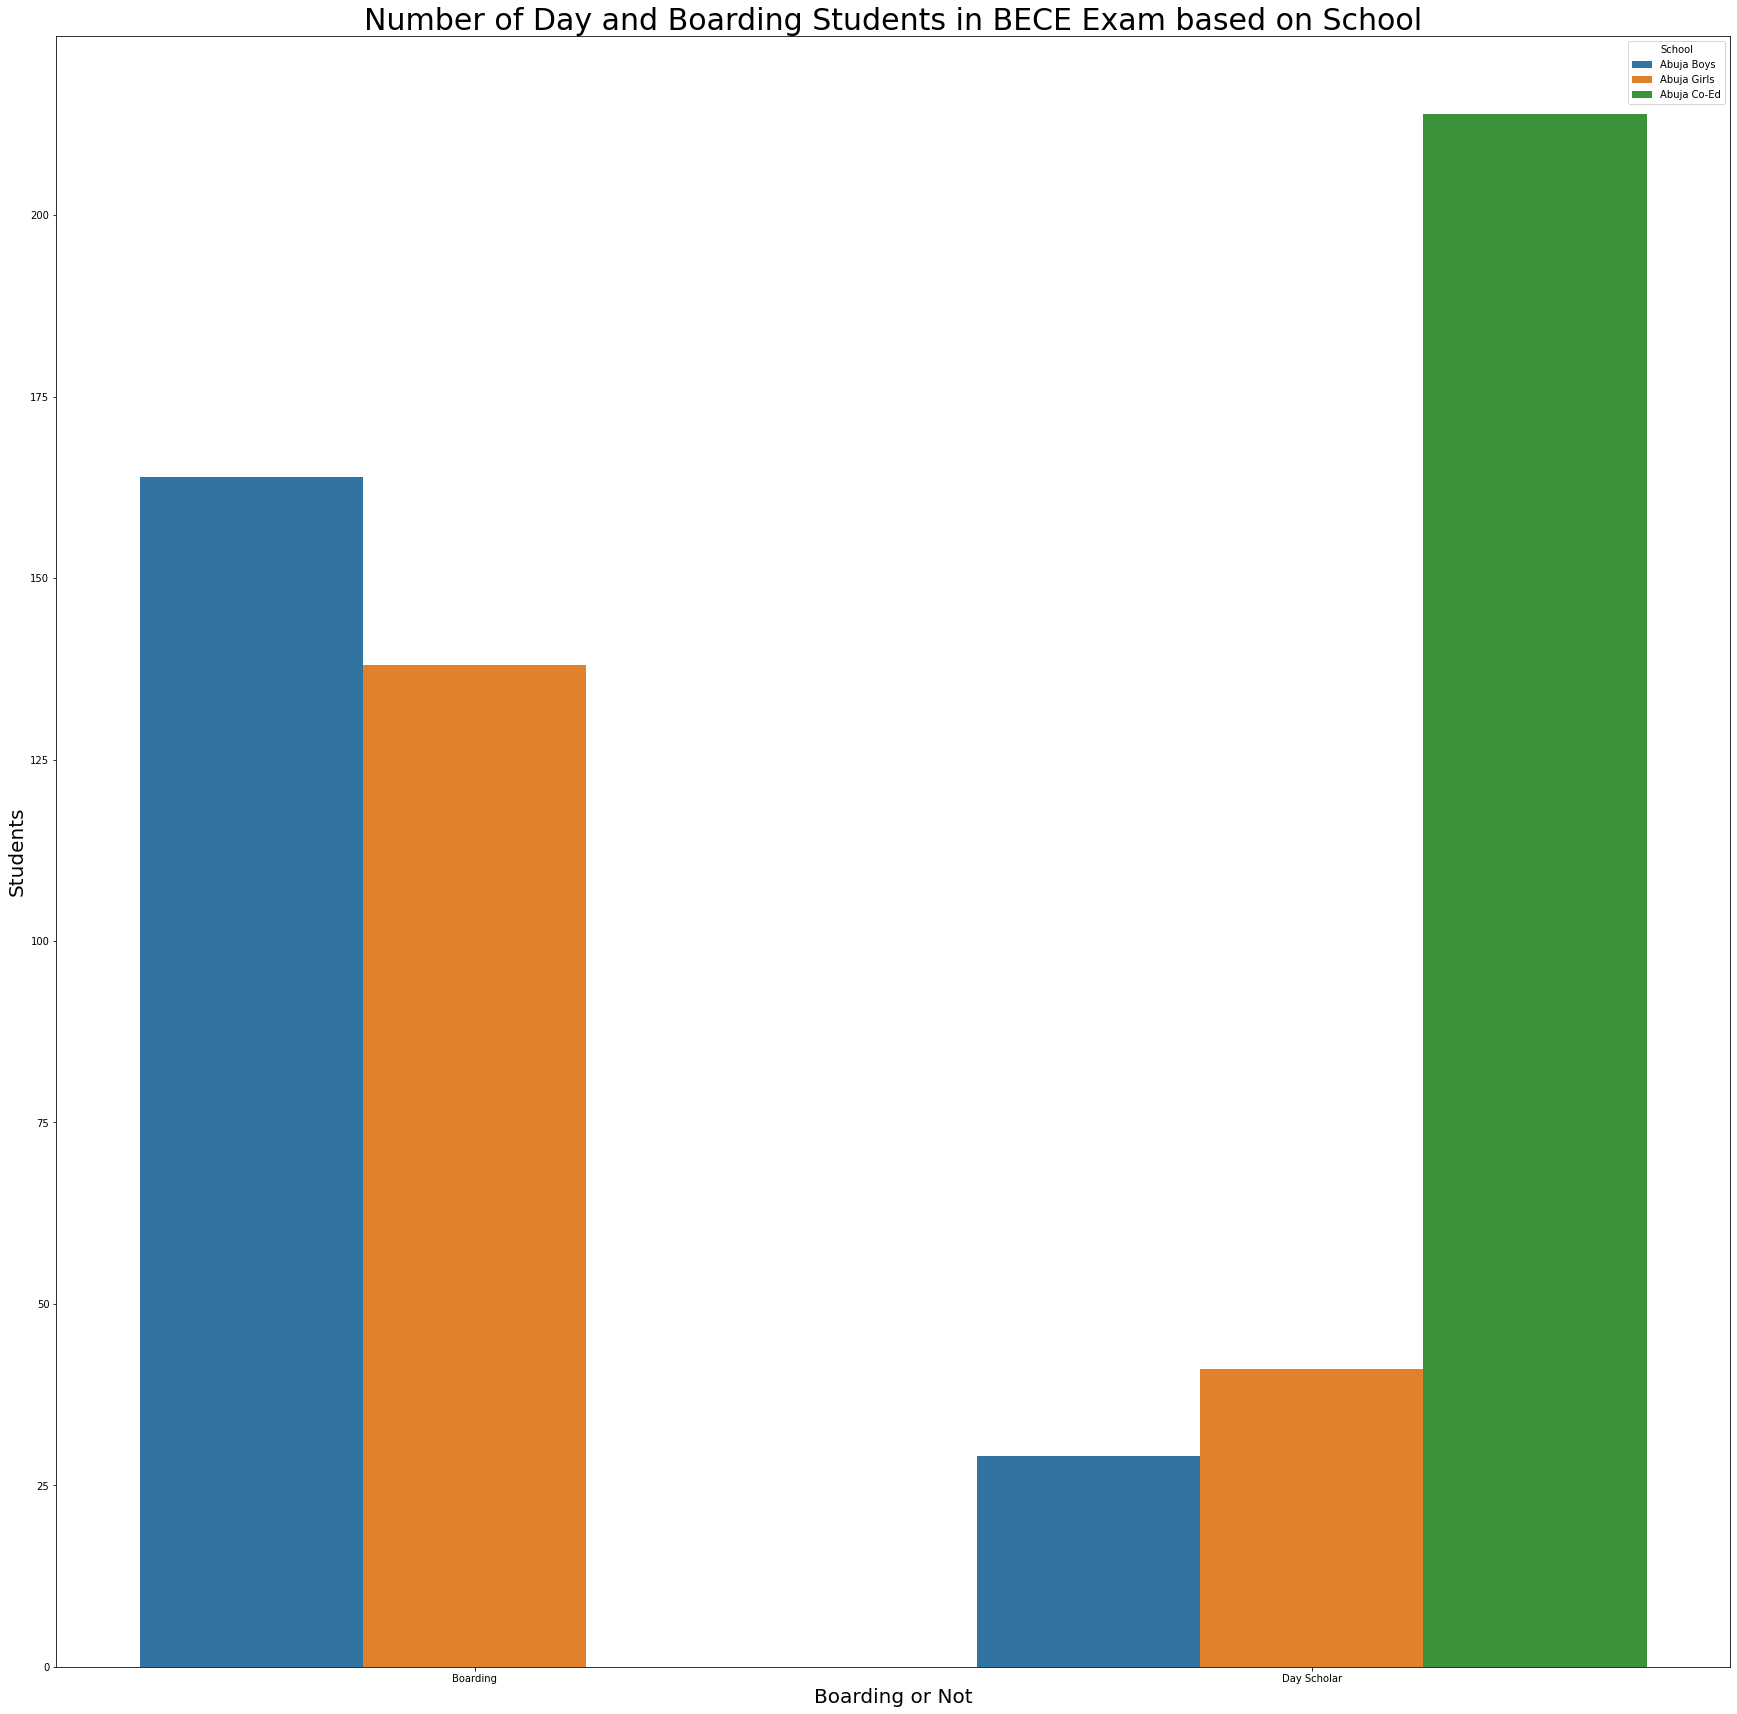

In [36]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Boarding_BECE'],hue='School',data=df)
plt.xlabel('Boarding or Not', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Number of Day and Boarding Students in BECE Exam based on School", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

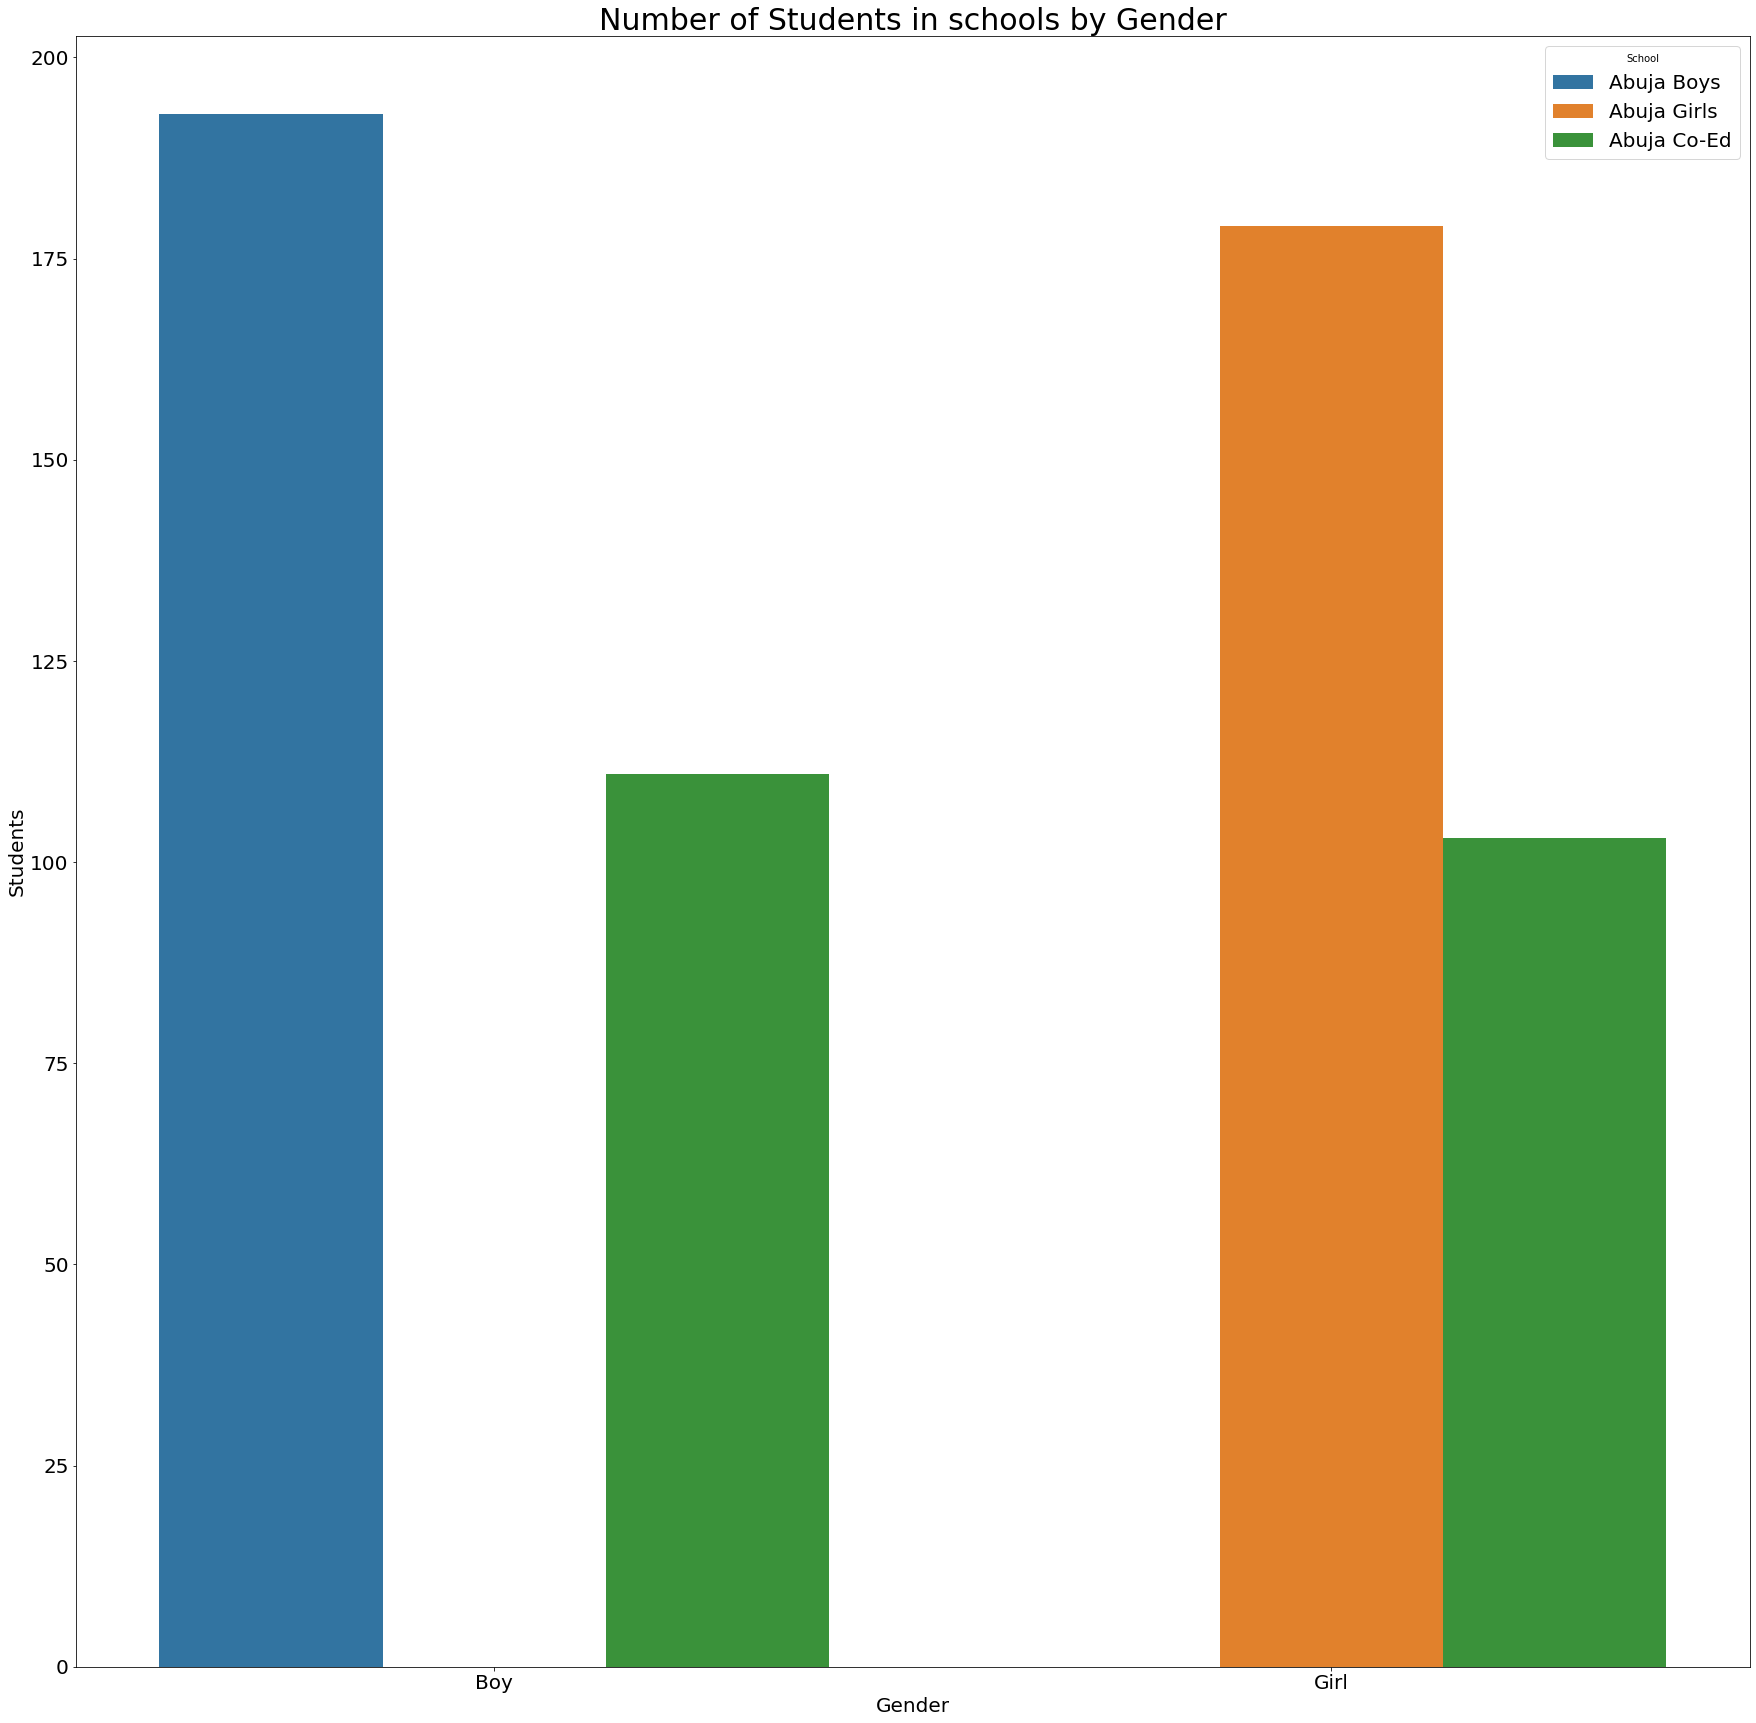

In [37]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df_bece['Gender'],hue='School',data=df_bece)
plt.xlabel('Gender', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Number of Students in schools by Gender", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

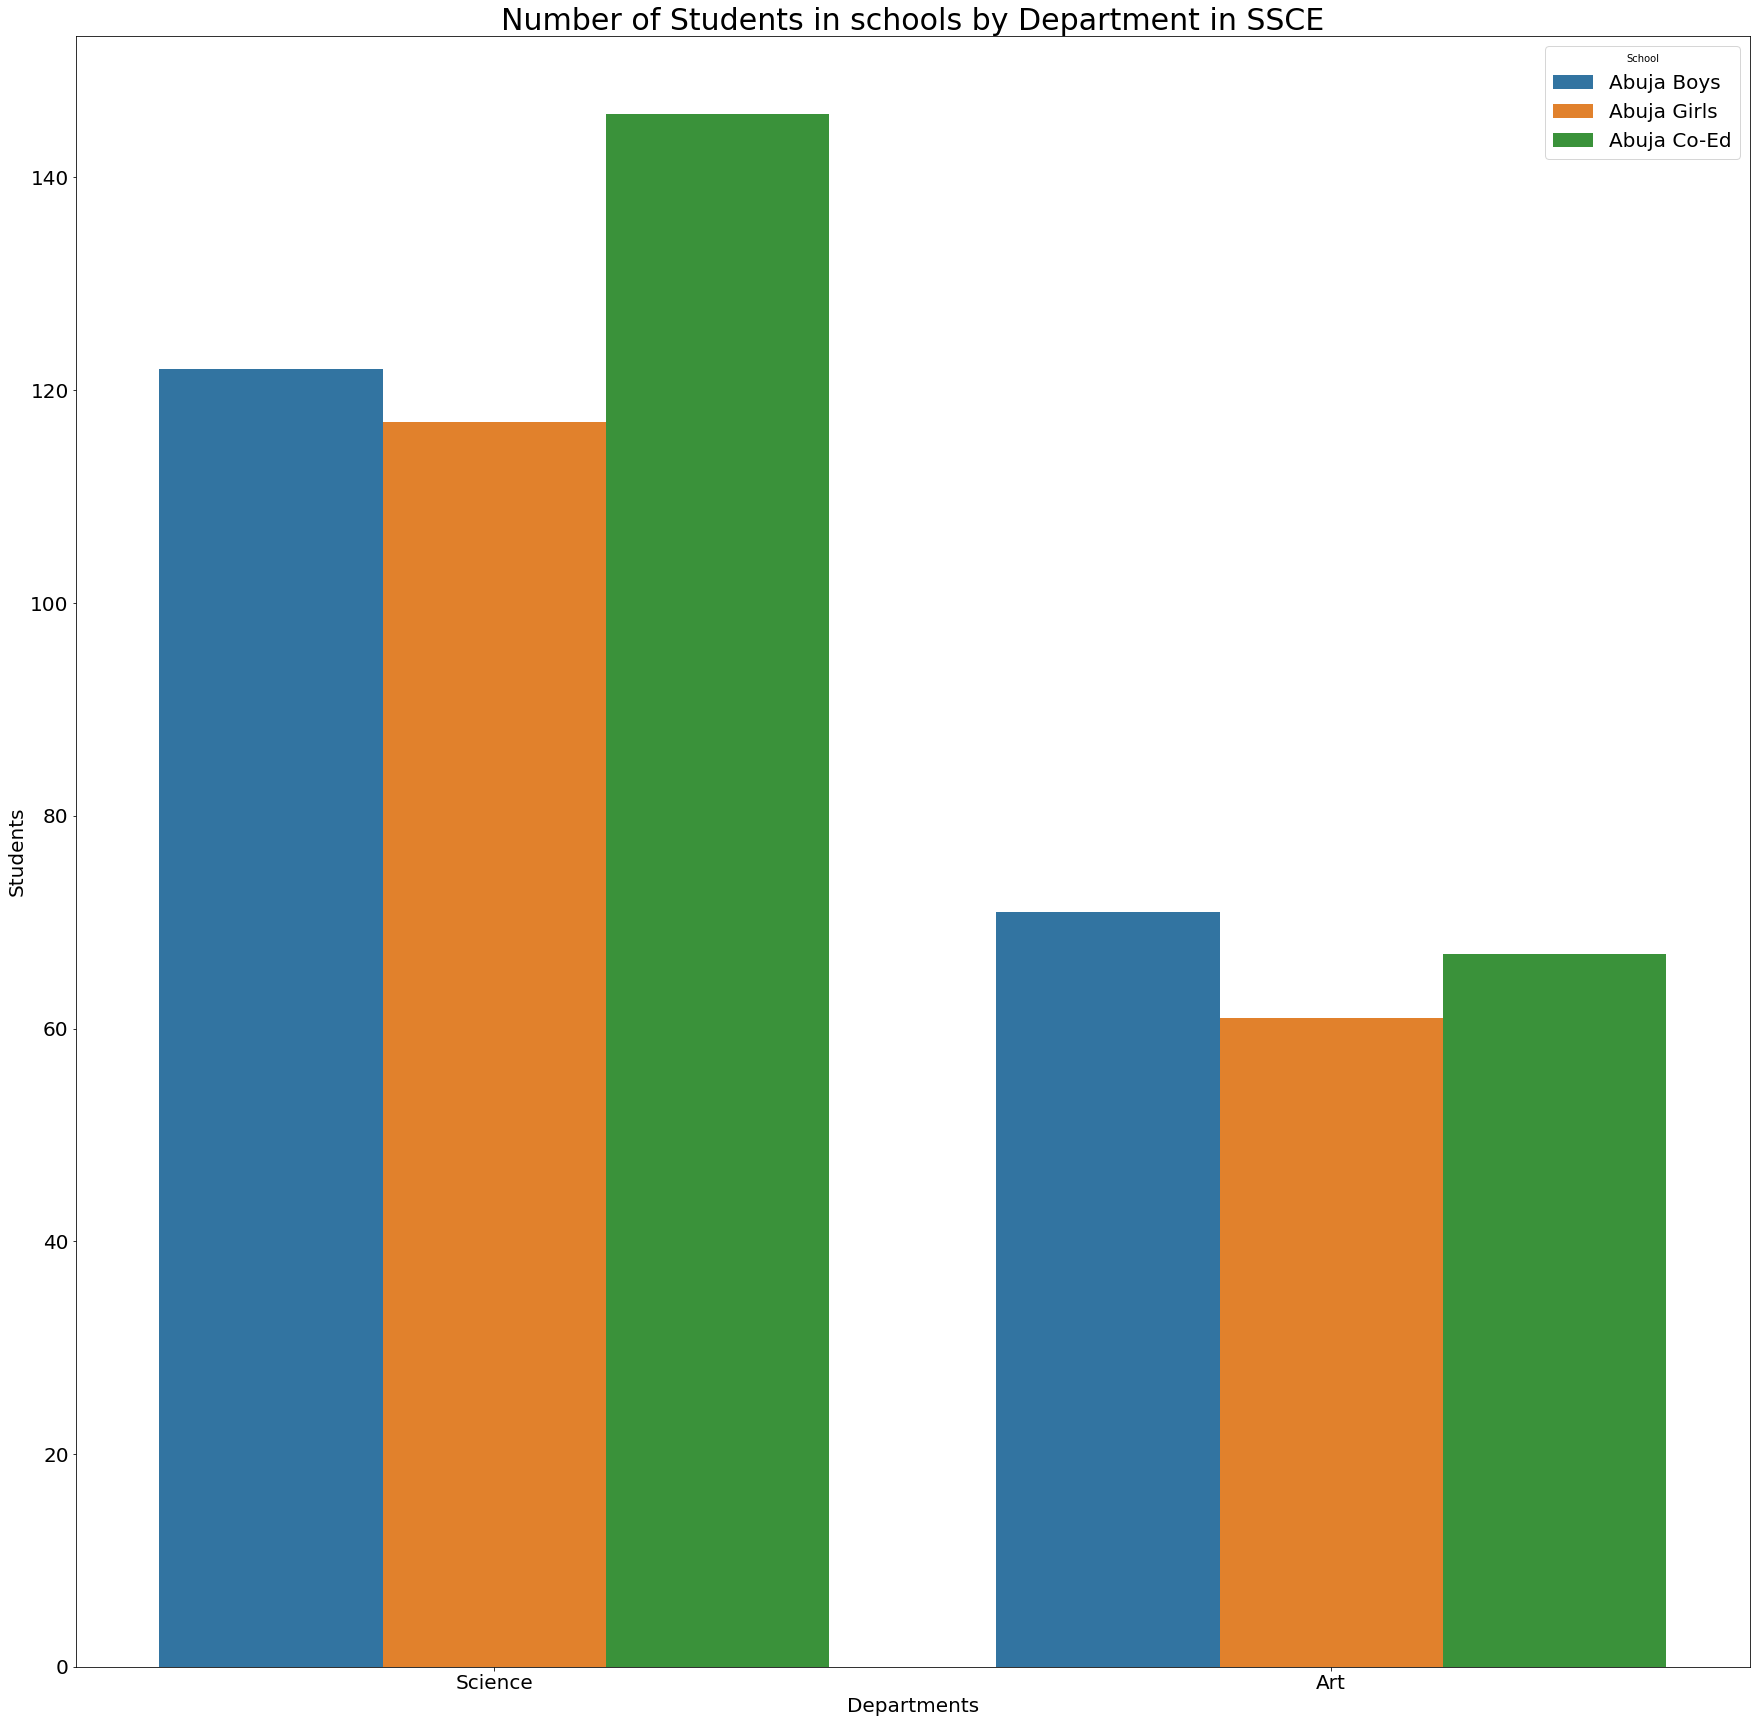

In [38]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['Department'],hue='School',data=df)
plt.xlabel('Departments', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Number of Students in schools by Department in SSCE", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

### GROUP STUDENT SCORES IN EACH SUBJECTS INTO GRADES (A, B, C, D, E, F)

In [39]:
df.count()

Year_BECE                         586
CANDIDATE NAME                    586
School                            586
Boarding_BECE                     586
City                              586
Gender                            586
ENGLISH_BECE                      586
MATHEMATICS_BECE                  586
AGRIC_BECE                        586
BASIC SCIENCE_BECE                586
BASIC TECHNOLOGY_BECE             586
SOCIAL STUDY_BECE                 586
CIVIC EDUCATION_BECE              586
CREATIVE AND CULTURAL ART_BECE    586
Year_SSCE                         586
Department                        584
Boarding_SSCE                     586
ENGLISH_SSCE                      586
MATHEMATICS_SSCE                  586
BIOLOGY_SSCE                      387
CHEMISTRY_SSCE                    387
PHYSICS_SSCE                      387
ECONOMICS_SSCE                    201
GOVERNMENT_SSCE                   201
LITERATURE_SSCE                   197
JAMB_SCORE                        586
JAMB_SCORE_G

In [40]:
len(df)

586

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
df['ENGLISH_BECE_Grades'] = 0

In [43]:
for i in range(len(df)):
    score = int(df['ENGLISH_BECE'][i])
    if score <= 39:
        df['ENGLISH_BECE_Grades'][i] = "F"
    elif score >=40 and score <= 44:
        df['ENGLISH_BECE_Grades'][i] = "E"
    elif score >=45 and score <= 49:
        df['ENGLISH_BECE_Grades'][i] = "D"
    elif score >=50 and score <= 59:
        df['ENGLISH_BECE_Grades'][i] = "C"
    elif score >=60 and score <= 69:
        df['ENGLISH_BECE_Grades'][i] = "B"
    elif score >=70:
        df['ENGLISH_BECE_Grades'][i] = "A"

In [44]:
df['MATHEMATICS_BECE_Grades'] = 0

In [45]:
for i in range(len(df)):
    score = int(df['MATHEMATICS_BECE'][i])
    if score <= 39:
        df['MATHEMATICS_BECE_Grades'][i] = "F"
    elif score >=40 and score <= 44:
        df['MATHEMATICS_BECE_Grades'][i] = "E"
    elif score >=45 and score <= 49:
        df['MATHEMATICS_BECE_Grades'][i] = "D"
    elif score >=50 and score <= 59:
        df['MATHEMATICS_BECE_Grades'][i] = "C"
    elif score >=60 and score <= 69:
        df['MATHEMATICS_BECE_Grades'][i] = "B"
    elif score >=70:
        df['MATHEMATICS_BECE_Grades'][i] = "A"

In [46]:
df['AGRIC_BECE_Grades'] = 0

In [47]:
for i in range(len(df)):
    score = int(df['AGRIC_BECE'][i])
    if score <= 39:
        df['AGRIC_BECE_Grades'][i] = "F"
    elif score >=40 and score <= 44:
        df['AGRIC_BECE_Grades'][i] = "E"
    elif score >=45 and score <= 49:
        df['AGRIC_BECE_Grades'][i] = "D"
    elif score >=50 and score <= 59:
        df['AGRIC_BECE_Grades'][i] = "C"
    elif score >=60 and score <= 69:
        df['AGRIC_BECE_Grades'][i] = "B"
    elif score >=70:
        df['AGRIC_BECE_Grades'][i] = "A"

In [48]:
df['BASIC SCIENCE_BECE_Grades'] = 0

In [49]:
for i in range(len(df)):
    score = int(df['BASIC SCIENCE_BECE'][i])
    if score <= 39:
        df['BASIC SCIENCE_BECE_Grades'][i] = "F"
    elif score >=40 and score <= 44:
        df['BASIC SCIENCE_BECE_Grades'][i] = "E"
    elif score >=45 and score <= 49:
        df['BASIC SCIENCE_BECE_Grades'][i] = "D"
    elif score >=50 and score <= 59:
        df['BASIC SCIENCE_BECE_Grades'][i] = "C"
    elif score >=60 and score <= 69:
        df['BASIC SCIENCE_BECE_Grades'][i] = "B"
    elif score >=70:
        df['BASIC SCIENCE_BECE_Grades'][i] = "A"

In [50]:
df['BASIC TECHNOLOGY_BECE_Grades'] = 0

In [51]:
for i in range(len(df)):
    score = int(df['BASIC TECHNOLOGY_BECE'][i])
    if score <= 39:
        df['BASIC TECHNOLOGY_BECE_Grades'][i] = "F"
    elif score >=40 and score <= 44:
        df['BASIC TECHNOLOGY_BECE_Grades'][i] = "E"
    elif score >=45 and score <= 49:
        df['BASIC TECHNOLOGY_BECE_Grades'][i] = "D"
    elif score >=50 and score <= 59:
        df['BASIC TECHNOLOGY_BECE_Grades'][i] = "C"
    elif score >=60 and score <= 69:
        df['BASIC TECHNOLOGY_BECE_Grades'][i] = "B"
    elif score >=70:
        df['BASIC TECHNOLOGY_BECE_Grades'][i] = "A"

In [52]:
df['SOCIAL STUDY_BECE_Grades'] = 0

In [53]:
for i in range(len(df)):
    score = int(df['SOCIAL STUDY_BECE'][i])
    if score <= 39:
        df['SOCIAL STUDY_BECE_Grades'][i] = "F"
    elif score >=40 and score <= 44:
        df['SOCIAL STUDY_BECE_Grades'][i] = "E"
    elif score >=45 and score <= 49:
        df['SOCIAL STUDY_BECE_Grades'][i] = "D"
    elif score >=50 and score <= 59:
        df['SOCIAL STUDY_BECE_Grades'][i] = "C"
    elif score >=60 and score <= 69:
        df['SOCIAL STUDY_BECE_Grades'][i] = "B"
    elif score >=70:
        df['SOCIAL STUDY_BECE_Grades'][i] = "A"

In [54]:
df['CIVIC EDUCATION_BECE_Grades'] = 0

In [55]:
for i in range(len(df)):
    score = int(df['CIVIC EDUCATION_BECE'][i])
    if score <= 39:
        df['CIVIC EDUCATION_BECE_Grades'][i] = "F"
    elif score >=40 and score <= 44:
        df['CIVIC EDUCATION_BECE_Grades'][i] = "E"
    elif score >=45 and score <= 49:
        df['CIVIC EDUCATION_BECE_Grades'][i] = "D"
    elif score >=50 and score <= 59:
        df['CIVIC EDUCATION_BECE_Grades'][i] = "C"
    elif score >=60 and score <= 69:
        df['CIVIC EDUCATION_BECE_Grades'][i] = "B"
    elif score >=70:
        df['CIVIC EDUCATION_BECE_Grades'][i] = "A"

In [56]:
df['CREATIVE AND CULTURAL ART_BECE_Grades'] = 0

In [57]:
for i in range(len(df)):
    score = int(df['CREATIVE AND CULTURAL ART_BECE'][i])
    if score <= 39:
        df['CREATIVE AND CULTURAL ART_BECE_Grades'][i] = "F"
    elif score >=40 and score <= 44:
        df['CREATIVE AND CULTURAL ART_BECE_Grades'][i] = "E"
    elif score >=45 and score <= 49:
        df['CREATIVE AND CULTURAL ART_BECE_Grades'][i] = "D"
    elif score >=50 and score <= 59:
        df['CREATIVE AND CULTURAL ART_BECE_Grades'][i] = "C"
    elif score >=60 and score <= 69:
        df['CREATIVE AND CULTURAL ART_BECE_Grades'][i] = "B"
    elif score >=70:
        df['CREATIVE AND CULTURAL ART_BECE_Grades'][i] = "A"

In [58]:
df['BIOLOGY_SSCE_Grades'] = 0

In [59]:
for i in range(len(df)):
    score = df['BIOLOGY_SSCE'][i]
    if score != score:
        df['BIOLOGY_SSCE_Grades'][i] = score
    else:
        score = int(score)
        if score <= 39:
            df['BIOLOGY_SSCE_Grades'][i] = "F"
        elif score >=40 and score <= 44:
            df['BIOLOGY_SSCE_Grades'][i] = "E"
        elif score >=45 and score <= 49:
            df['BIOLOGY_SSCE_Grades'][i] = "D"
        elif score >=50 and score <= 59:
            df['BIOLOGY_SSCE_Grades'][i] = "C"
        elif score >=60 and score <= 69:
            df['BIOLOGY_SSCE_Grades'][i] = "B"
        elif score >=70:
            df['BIOLOGY_SSCE_Grades'][i] = "A"

In [60]:
df['ENGLISH_SSCE_Grades'] = 0

In [61]:
for i in range(len(df)):
    score = df['ENGLISH_SSCE'][i]
    if score != score:
        df['ENGLISH_SSCE_Grades'][i] = score
    else:
        score = int(score)
        if score <= 39:
            df['ENGLISH_SSCE_Grades'][i] = "F"
        elif score >=40 and score <= 44:
            df['ENGLISH_SSCE_Grades'][i] = "E"
        elif score >=45 and score <= 49:
            df['ENGLISH_SSCE_Grades'][i] = "D"
        elif score >=50 and score <= 59:
            df['ENGLISH_SSCE_Grades'][i] = "C"
        elif score >=60 and score <= 69:
            df['ENGLISH_SSCE_Grades'][i] = "B"
        elif score >=70:
            df['ENGLISH_SSCE_Grades'][i] = "A"

In [62]:
df['MATHEMATICS_SSCE_Grades'] = 0

In [63]:
for i in range(len(df)):
    score = df['MATHEMATICS_SSCE'][i]
    if score != score:
        df['MATHEMATICS_SSCE_Grades'][i] = score
    else:
        score = int(score)
        if score <= 39:
            df['MATHEMATICS_SSCE_Grades'][i] = "F"
        elif score >=40 and score <= 44:
            df['MATHEMATICS_SSCE_Grades'][i] = "E"
        elif score >=45 and score <= 49:
            df['MATHEMATICS_SSCE_Grades'][i] = "D"
        elif score >=50 and score <= 59:
            df['MATHEMATICS_SSCE_Grades'][i] = "C"
        elif score >=60 and score <= 69:
            df['MATHEMATICS_SSCE_Grades'][i] = "B"
        elif score >=70:
            df['MATHEMATICS_SSCE_Grades'][i] = "A"

In [64]:
df['CHEMISTRY_SSCE_Grades'] = 0

In [65]:
for i in range(len(df)):
    score = df['CHEMISTRY_SSCE'][i]
    if score != score:
        df['CHEMISTRY_SSCE_Grades'][i] = score
    else:
        score = int(score)
        if score <= 39:
            df['CHEMISTRY_SSCE_Grades'][i] = "F"
        elif score >=40 and score <= 44:
            df['CHEMISTRY_SSCE_Grades'][i] = "E"
        elif score >=45 and score <= 49:
            df['CHEMISTRY_SSCE_Grades'][i] = "D"
        elif score >=50 and score <= 59:
            df['CHEMISTRY_SSCE_Grades'][i] = "C"
        elif score >=60 and score <= 69:
            df['CHEMISTRY_SSCE_Grades'][i] = "B"
        elif score >=70:
            df['CHEMISTRY_SSCE_Grades'][i] = "A"

In [66]:
df['PHYSICS_SSCE_Grades'] = 0

In [67]:
for i in range(len(df)):
    score = df['PHYSICS_SSCE'][i]
    if score != score:
        df['PHYSICS_SSCE_Grades'][i] = score
    else:
        score = int(score)
        if score <= 39:
            df['PHYSICS_SSCE_Grades'][i] = "F"
        elif score >=40 and score <= 44:
            df['PHYSICS_SSCE_Grades'][i] = "E"
        elif score >=45 and score <= 49:
            df['PHYSICS_SSCE_Grades'][i] = "D"
        elif score >=50 and score <= 59:
            df['PHYSICS_SSCE_Grades'][i] = "C"
        elif score >=60 and score <= 69:
            df['PHYSICS_SSCE_Grades'][i] = "B"
        elif score >=70:
            df['PHYSICS_SSCE_Grades'][i] = "A"

In [68]:
df['ECONOMICS_SSCE_Grades'] = 0

In [69]:
for i in range(len(df)):
    score = df['ECONOMICS_SSCE'][i]
    if score != score:
        df['ECONOMICS_SSCE_Grades'][i] = score
    else:
        score = int(score)
        if score <= 39:
            df['ECONOMICS_SSCE_Grades'][i] = "F"
        elif score >=40 and score <= 44:
            df['ECONOMICS_SSCE_Grades'][i] = "E"
        elif score >=45 and score <= 49:
            df['ECONOMICS_SSCE_Grades'][i] = "D"
        elif score >=50 and score <= 59:
            df['ECONOMICS_SSCE_Grades'][i] = "C"
        elif score >=60 and score <= 69:
            df['ECONOMICS_SSCE_Grades'][i] = "B"
        elif score >=70:
            df['ECONOMICS_SSCE_Grades'][i] = "A"

In [70]:
df['GOVERNMENT_SSCE_Grades'] = 0

In [71]:
for i in range(len(df)):
    score = df['GOVERNMENT_SSCE'][i]
    if score != score:
        df['GOVERNMENT_SSCE_Grades'][i] = score
    else:
        score = int(score)
        if score <= 39:
            df['GOVERNMENT_SSCE_Grades'][i] = "F"
        elif score >=40 and score <= 44:
            df['GOVERNMENT_SSCE_Grades'][i] = "E"
        elif score >=45 and score <= 49:
            df['GOVERNMENT_SSCE_Grades'][i] = "D"
        elif score >=50 and score <= 59:
            df['GOVERNMENT_SSCE_Grades'][i] = "C"
        elif score >=60 and score <= 69:
            df['GOVERNMENT_SSCE_Grades'][i] = "B"
        elif score >=70:
            df['GOVERNMENT_SSCE_Grades'][i] = "A"

In [72]:
df['LITERATURE_SSCE_Grades'] = 0

In [73]:
for i in range(len(df)):
    score = df['LITERATURE_SSCE'][i]
    if score != score:
        df['LITERATURE_SSCE_Grades'][i] = score
    else:
        score = int(score)
        if score <= 39:
            df['LITERATURE_SSCE_Grades'][i] = "F"
        elif score >=40 and score <= 44:
            df['LITERATURE_SSCE_Grades'][i] = "E"
        elif score >=45 and score <= 49:
            df['LITERATURE_SSCE_Grades'][i] = "D"
        elif score >=50 and score <= 59:
            df['LITERATURE_SSCE_Grades'][i] = "C"
        elif score >=60 and score <= 69:
            df['LITERATURE_SSCE_Grades'][i] = "B"
        elif score >=70:
            df['LITERATURE_SSCE_Grades'][i] = "A"

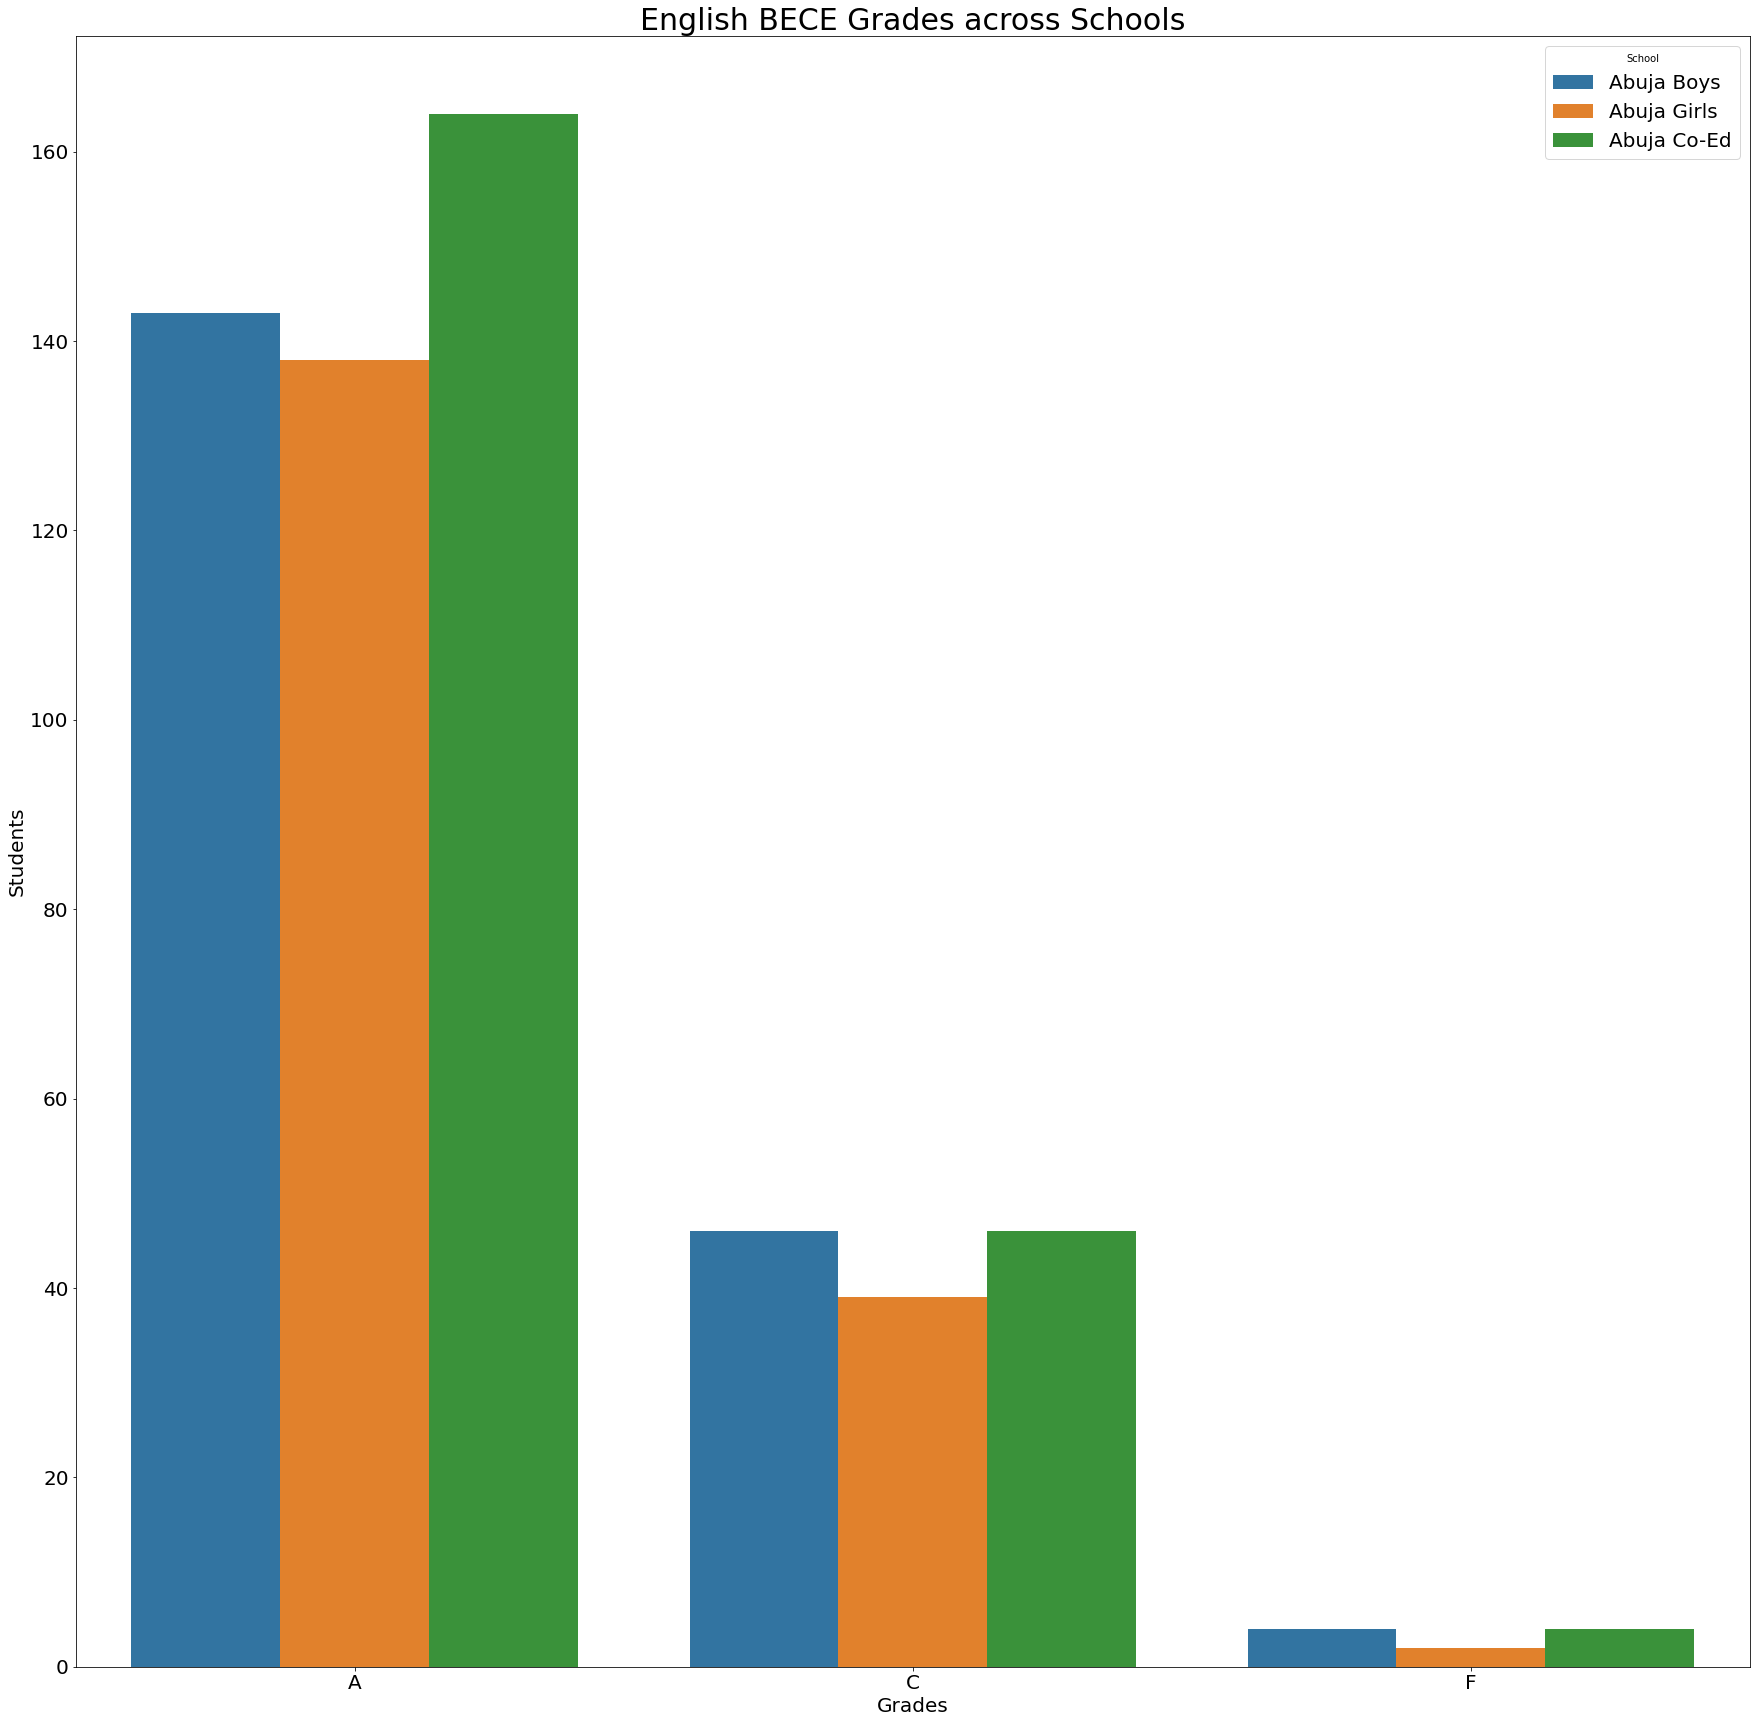

In [74]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['ENGLISH_BECE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("English BECE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

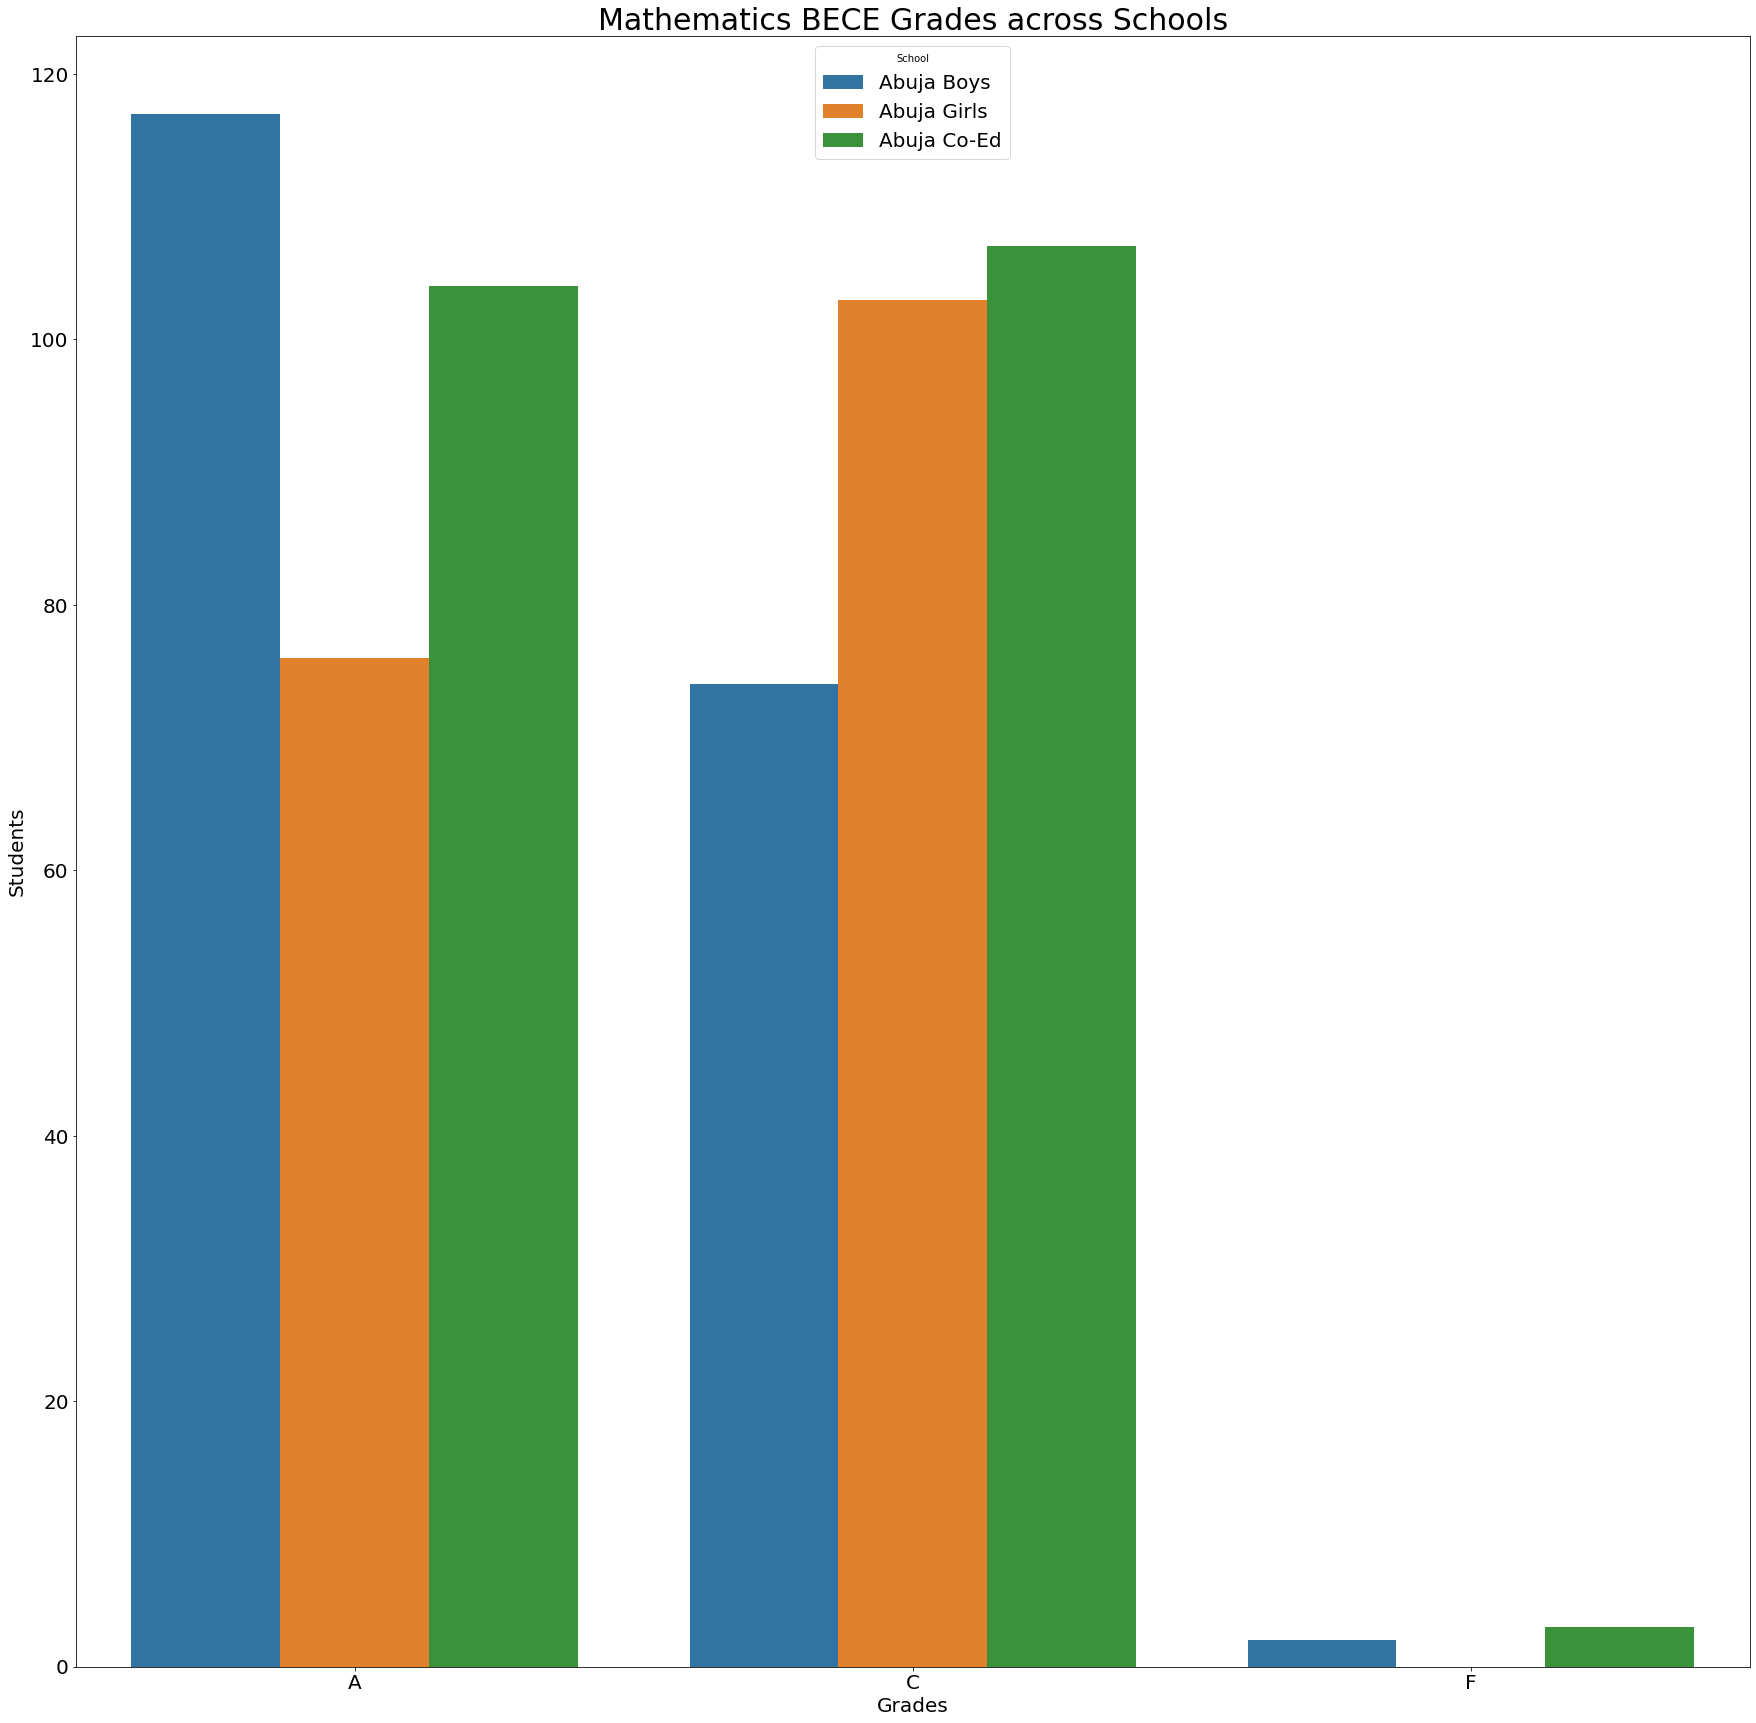

In [75]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['MATHEMATICS_BECE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Mathematics BECE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

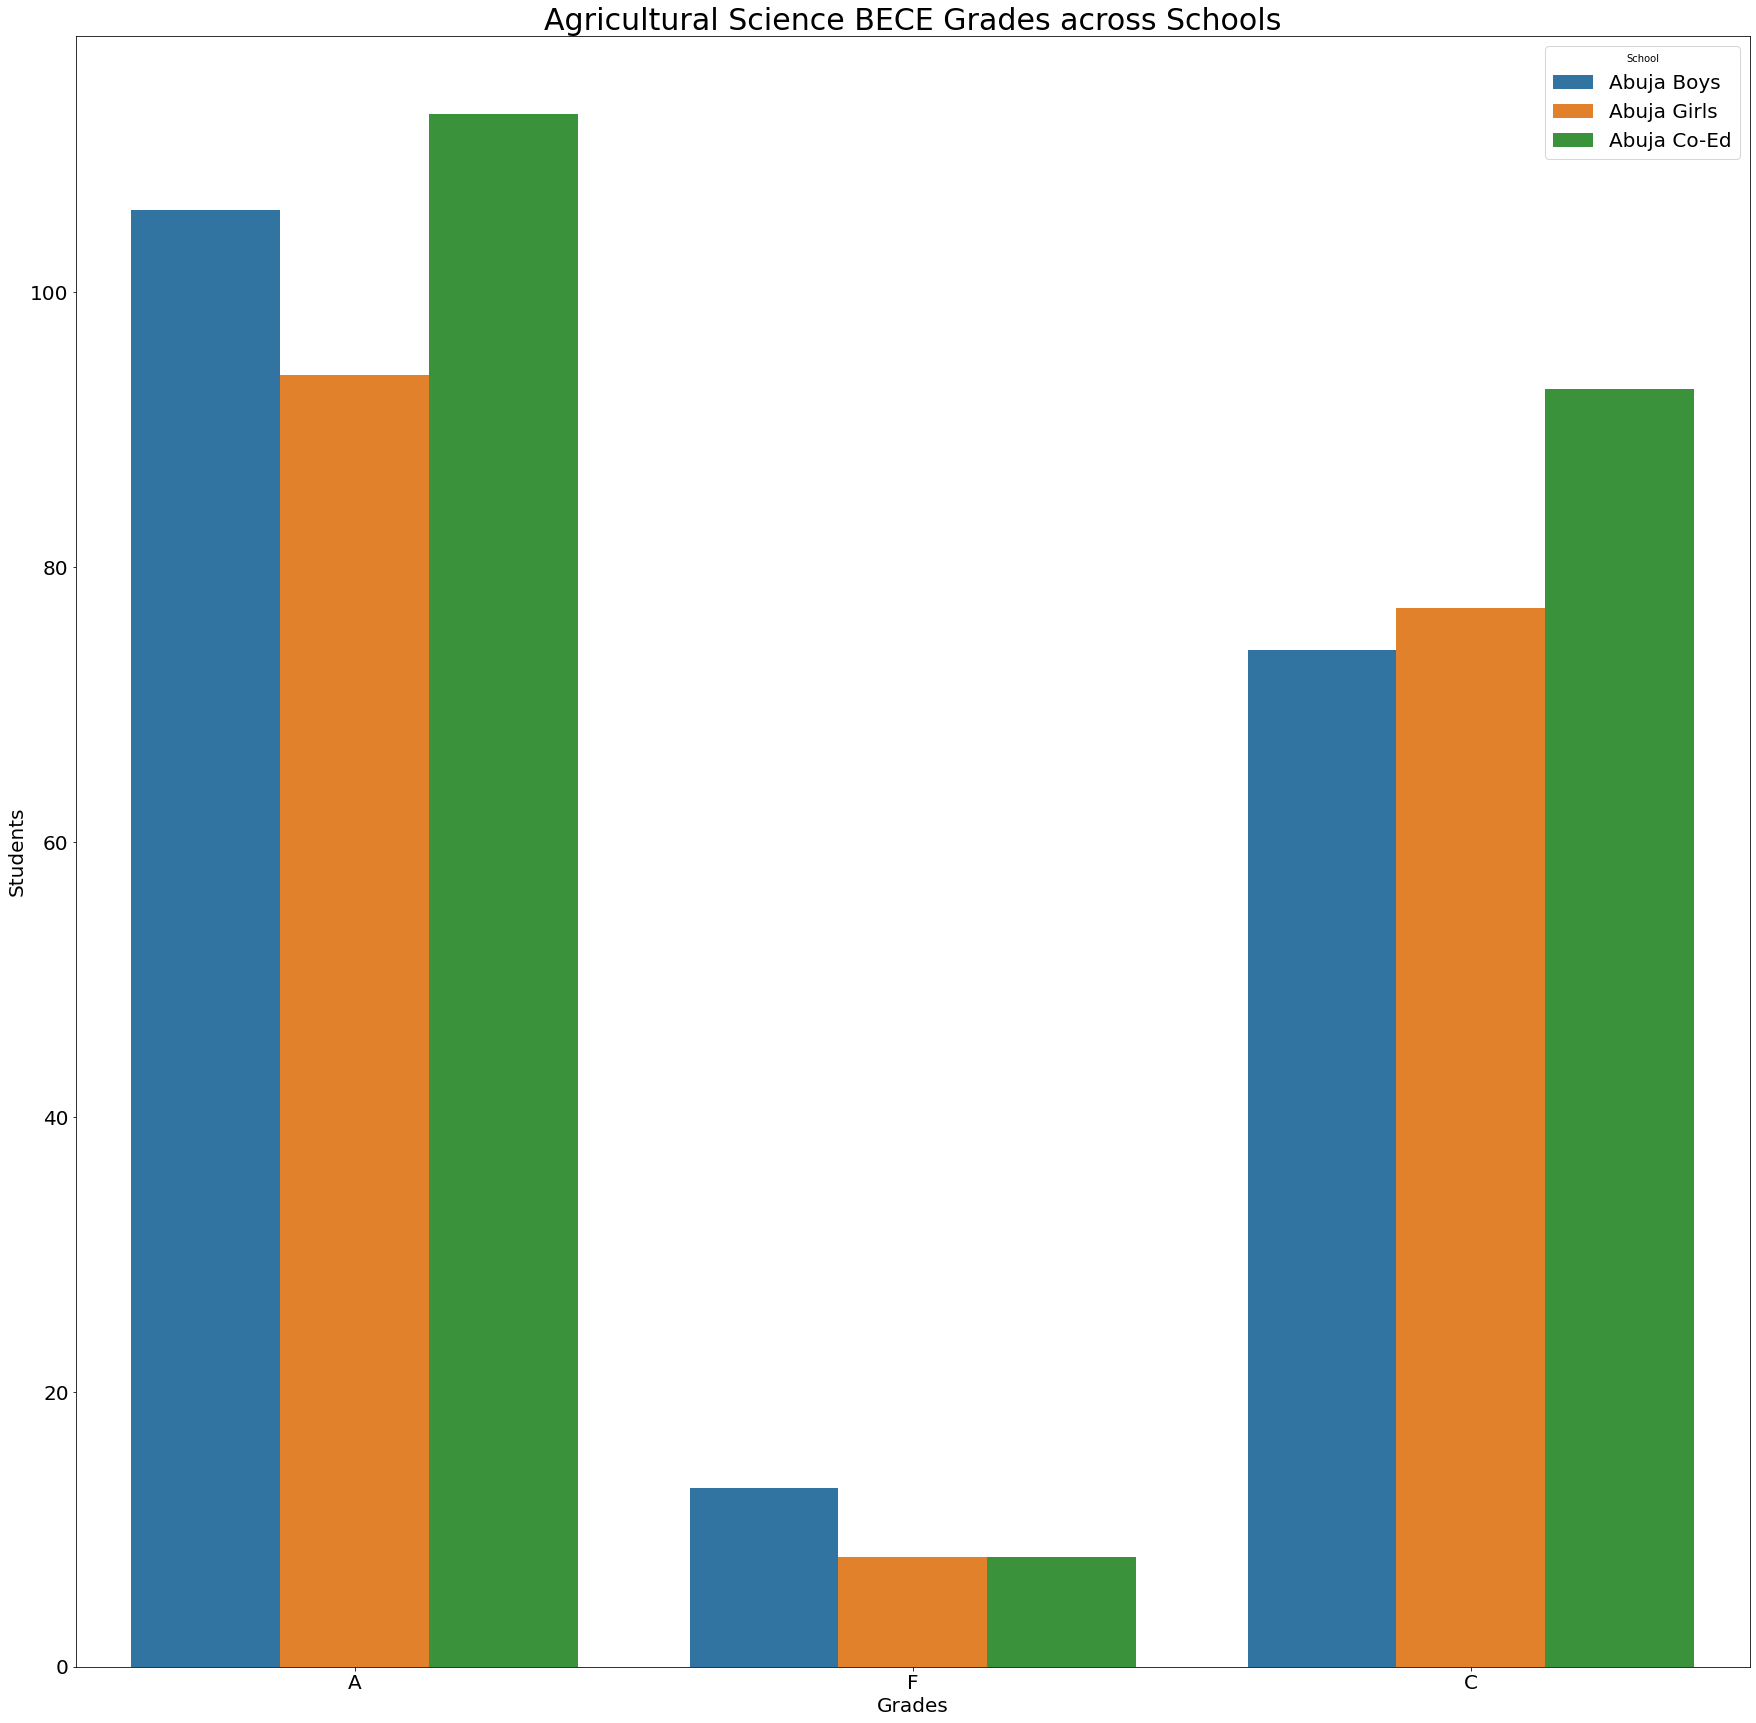

In [76]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['AGRIC_BECE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Agricultural Science BECE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

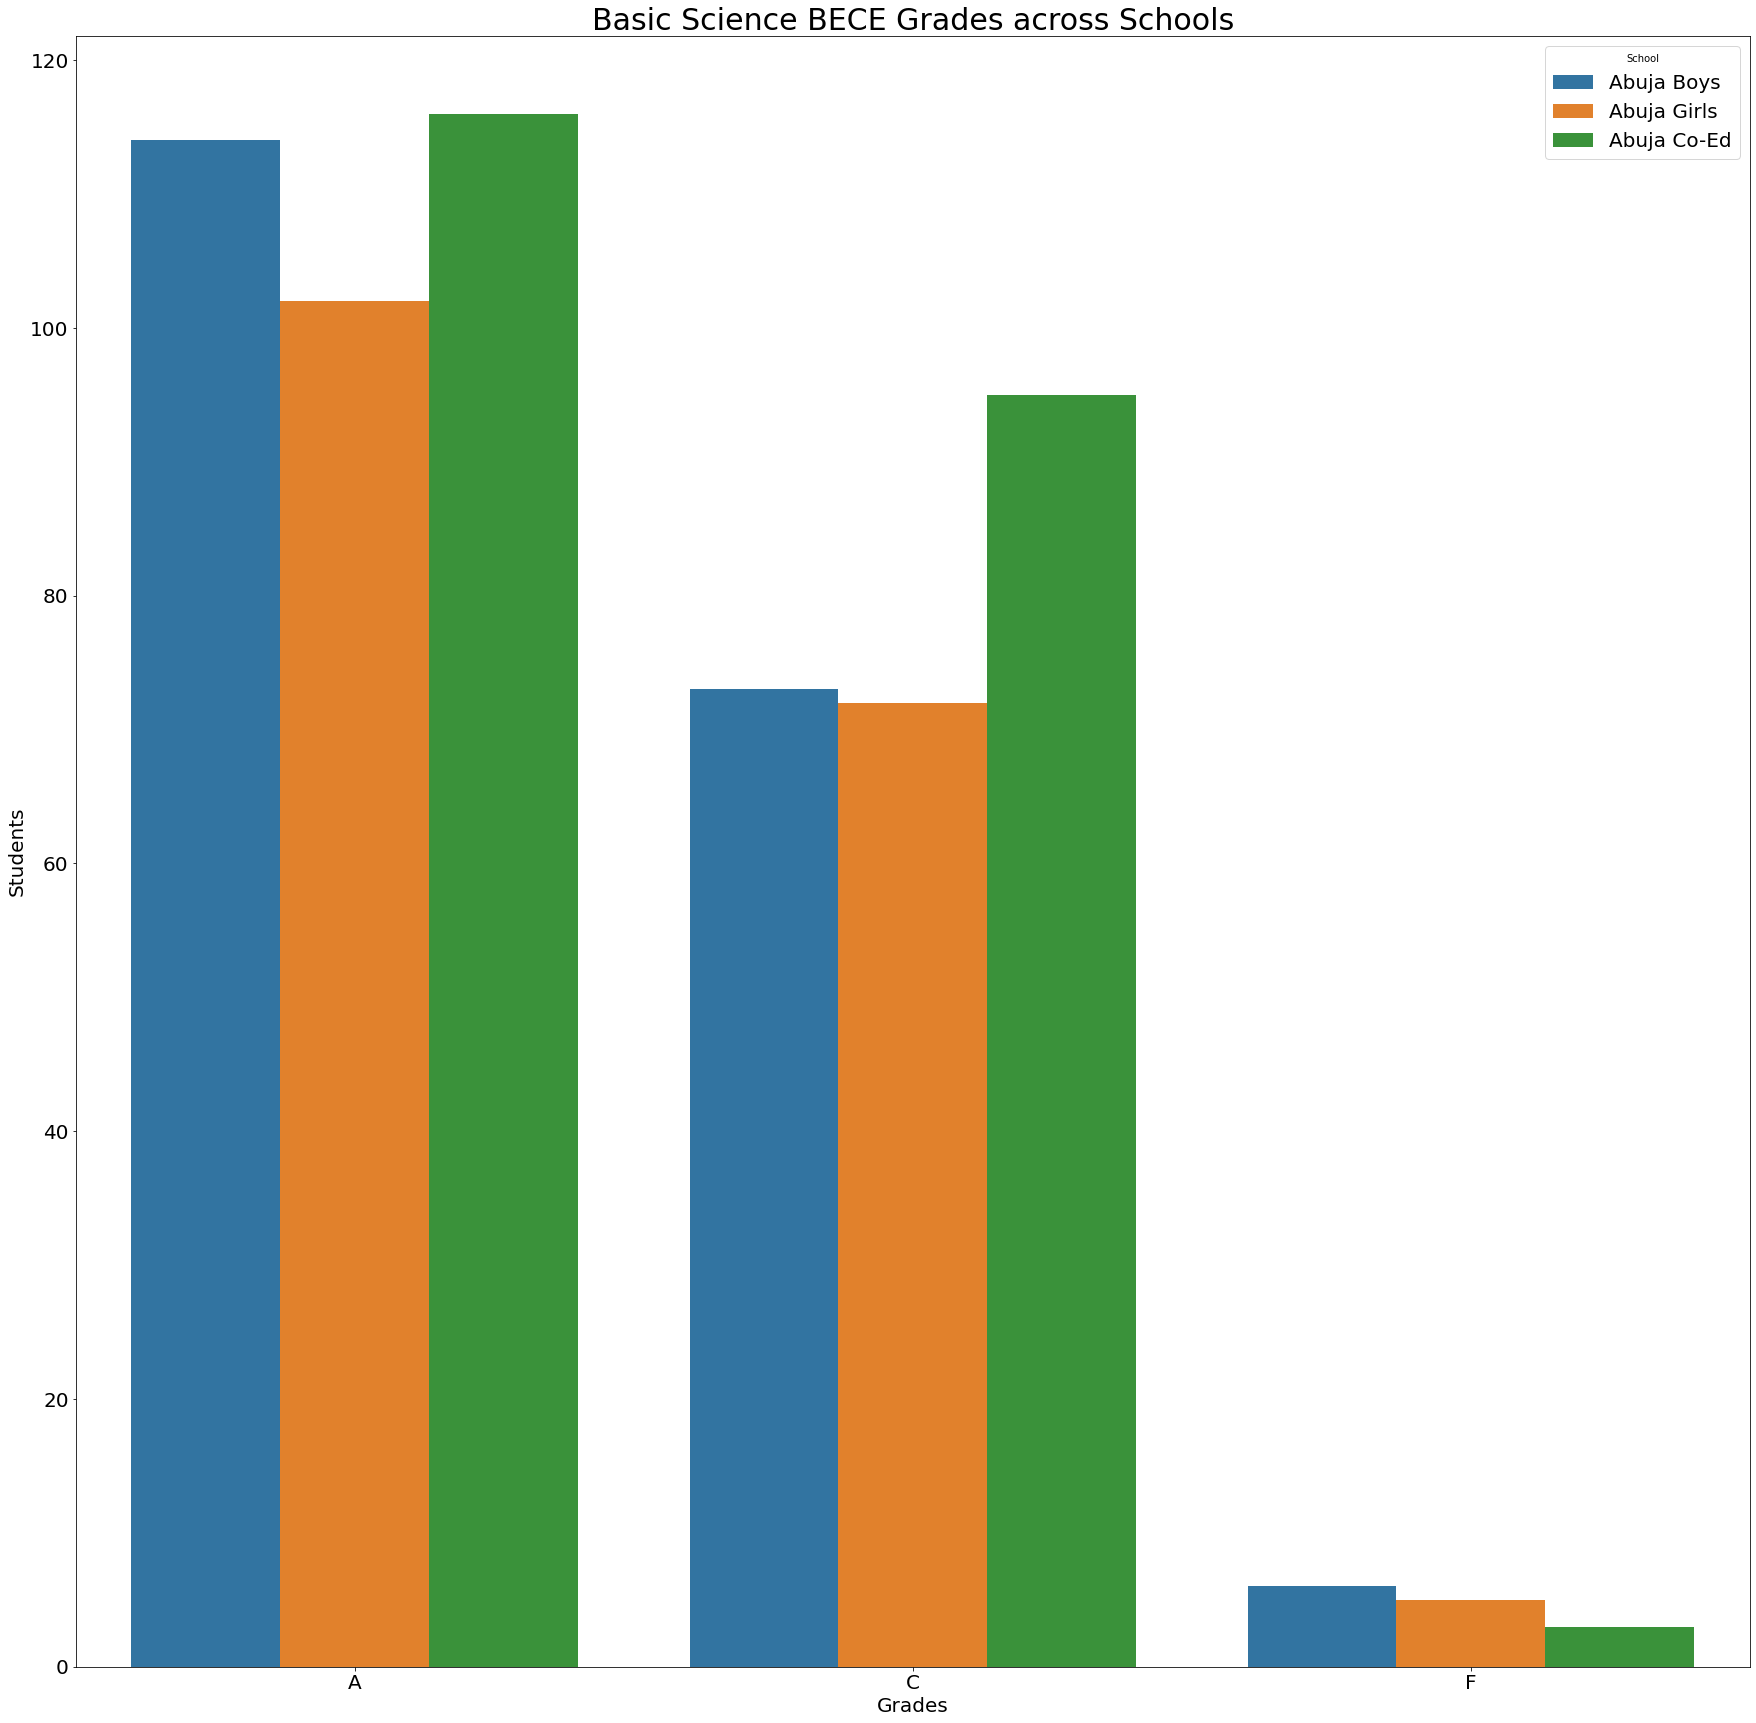

In [77]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['BASIC SCIENCE_BECE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Basic Science BECE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

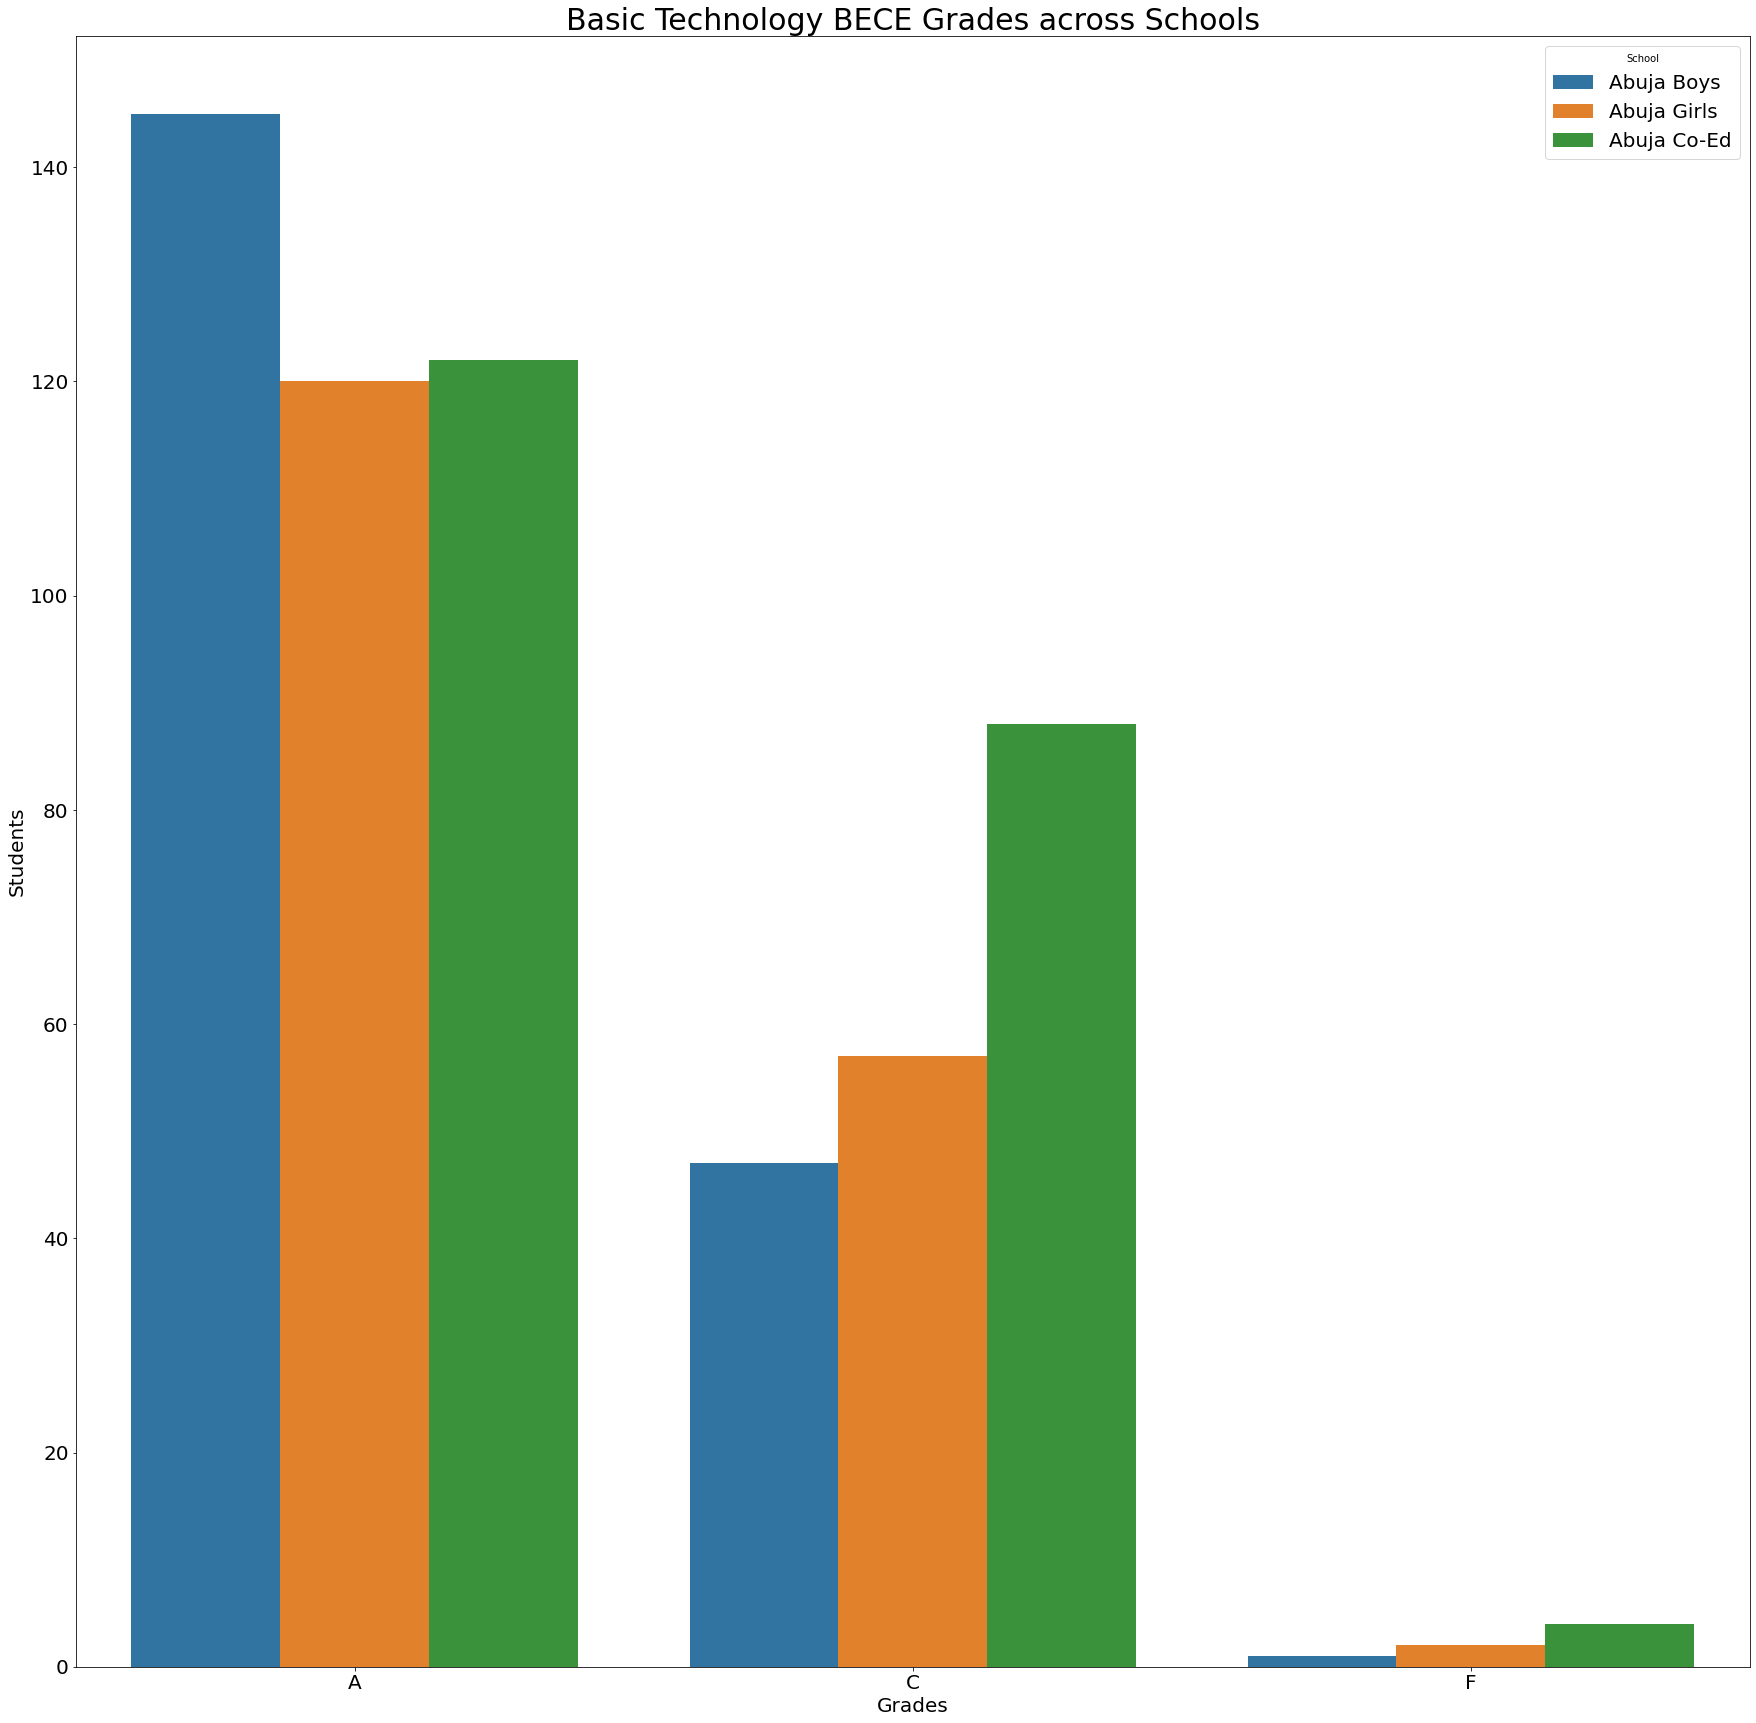

In [78]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['BASIC TECHNOLOGY_BECE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Basic Technology BECE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

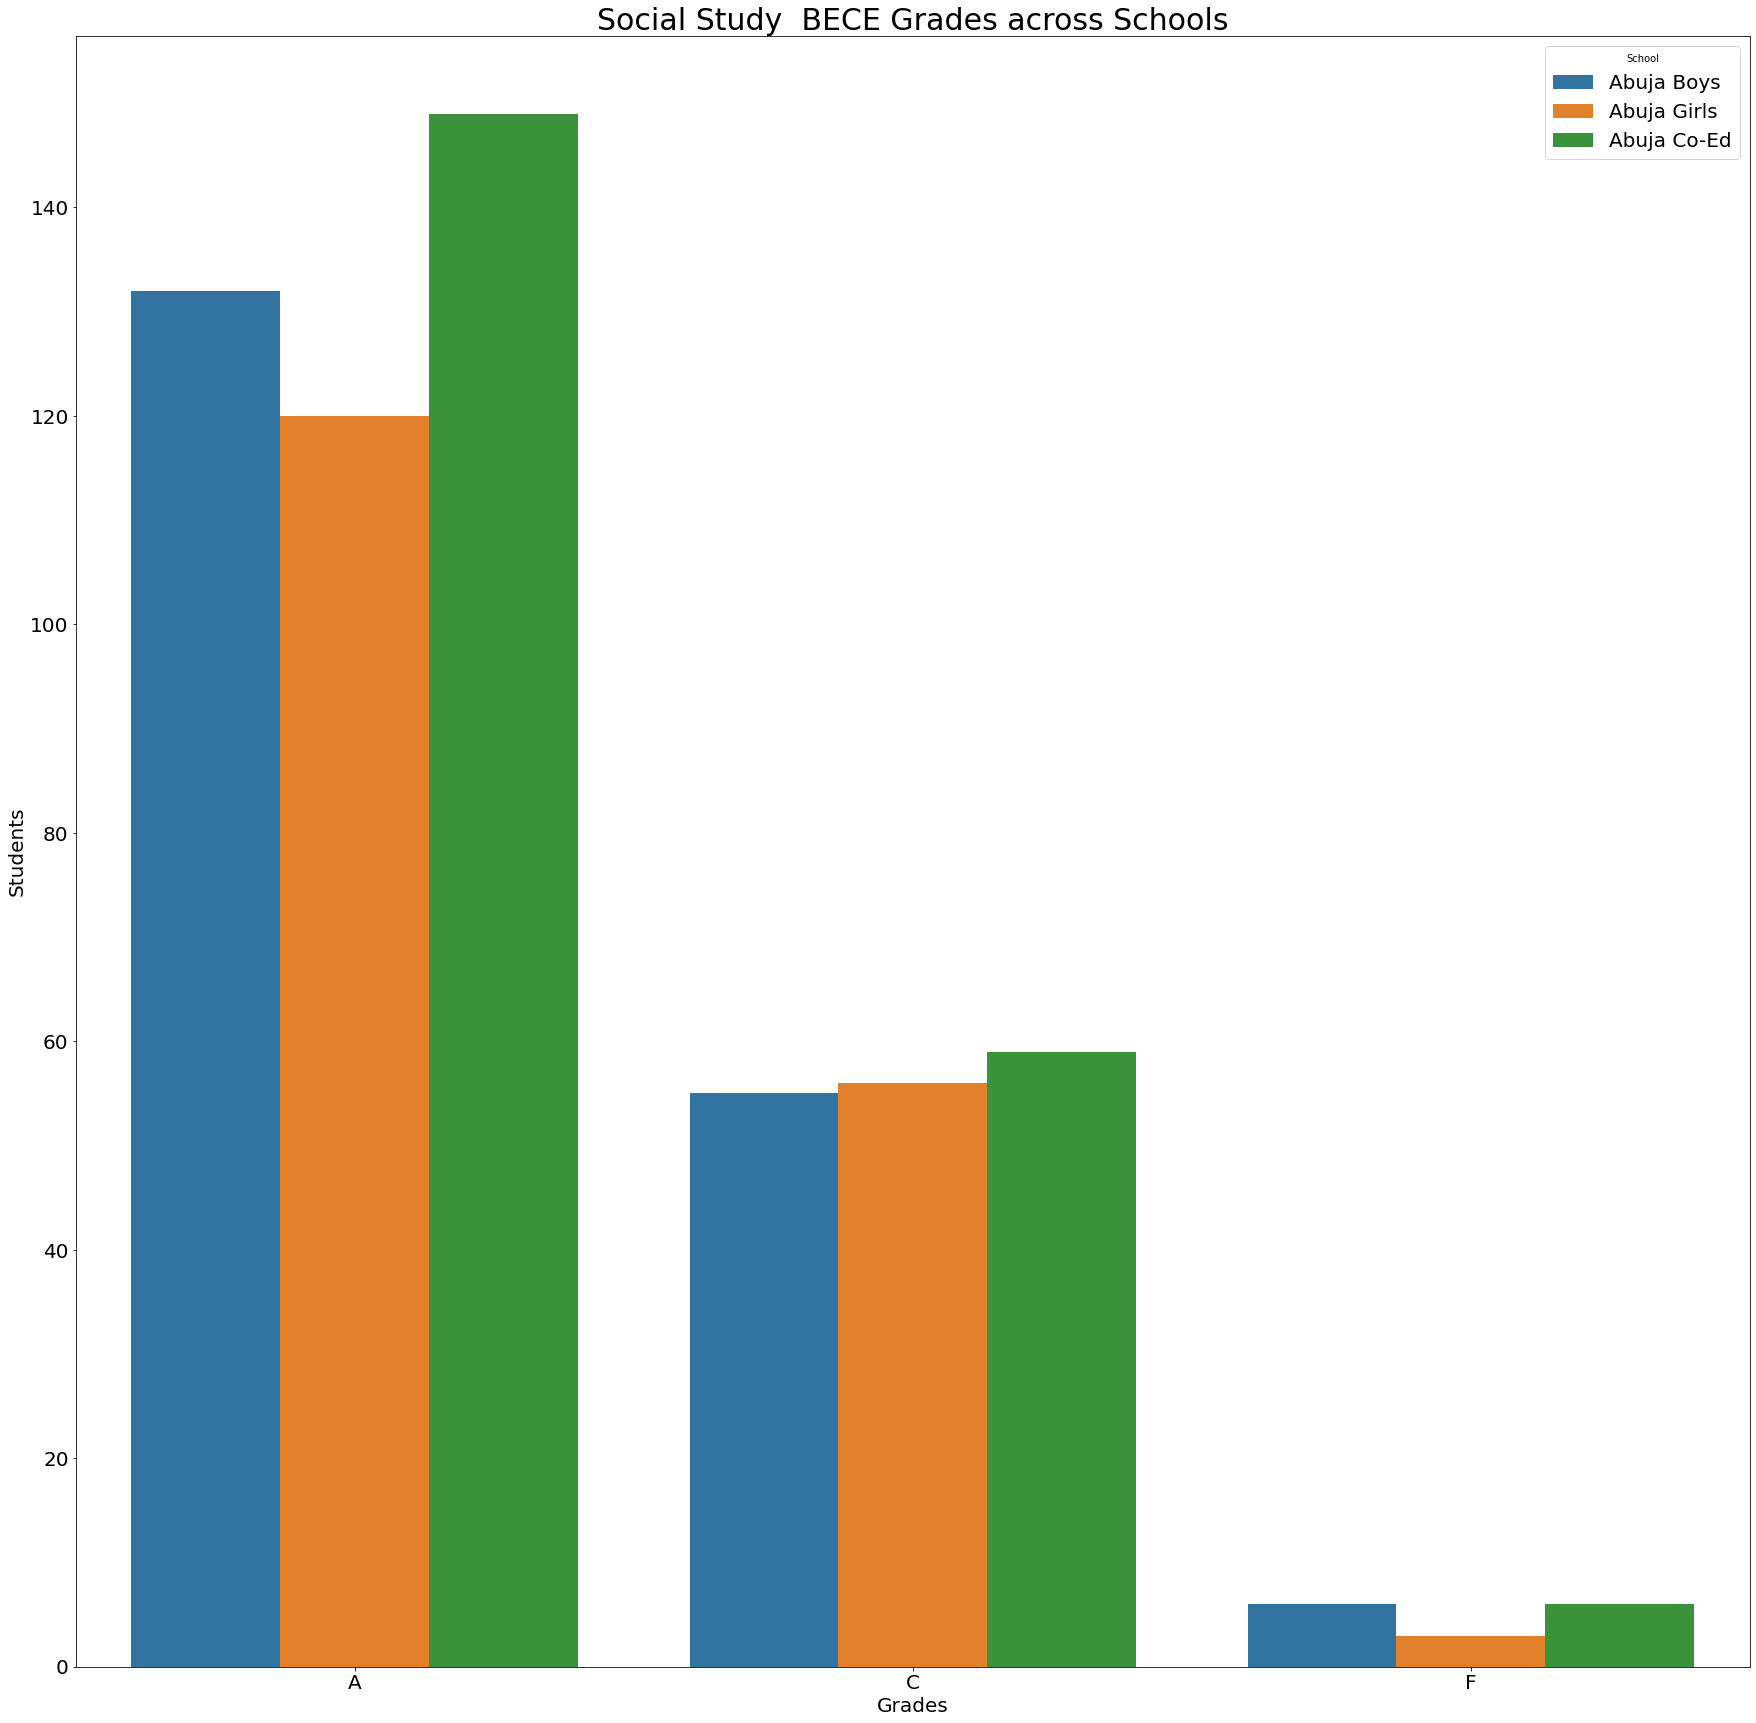

In [79]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['SOCIAL STUDY_BECE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Social Study  BECE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

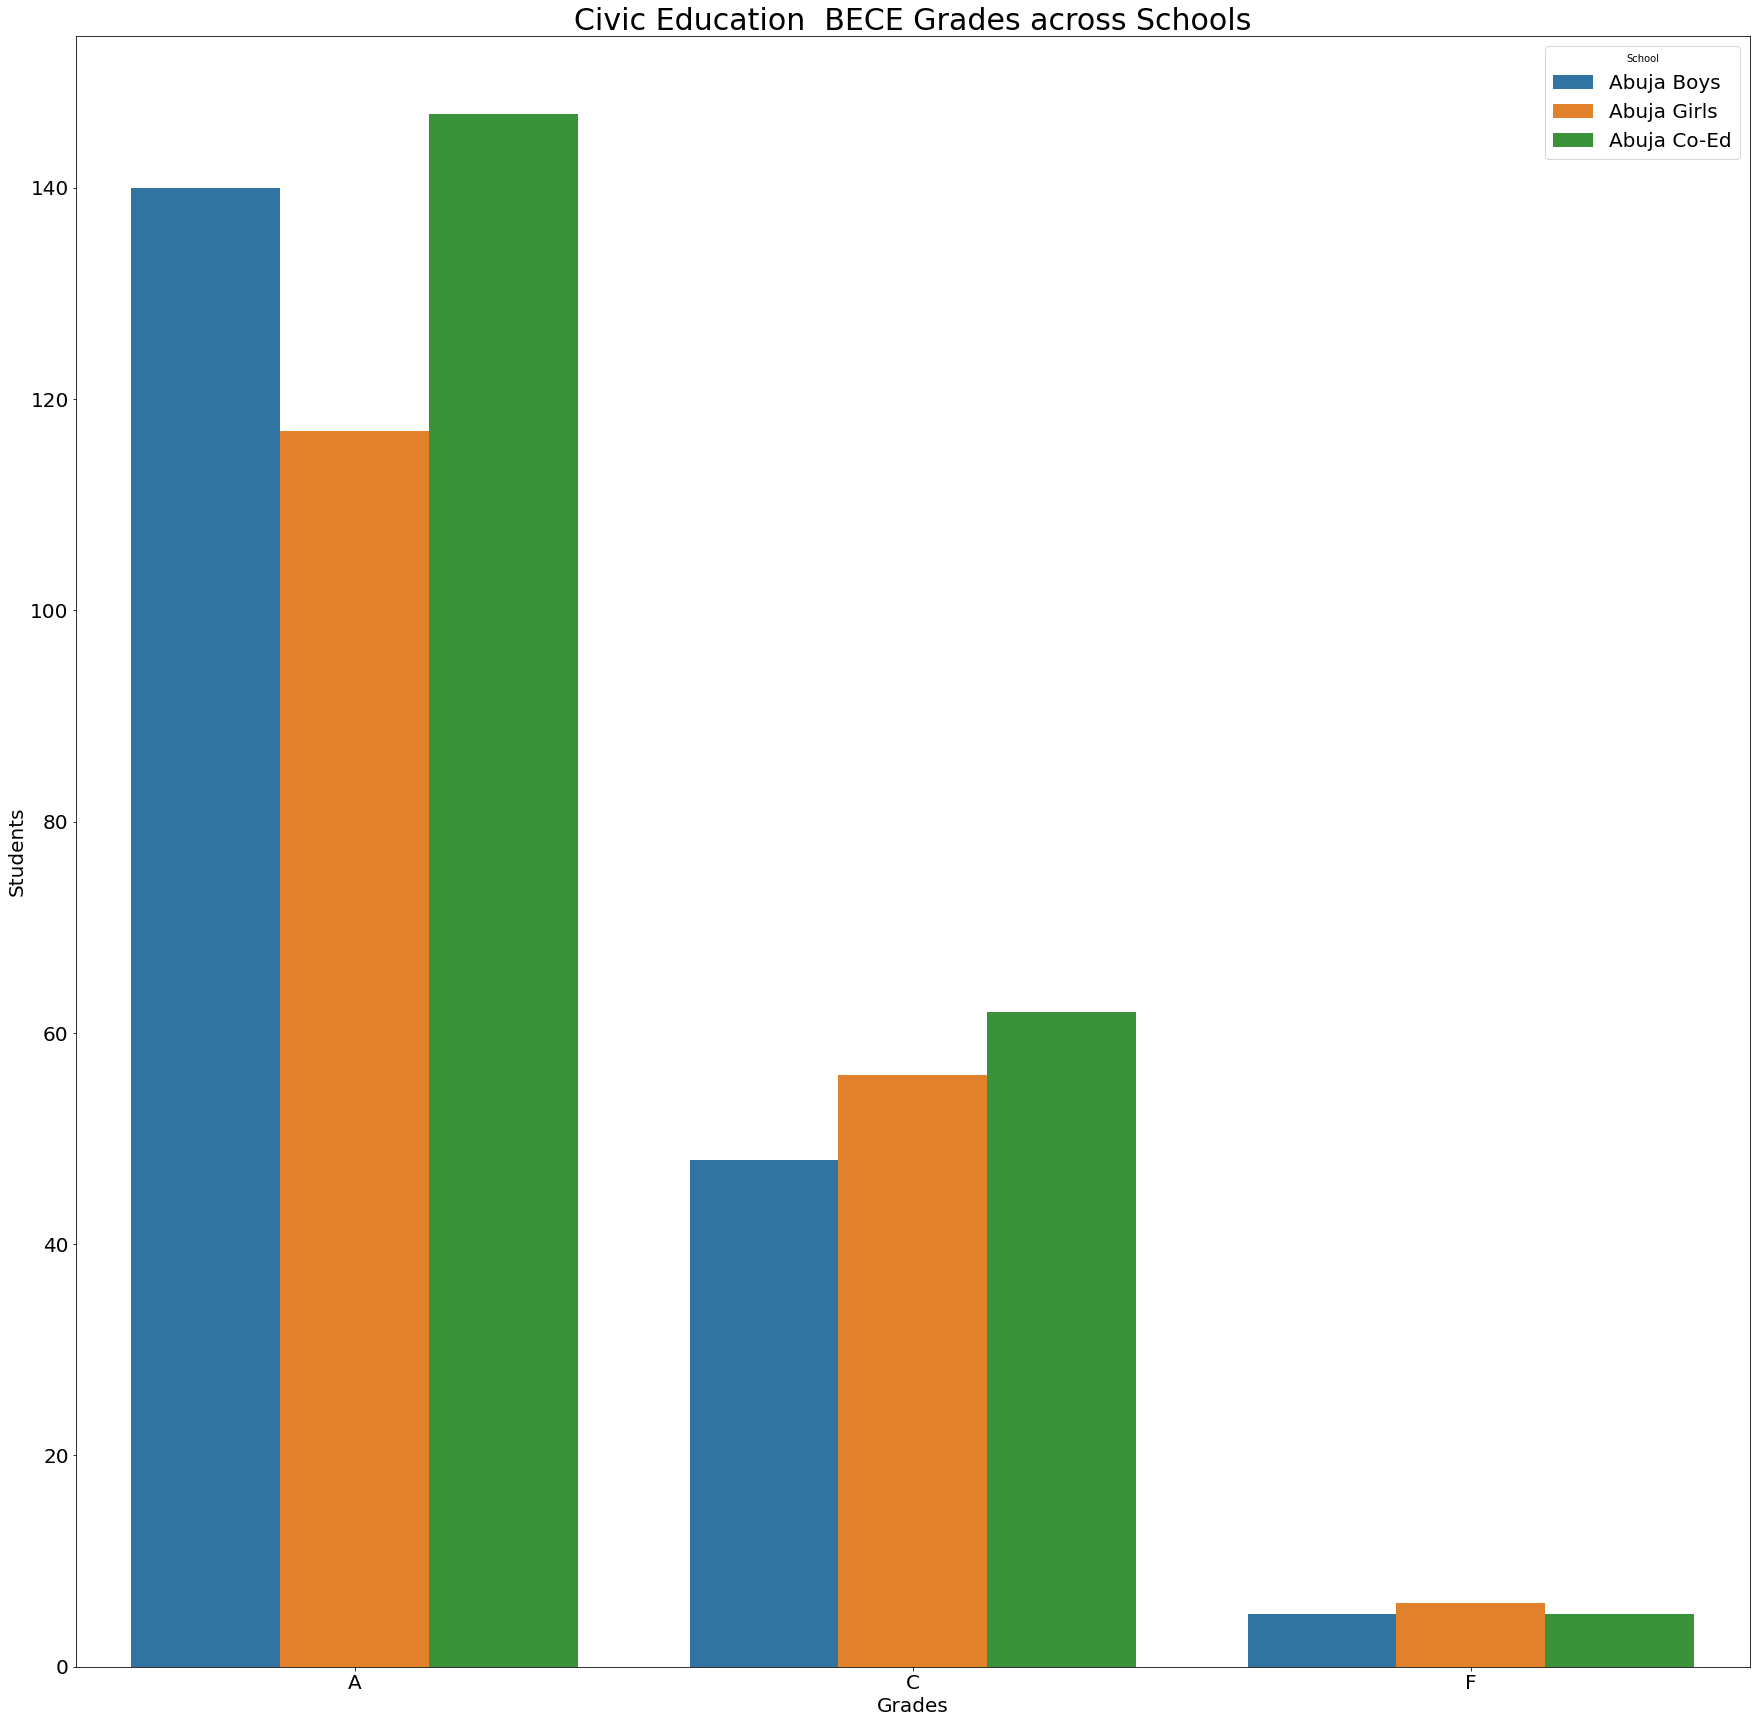

In [80]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['CIVIC EDUCATION_BECE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Civic Education  BECE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

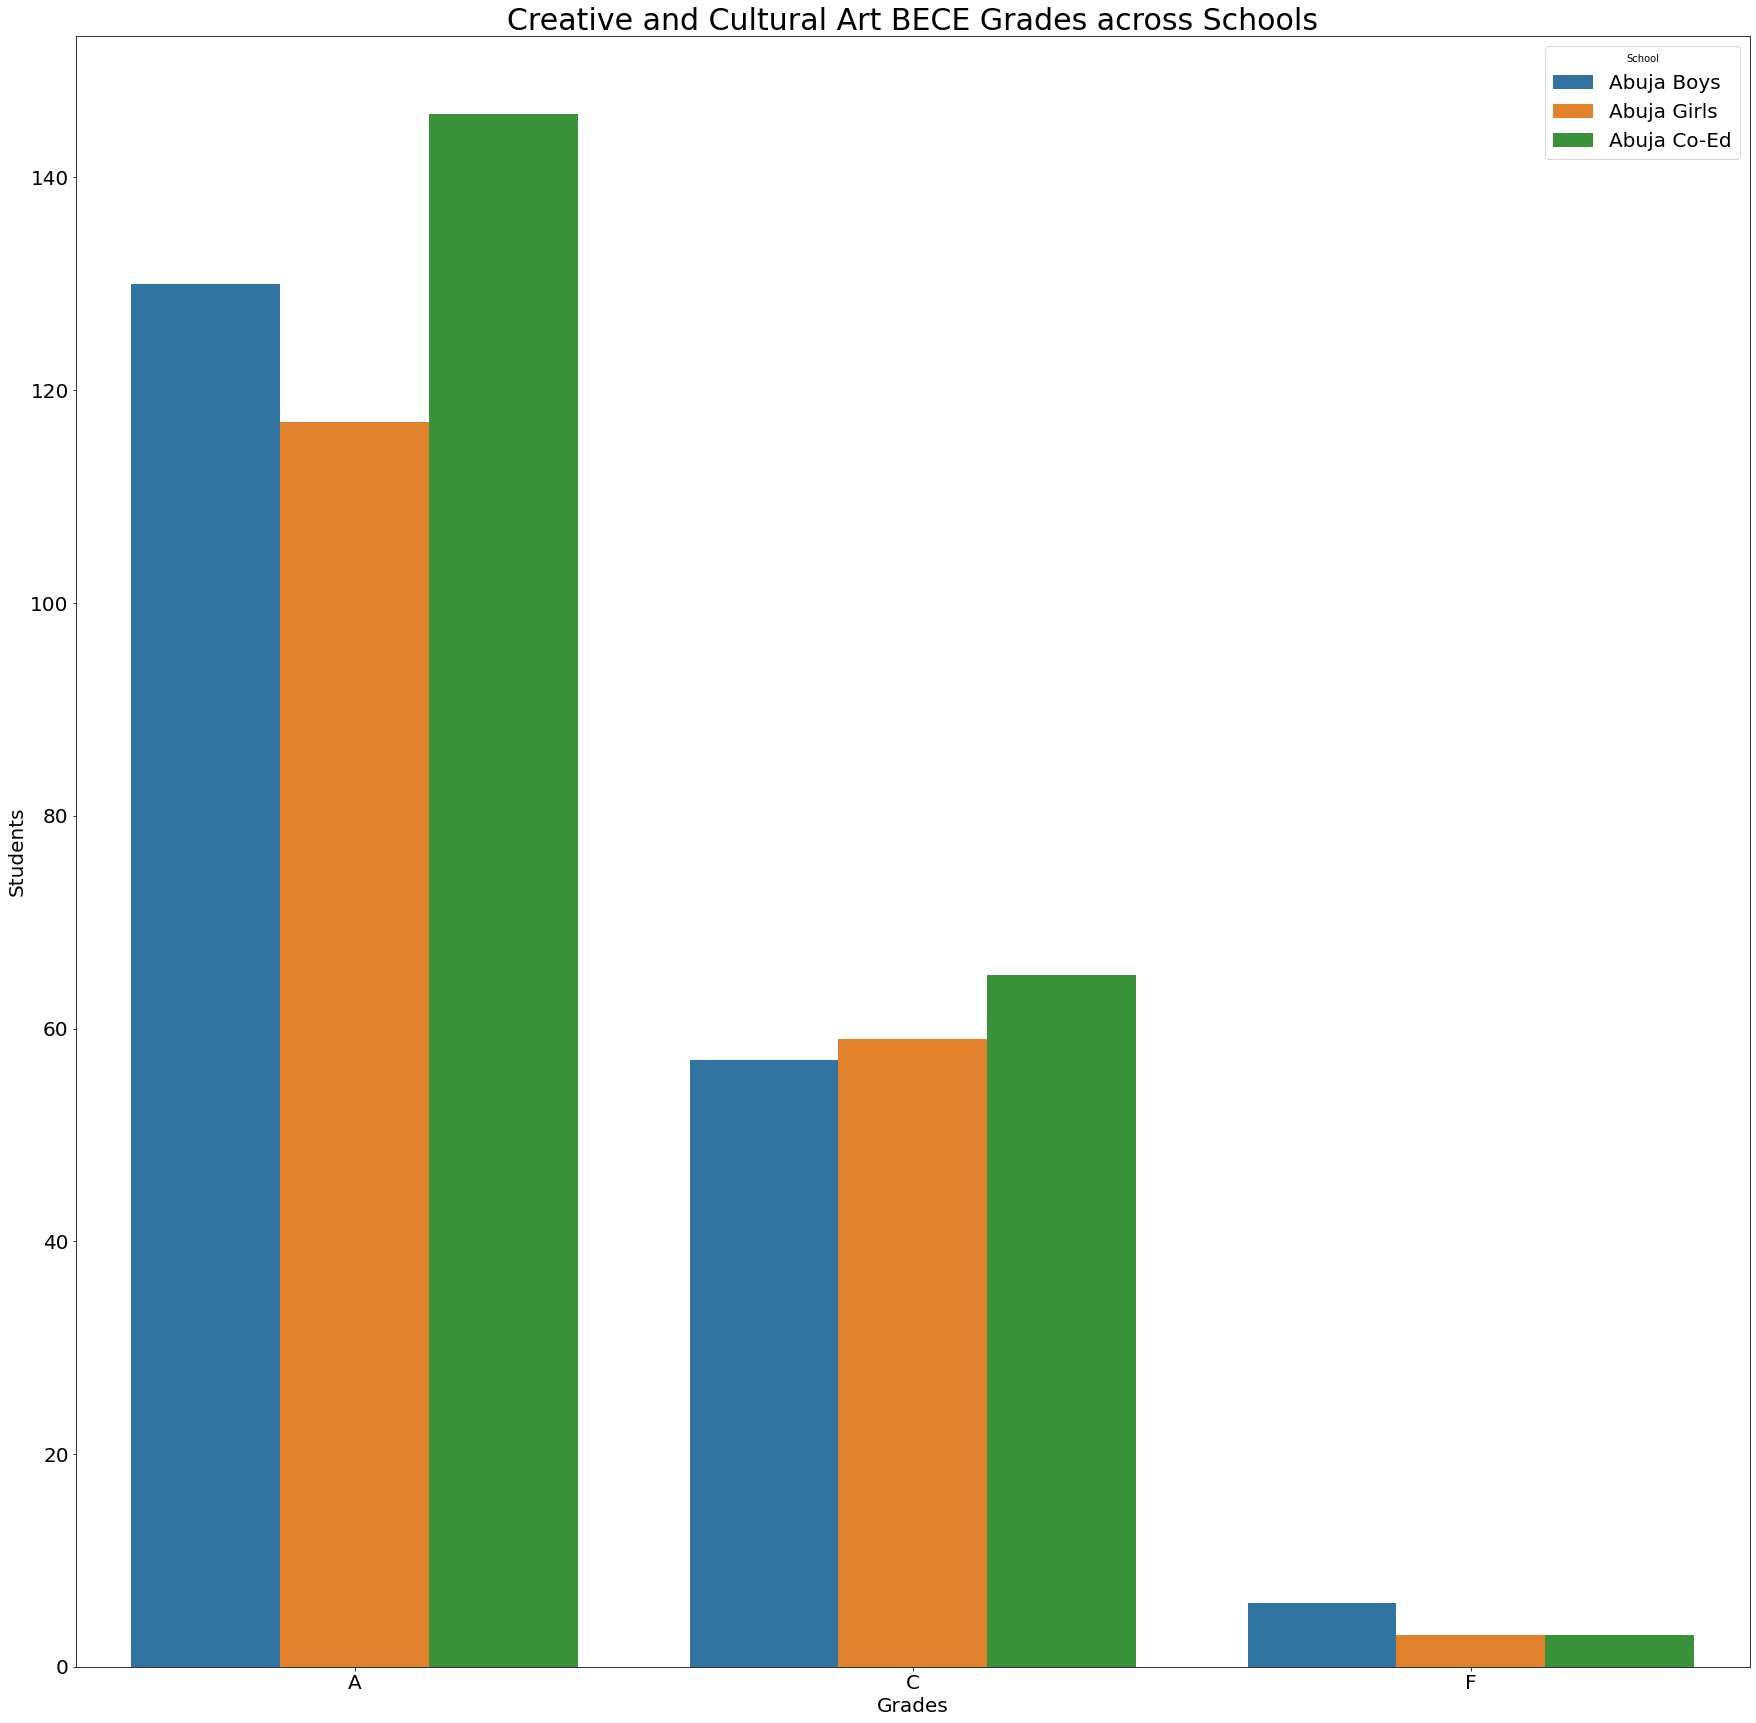

In [81]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['CREATIVE AND CULTURAL ART_BECE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Creative and Cultural Art BECE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

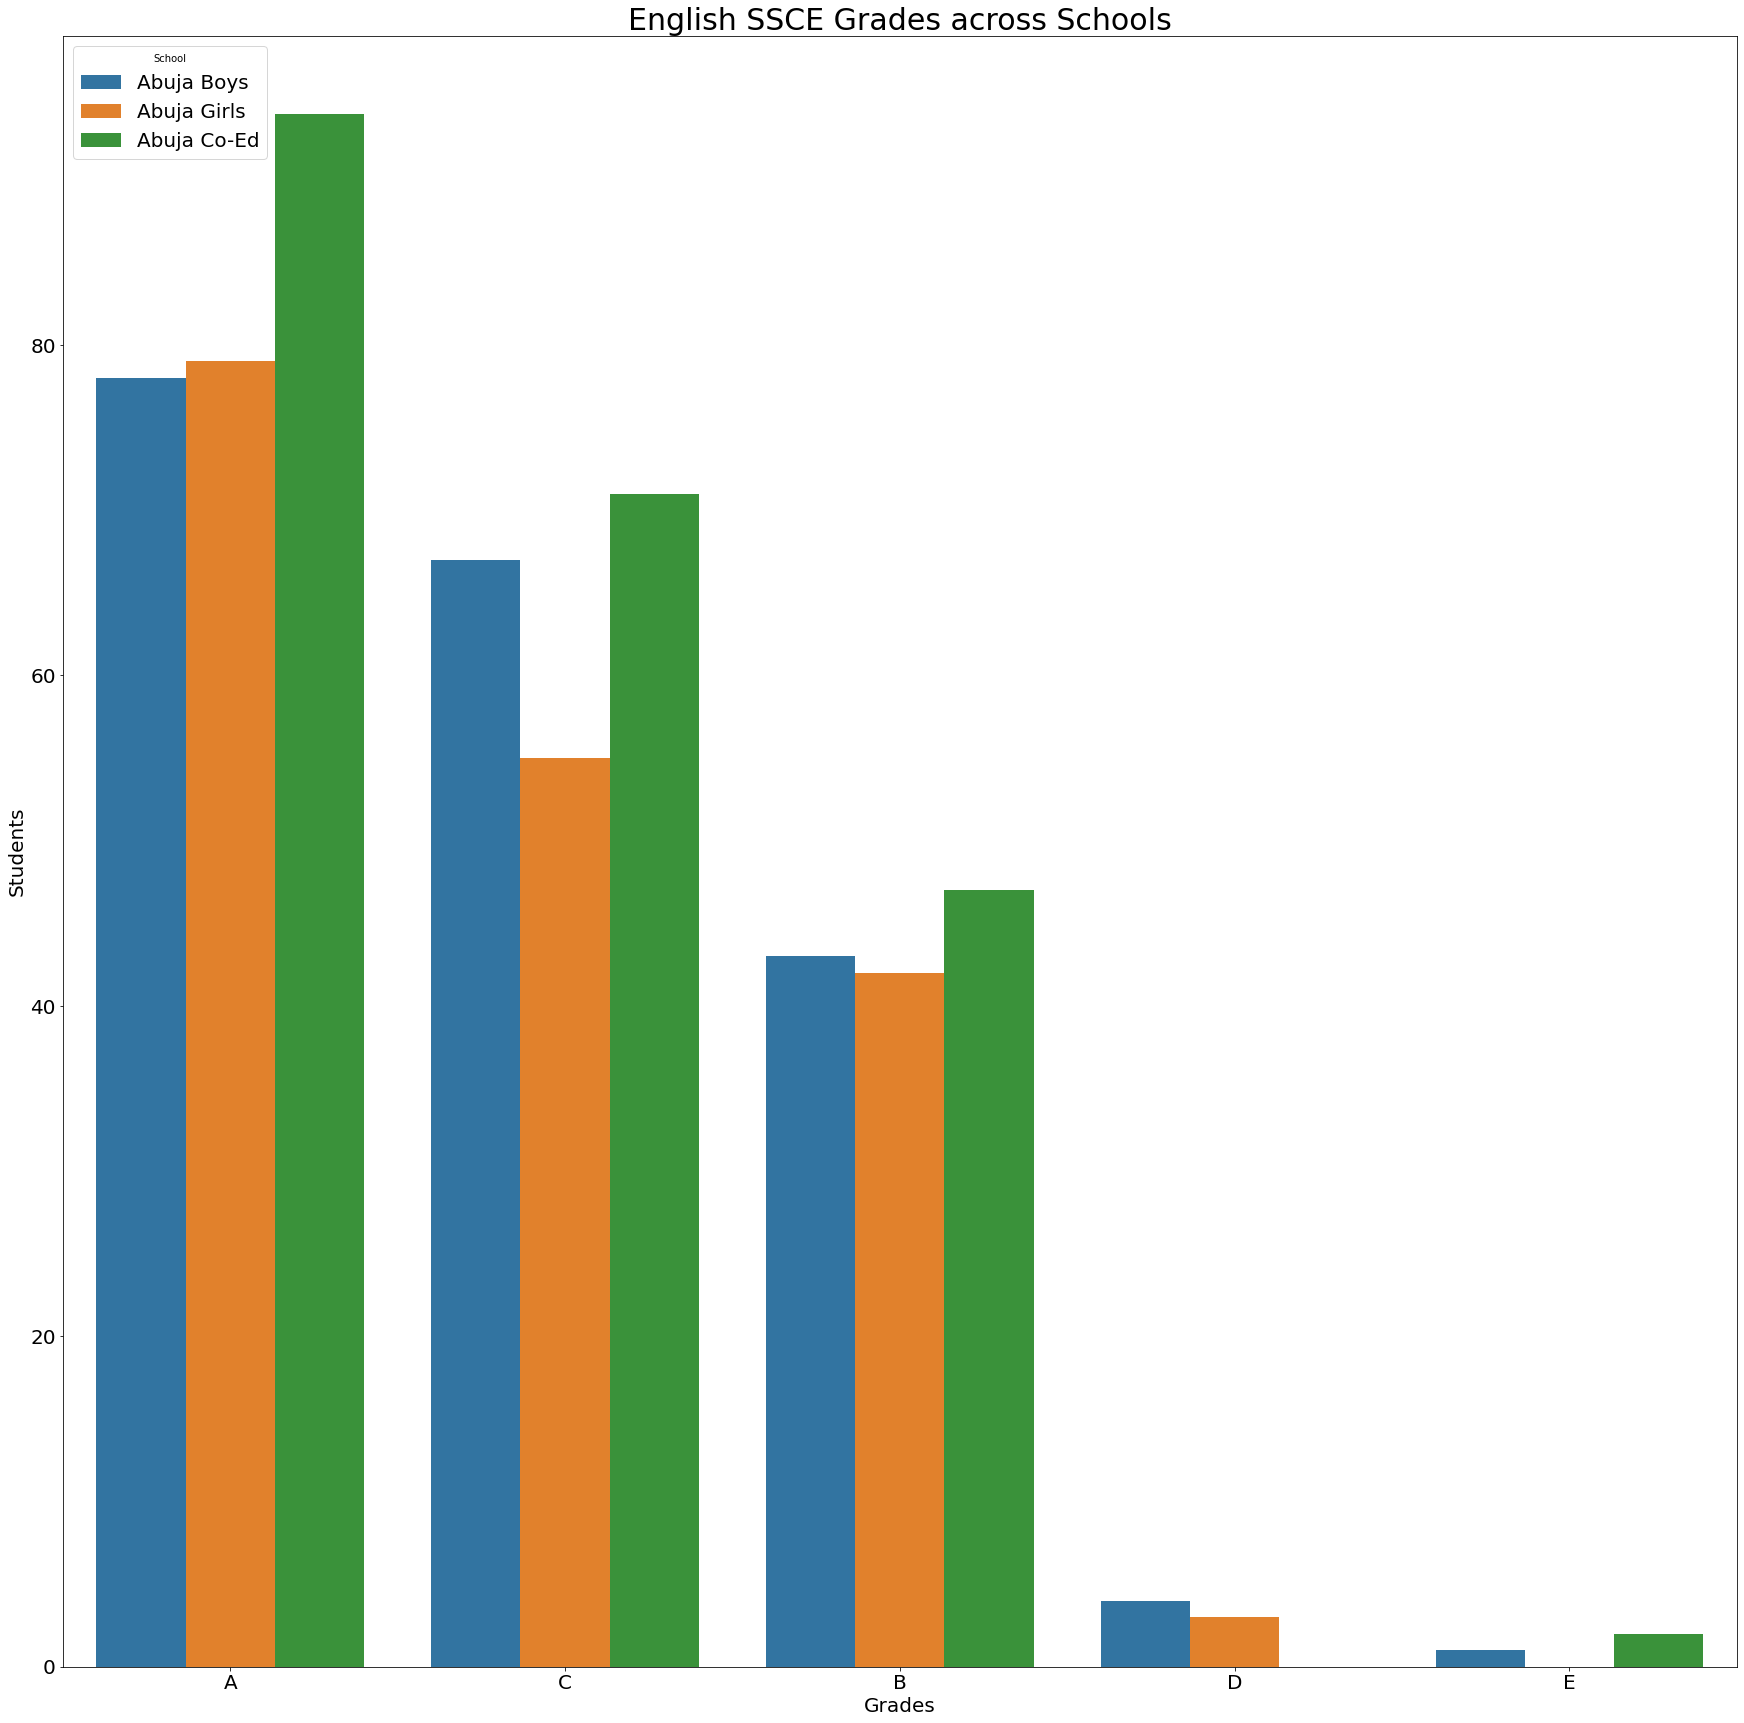

In [82]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['ENGLISH_SSCE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("English SSCE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

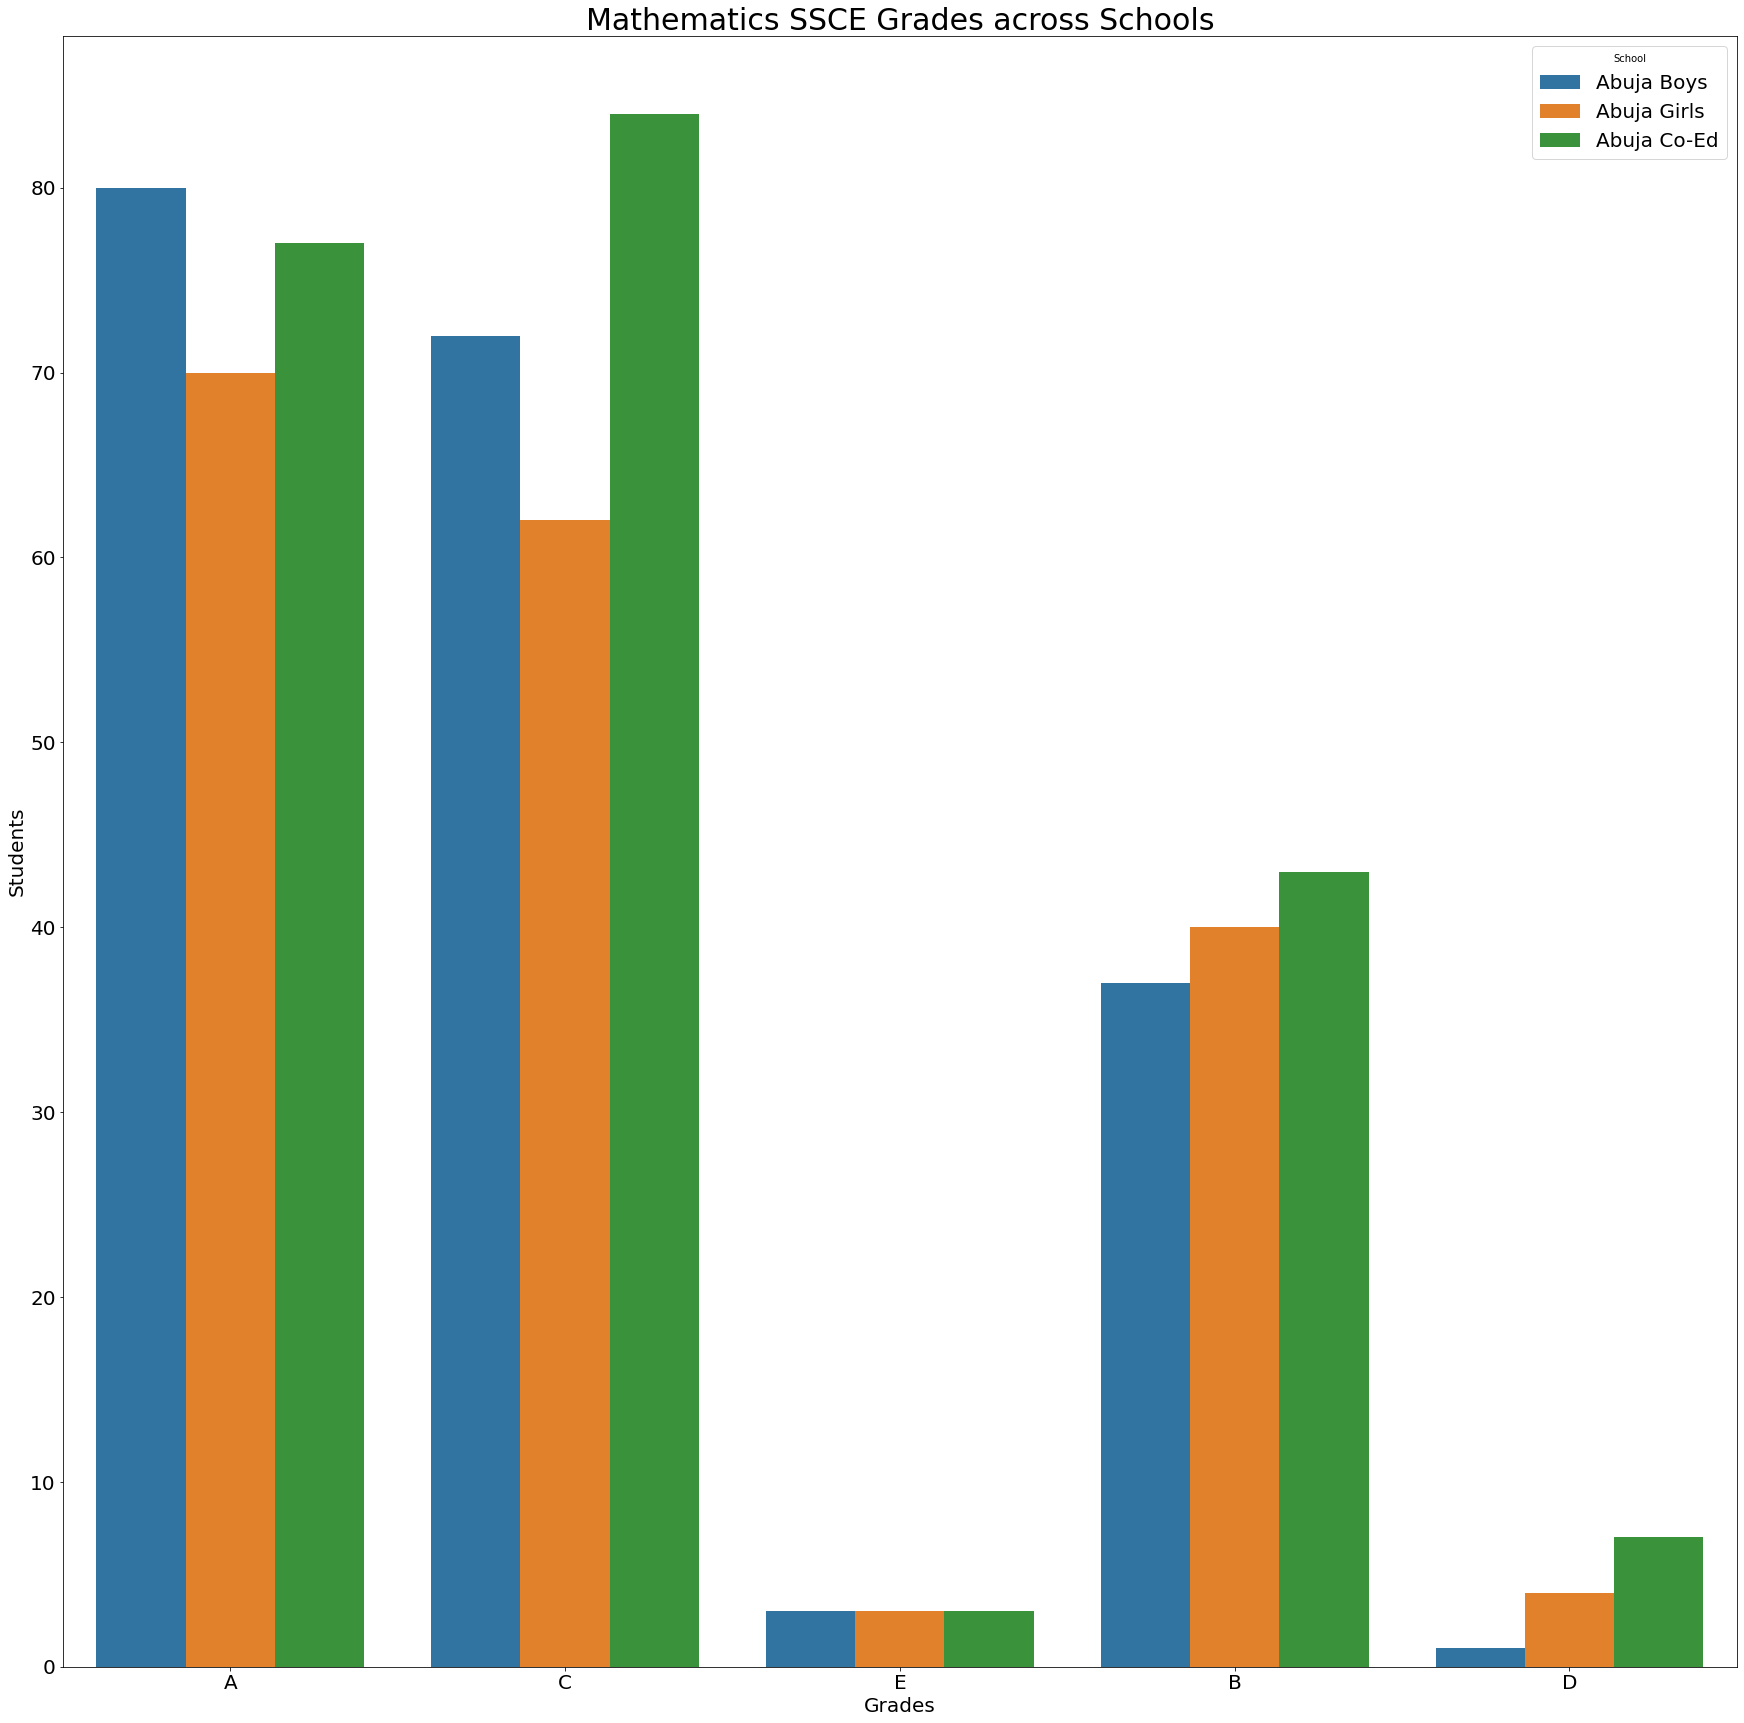

In [83]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['MATHEMATICS_SSCE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Mathematics SSCE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

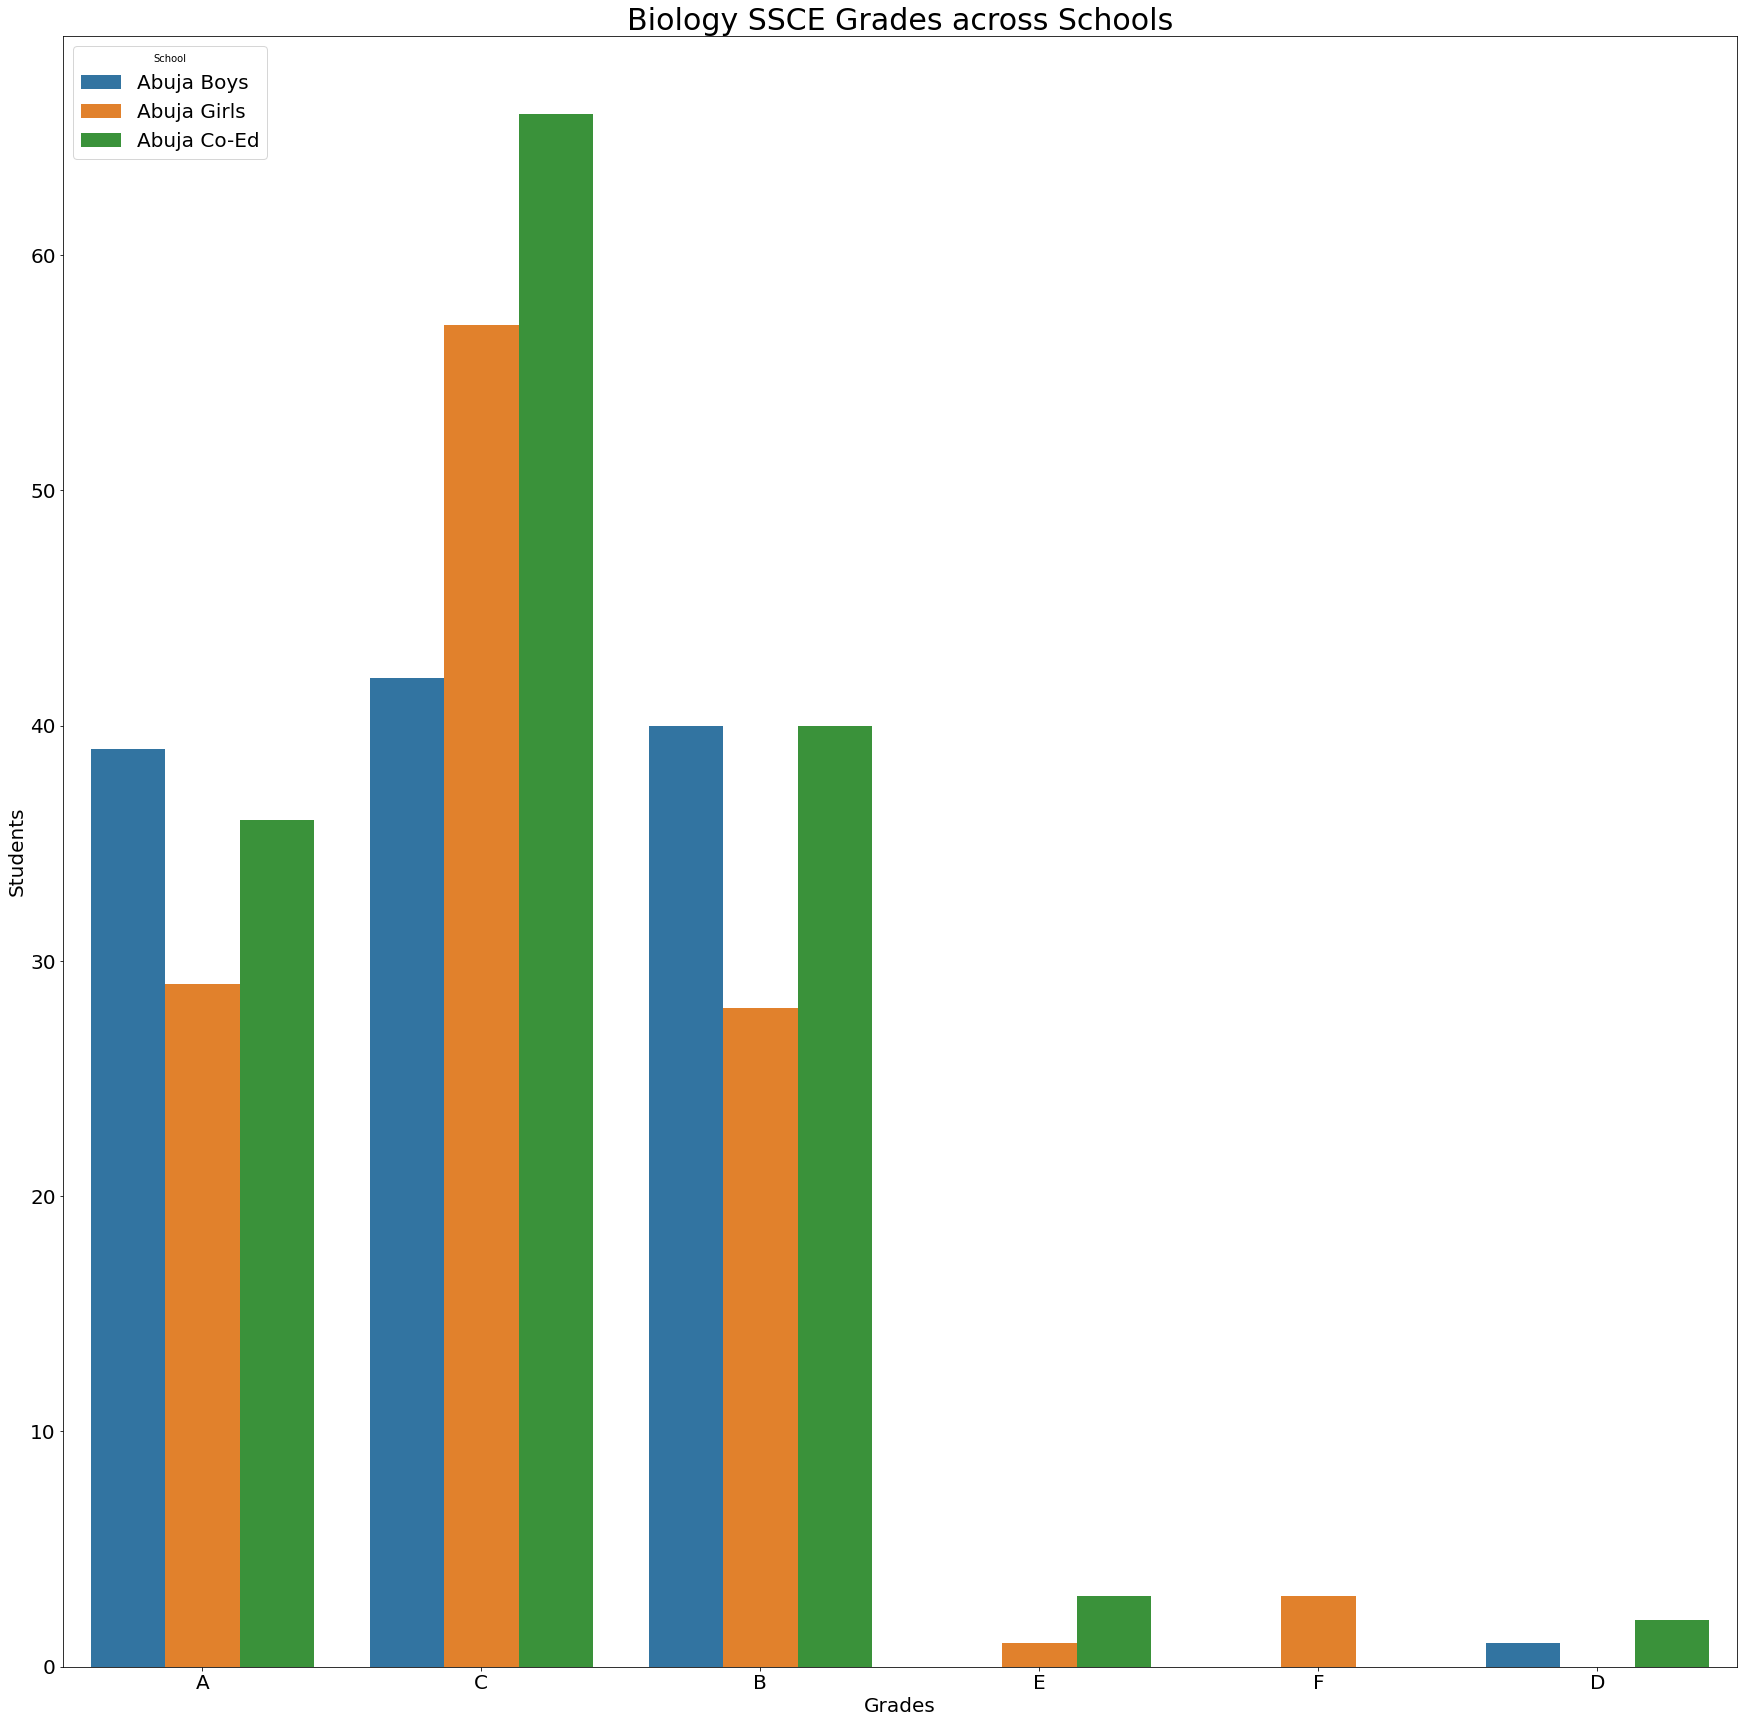

In [84]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['BIOLOGY_SSCE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Biology SSCE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

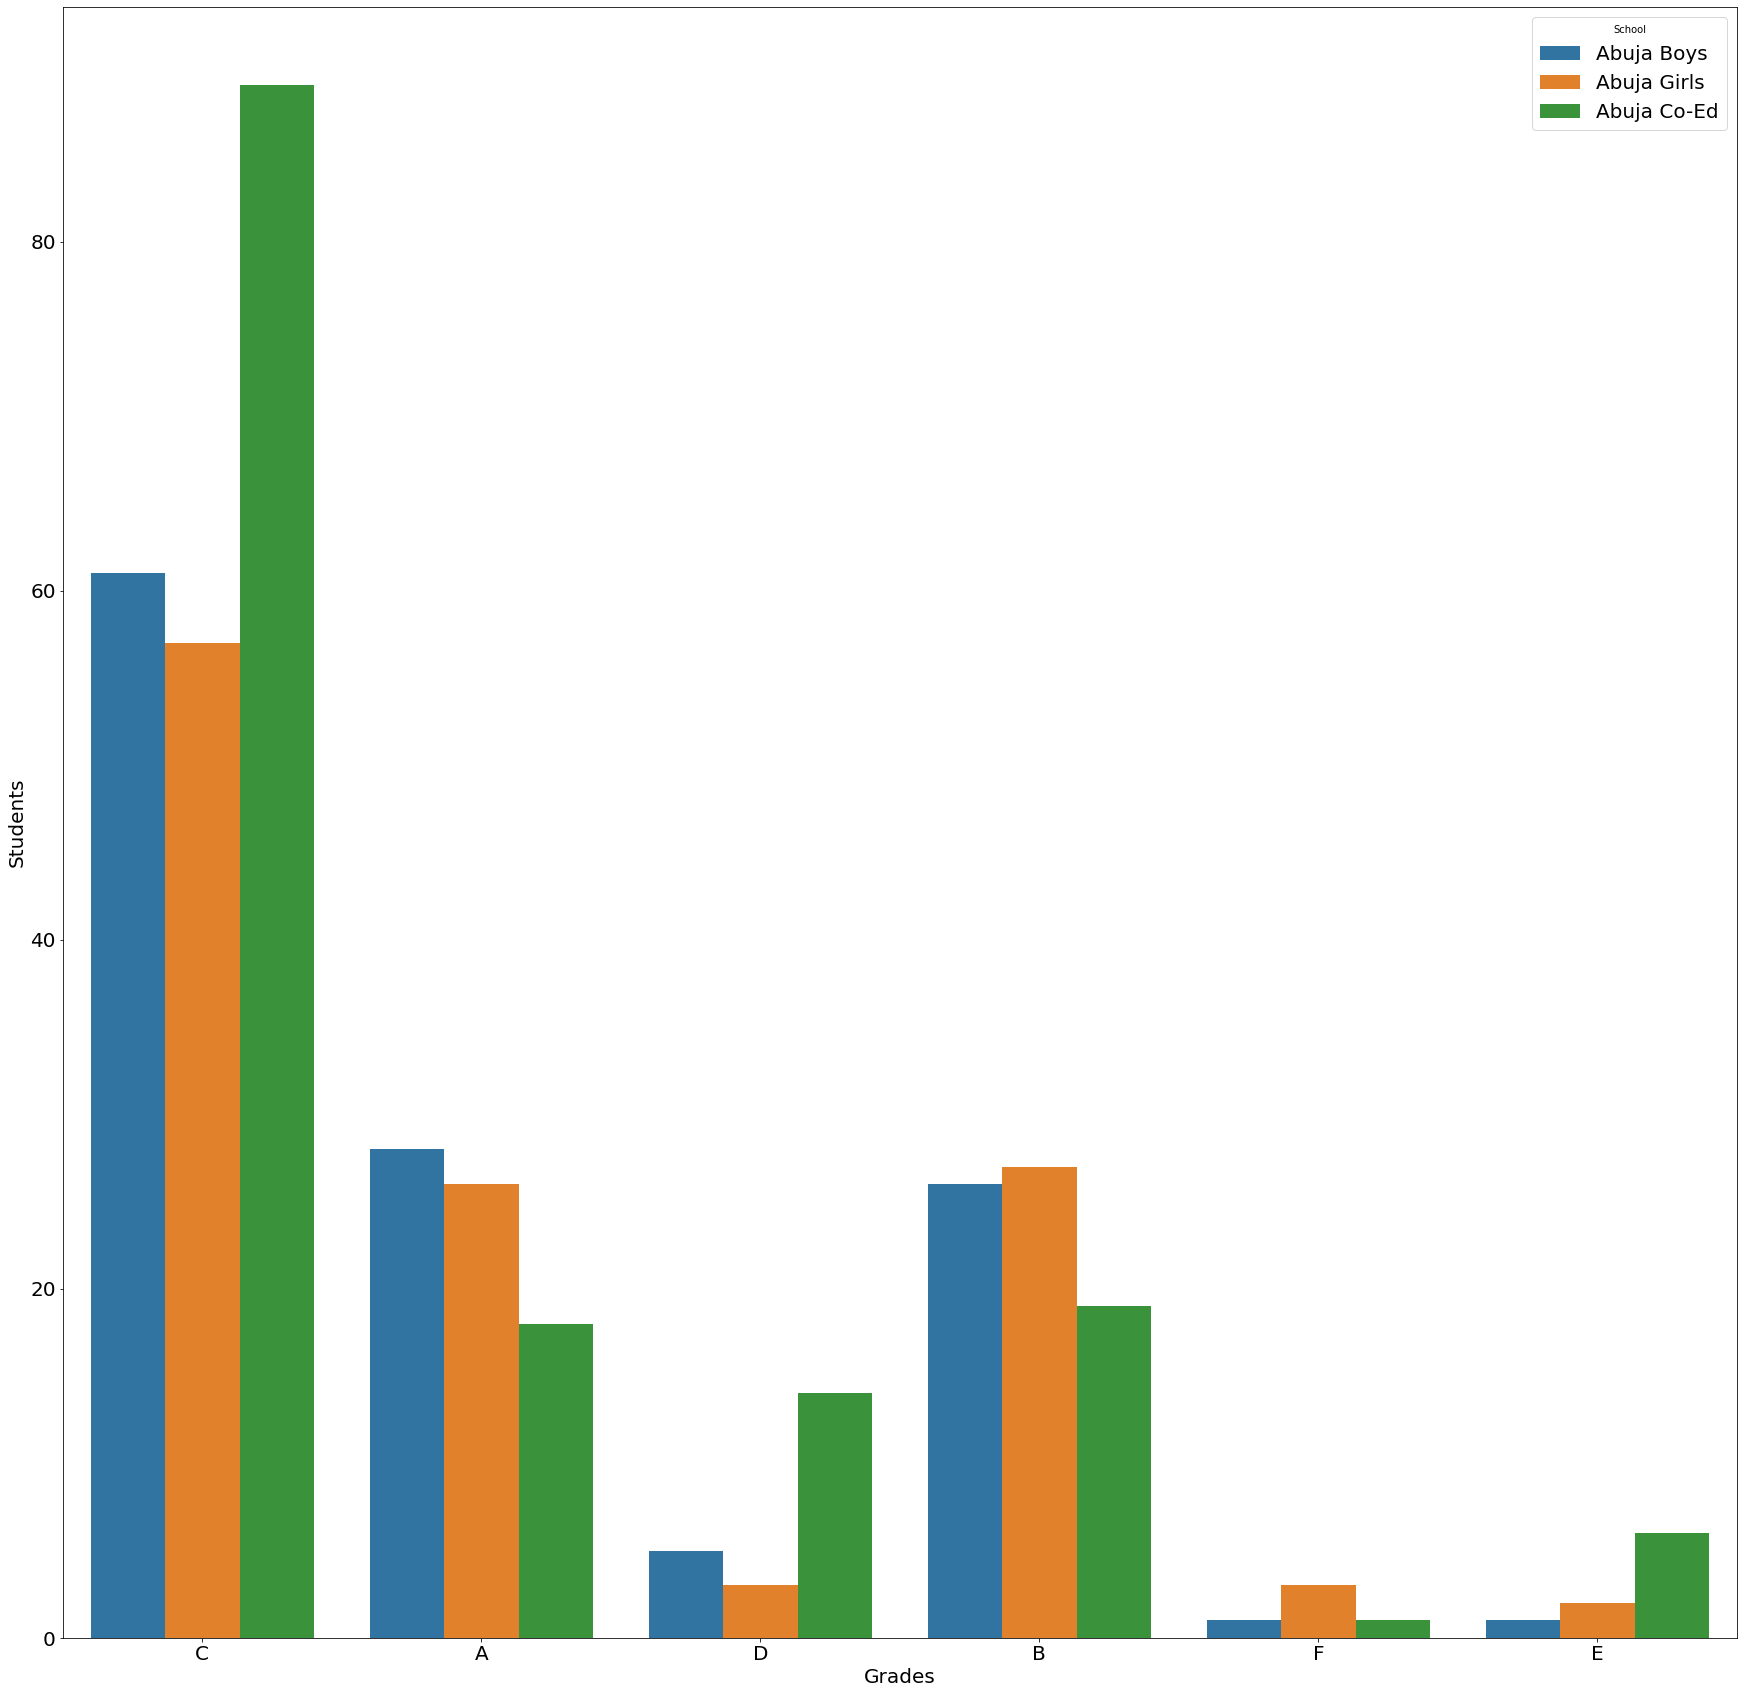

In [85]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['CHEMISTRY_SSCE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

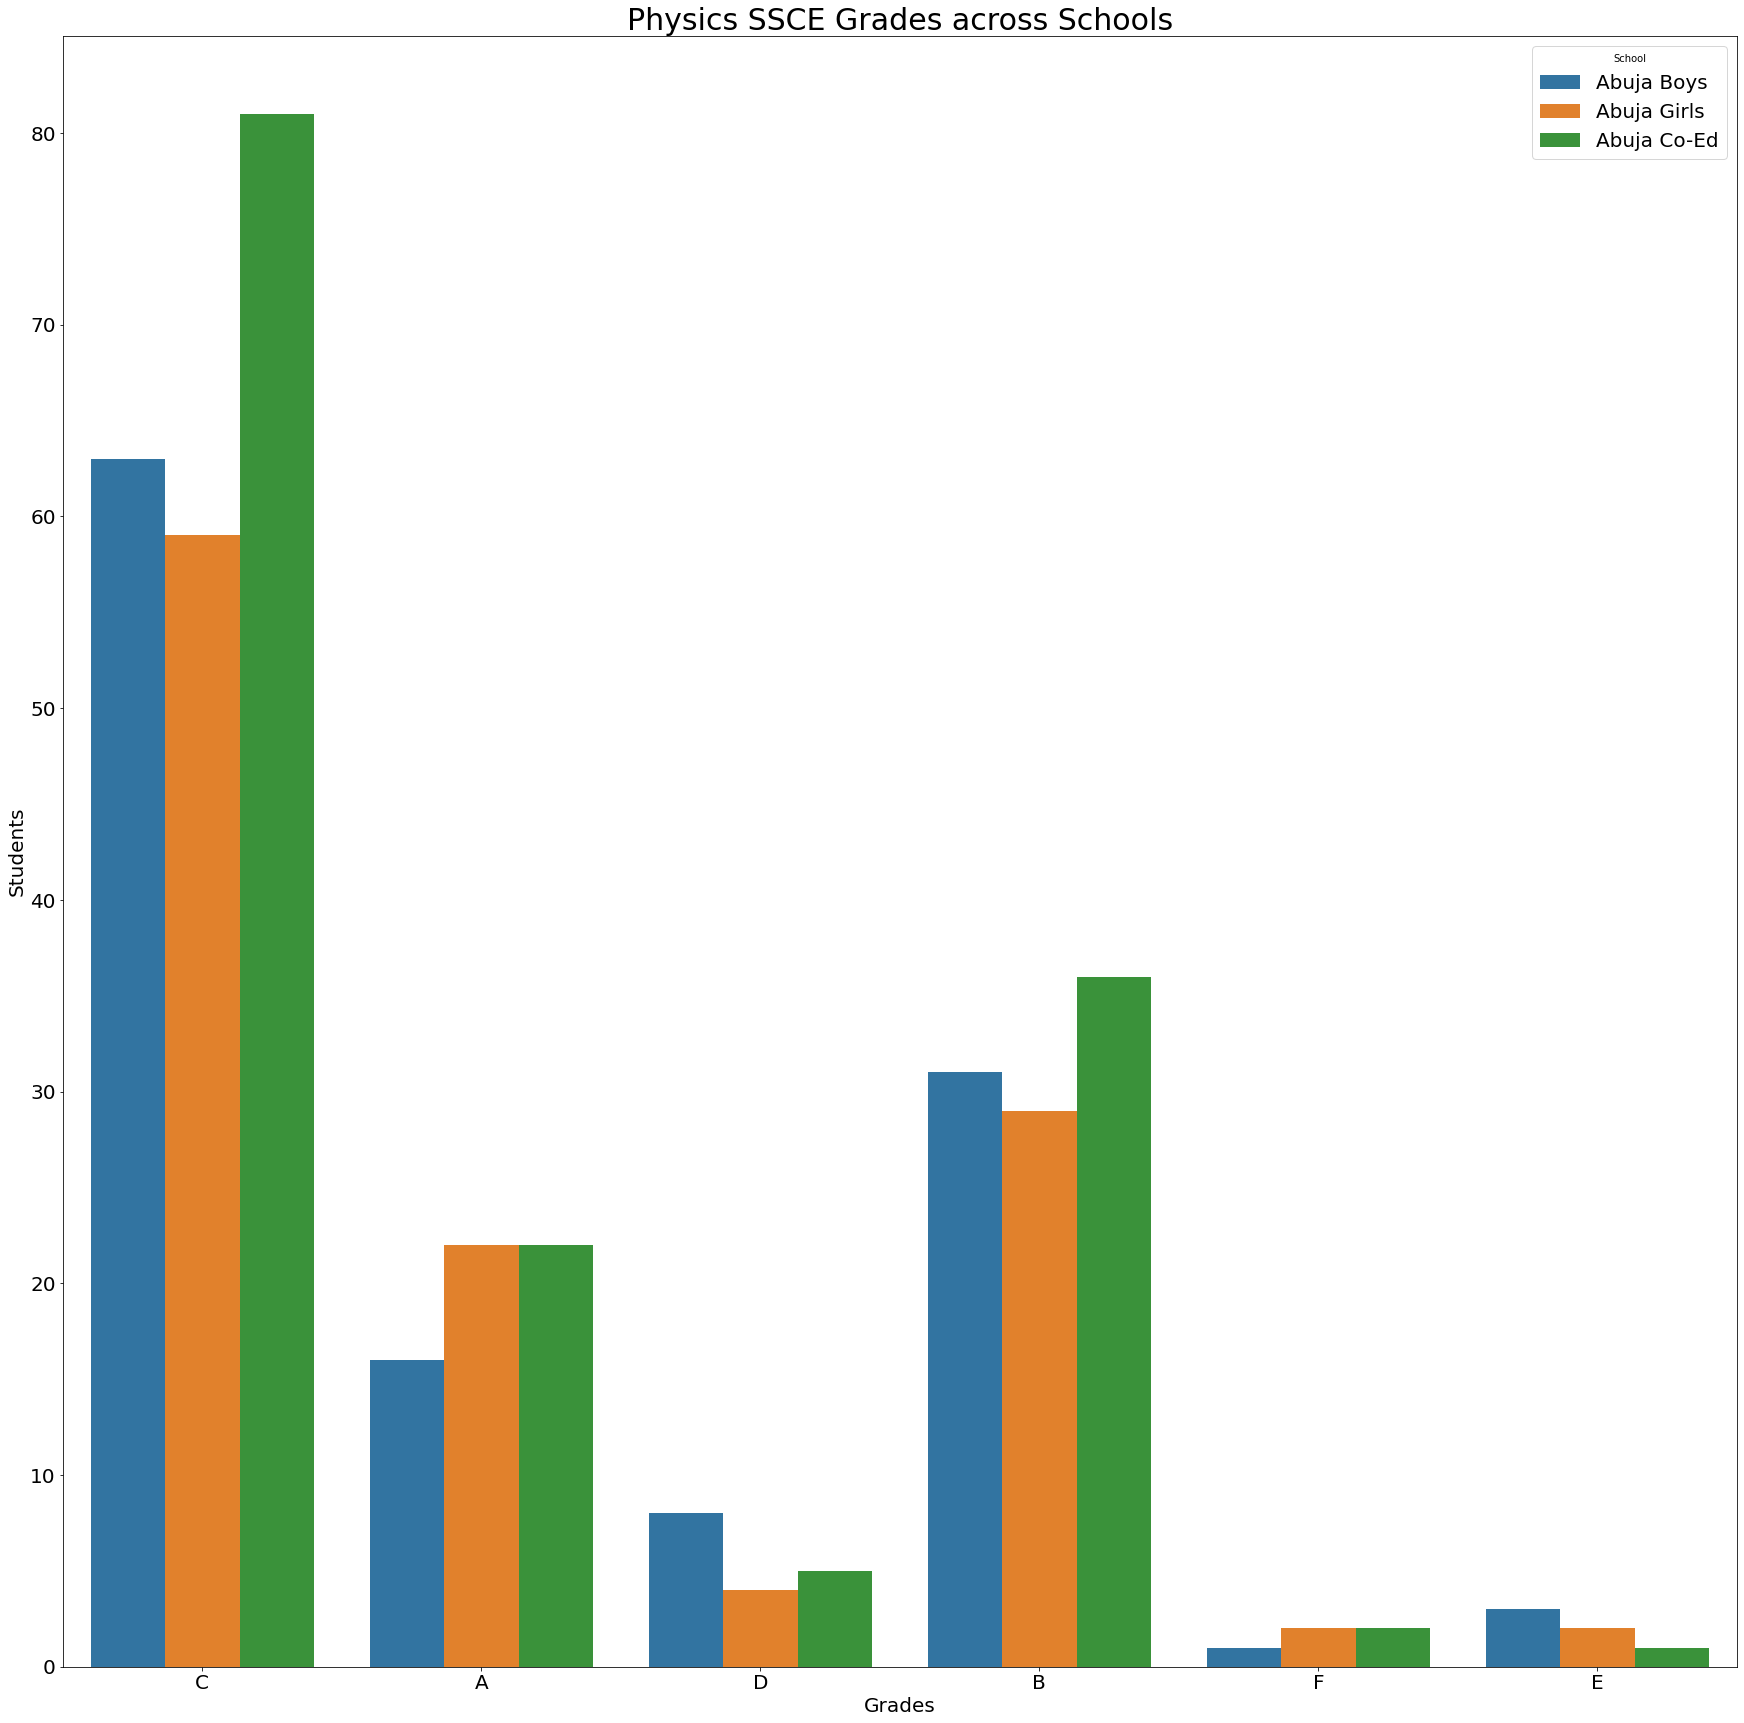

In [86]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['PHYSICS_SSCE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Physics SSCE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

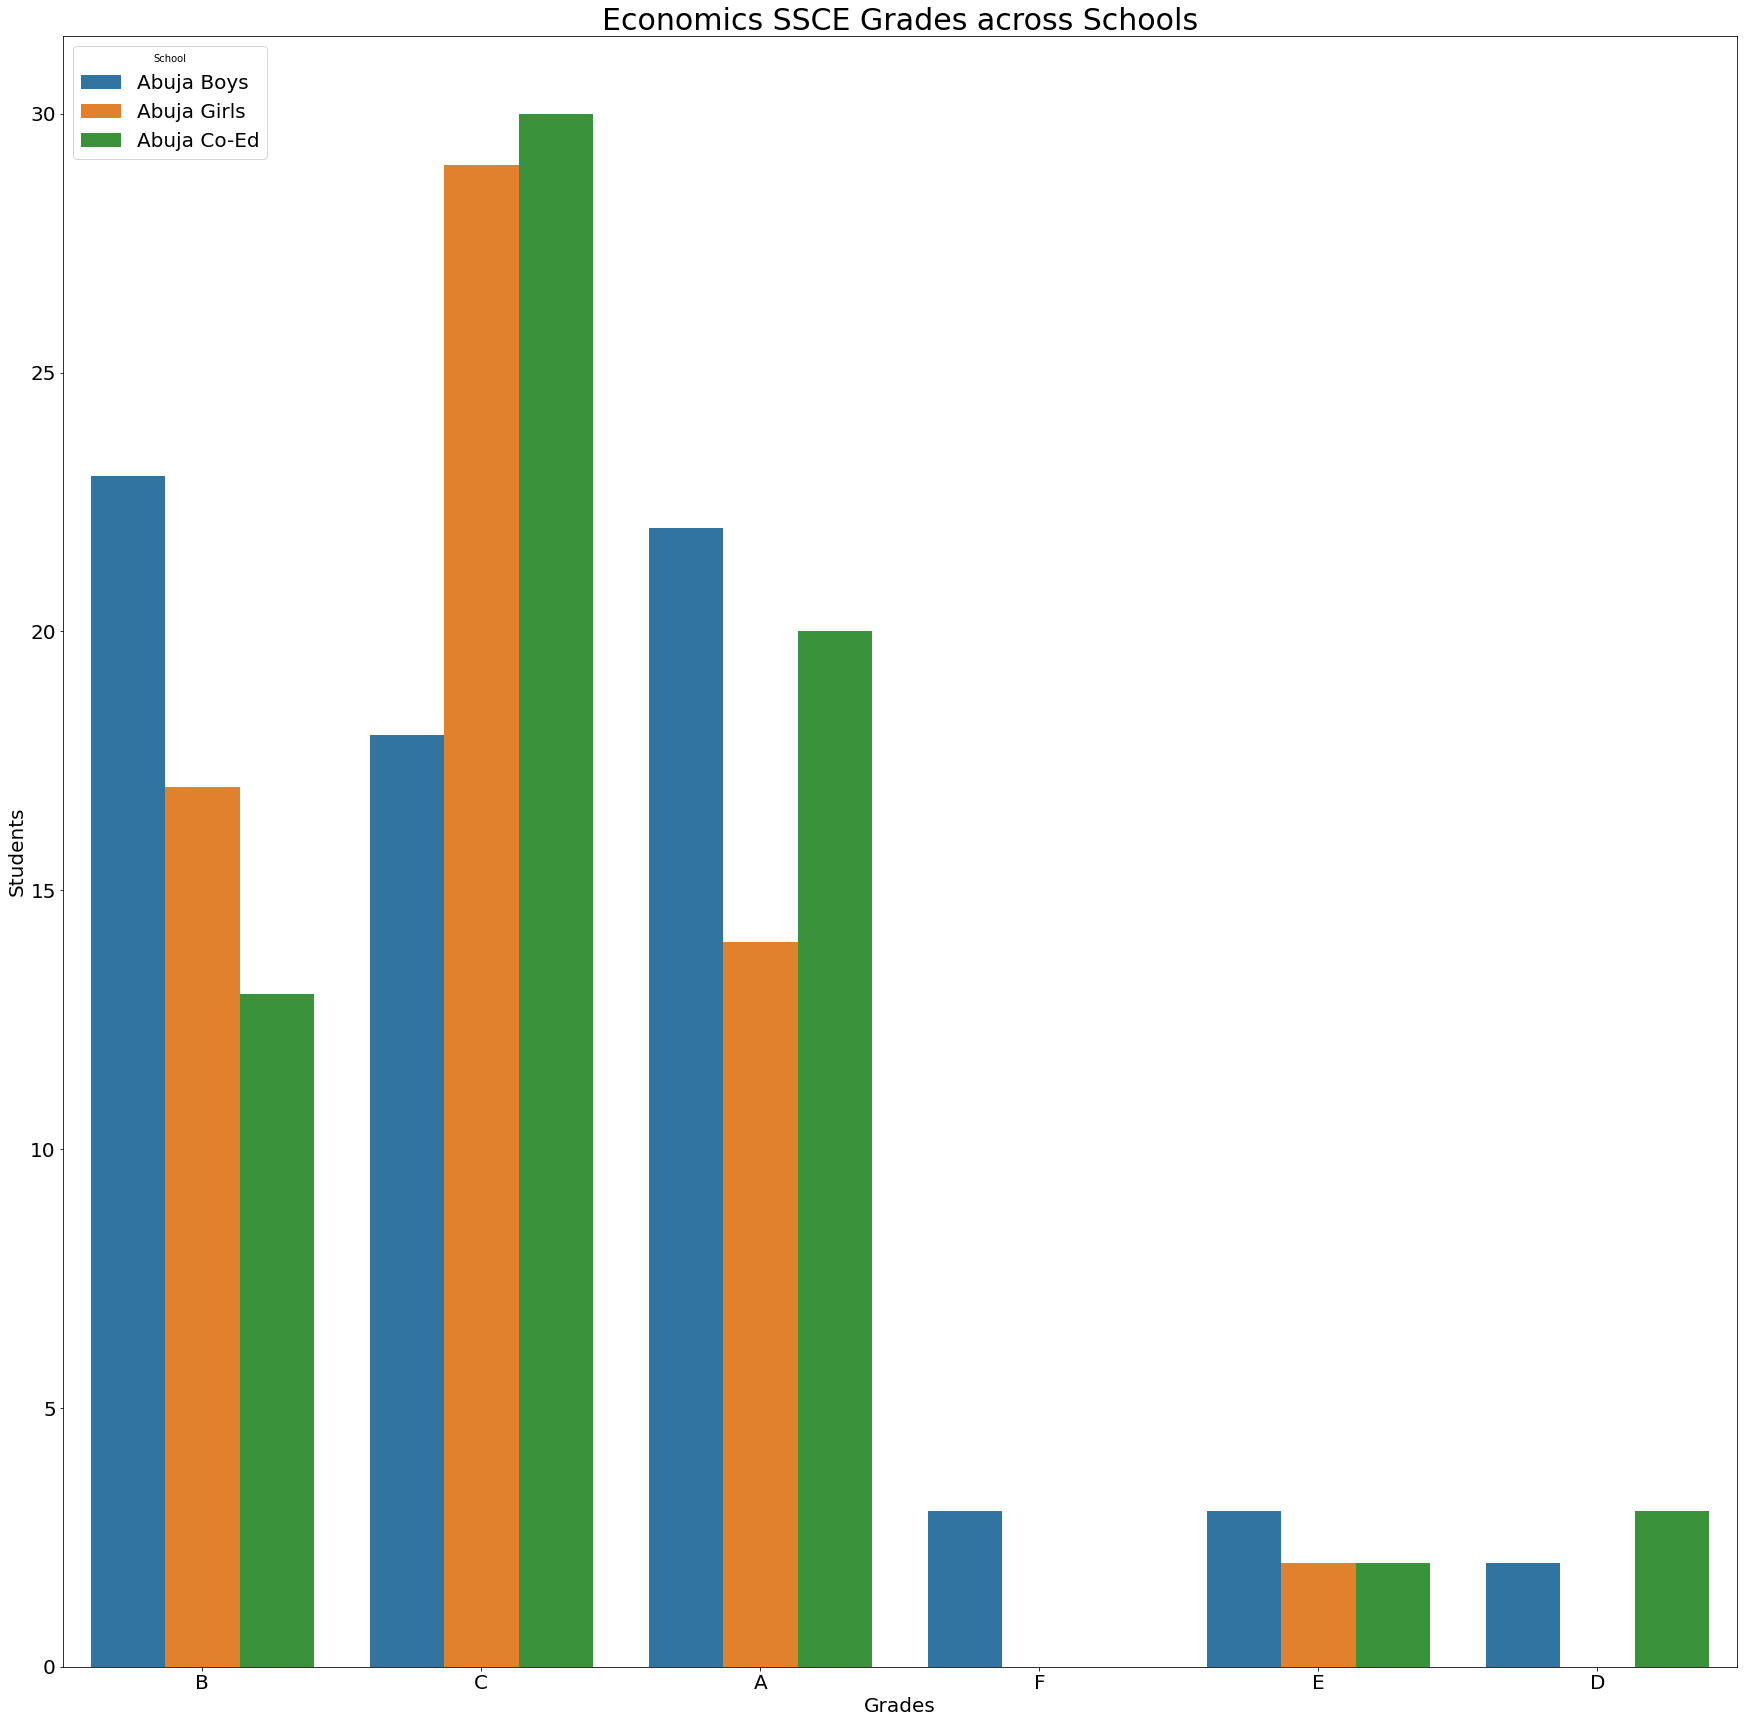

In [87]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['ECONOMICS_SSCE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Economics SSCE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

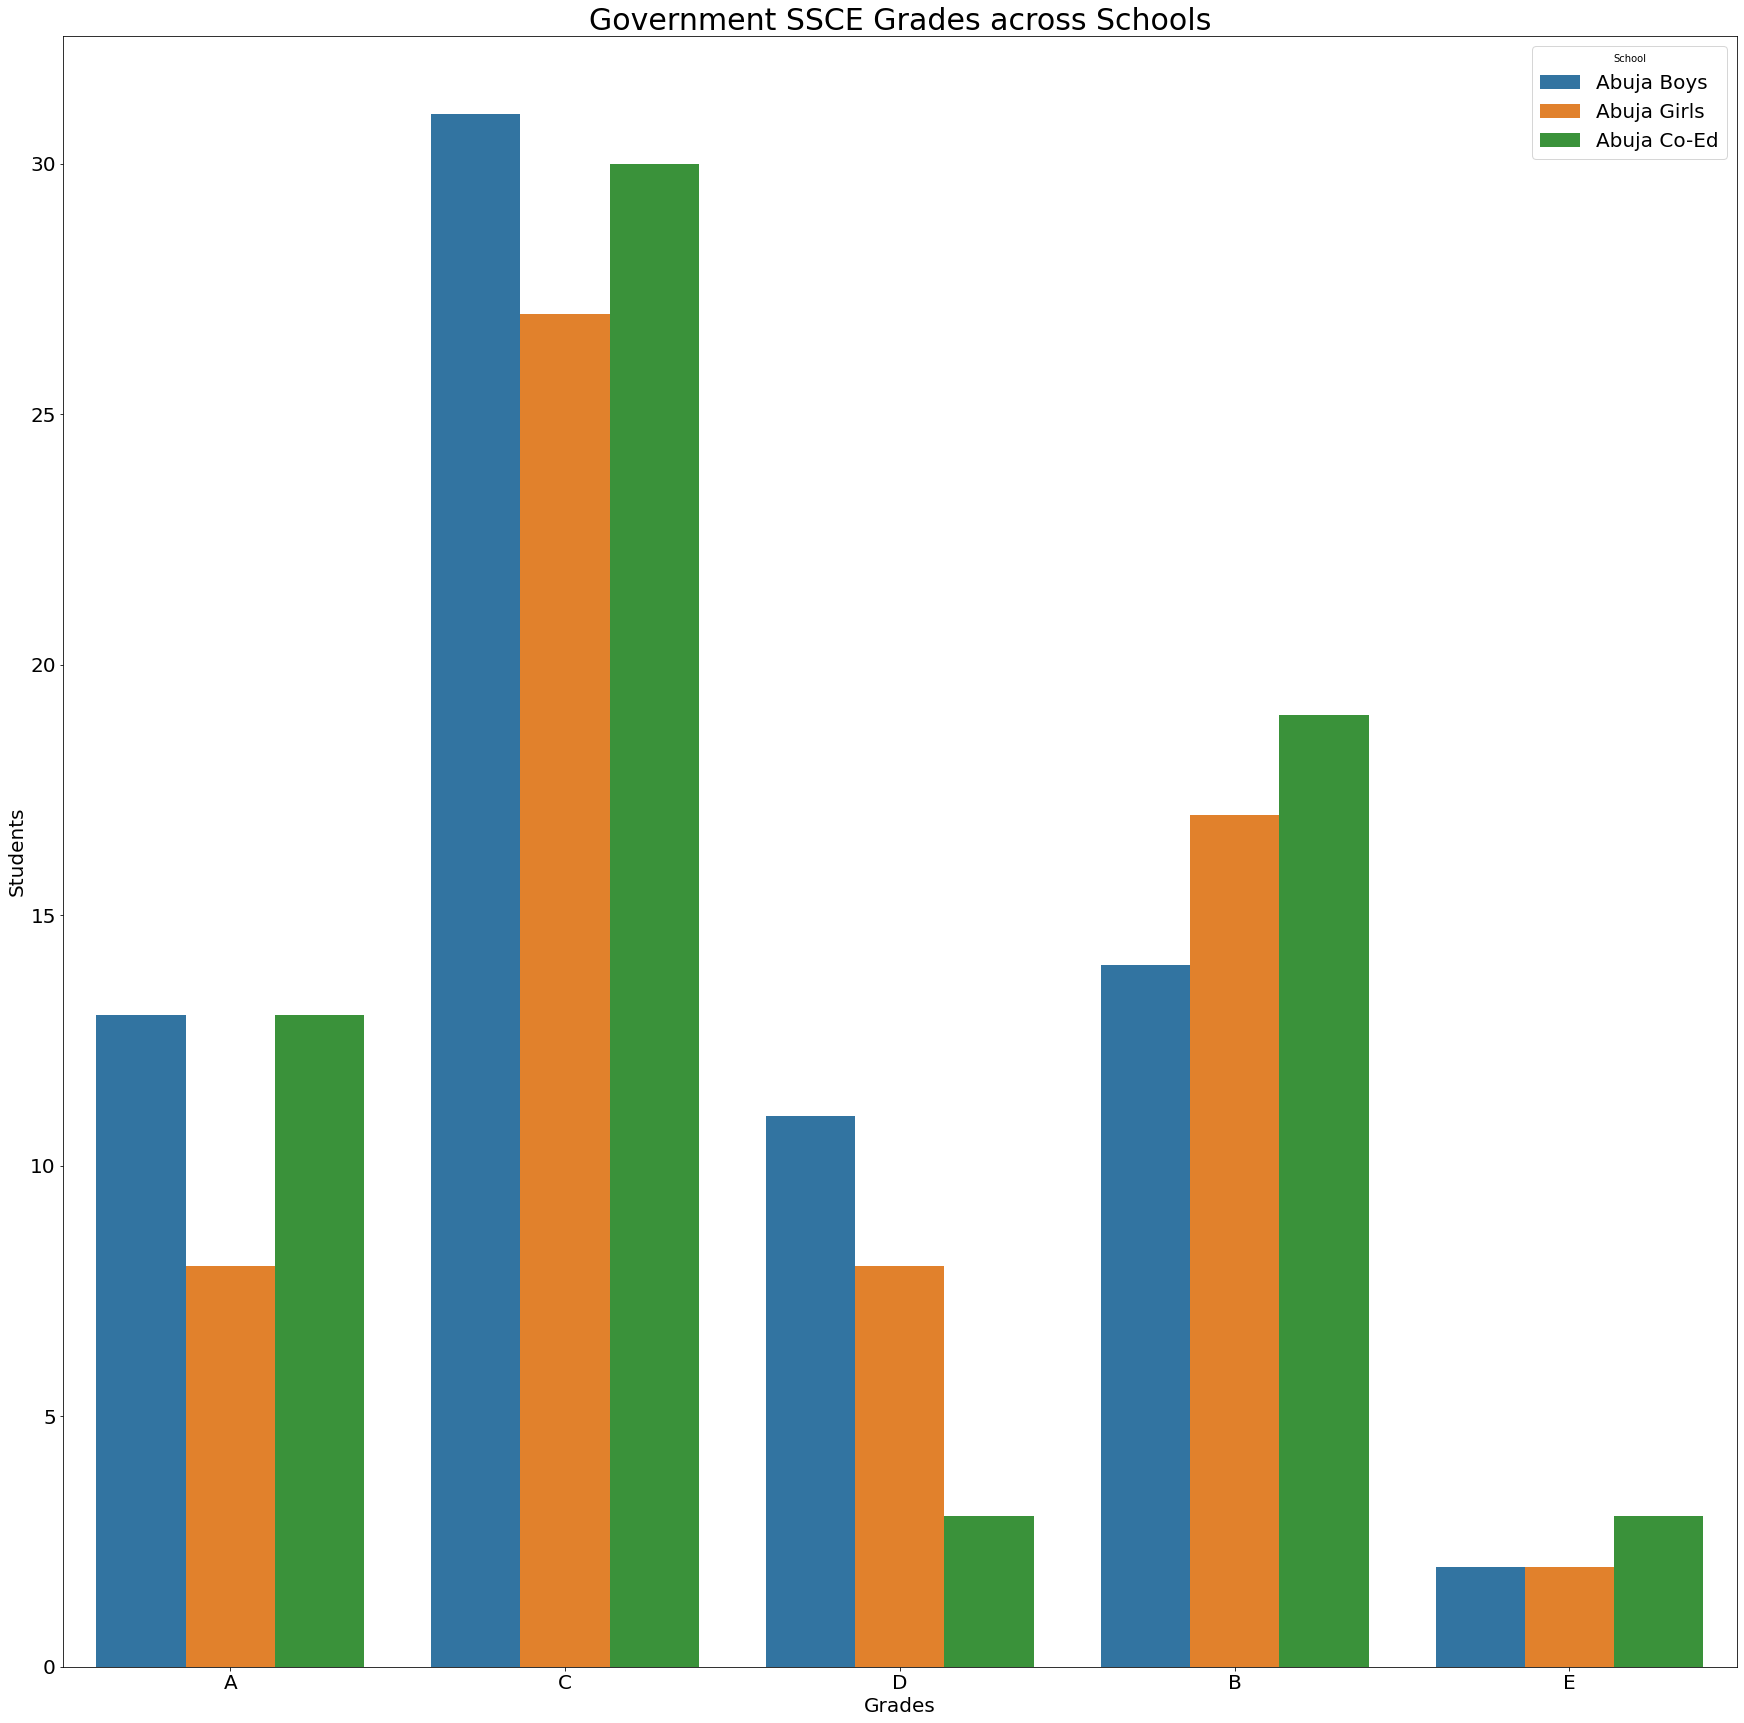

In [88]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['GOVERNMENT_SSCE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Government SSCE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

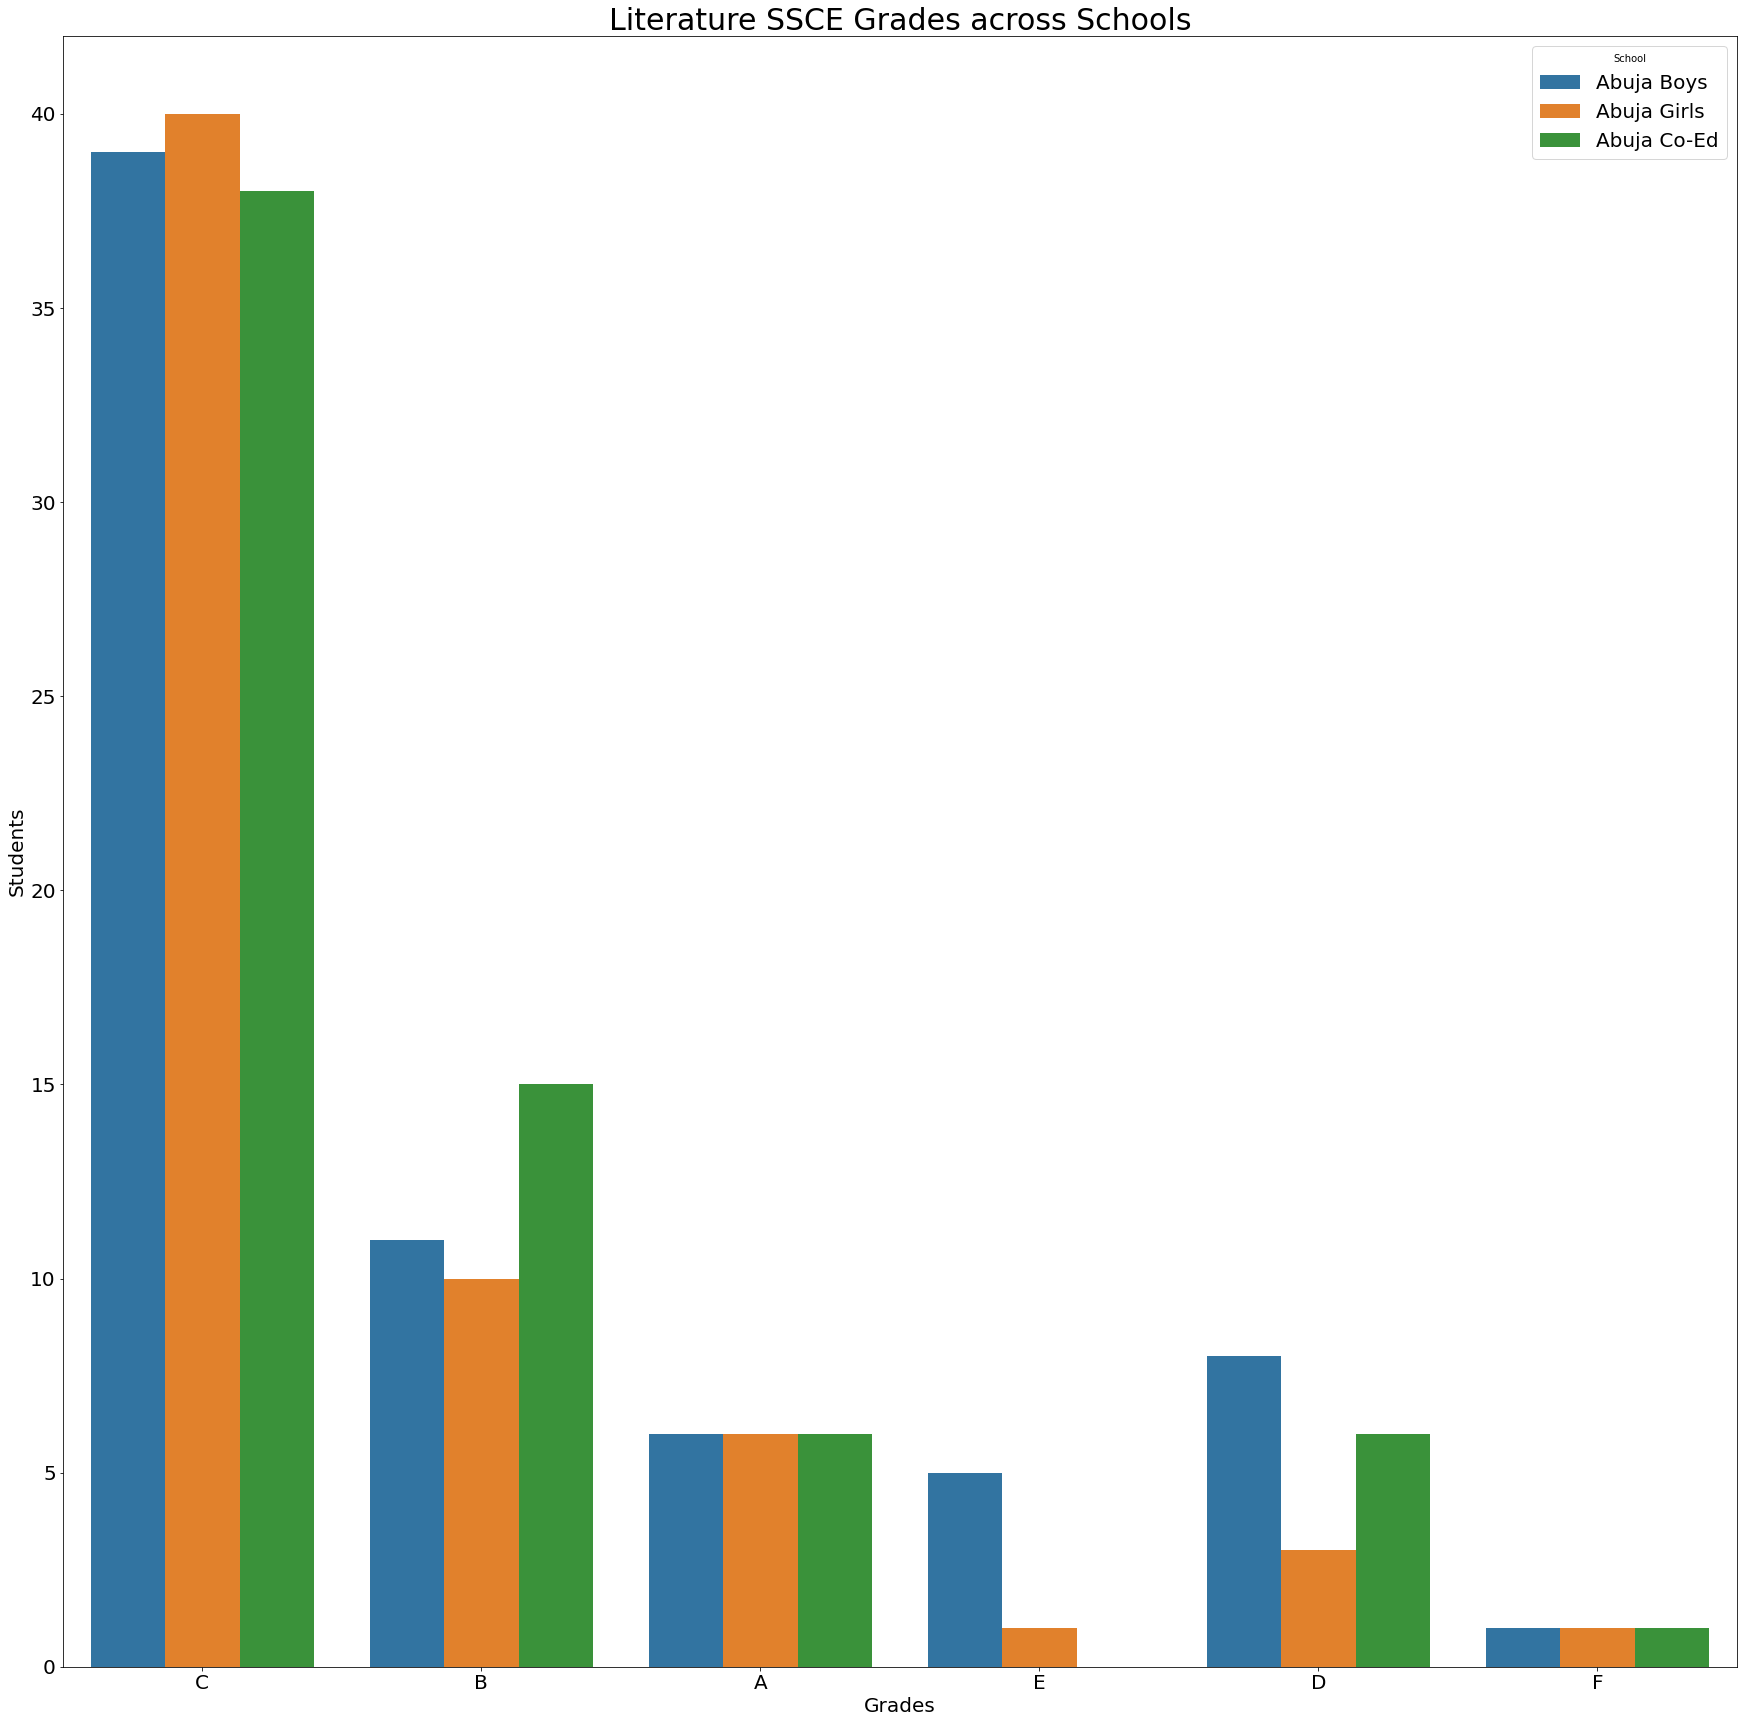

In [89]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['LITERATURE_SSCE_Grades'],hue='School',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Literature SSCE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

In [90]:
### COMPARE STUDENTS PERFORMANCE IN ENGLISH LANGUAGE IN BECE AND SSCE

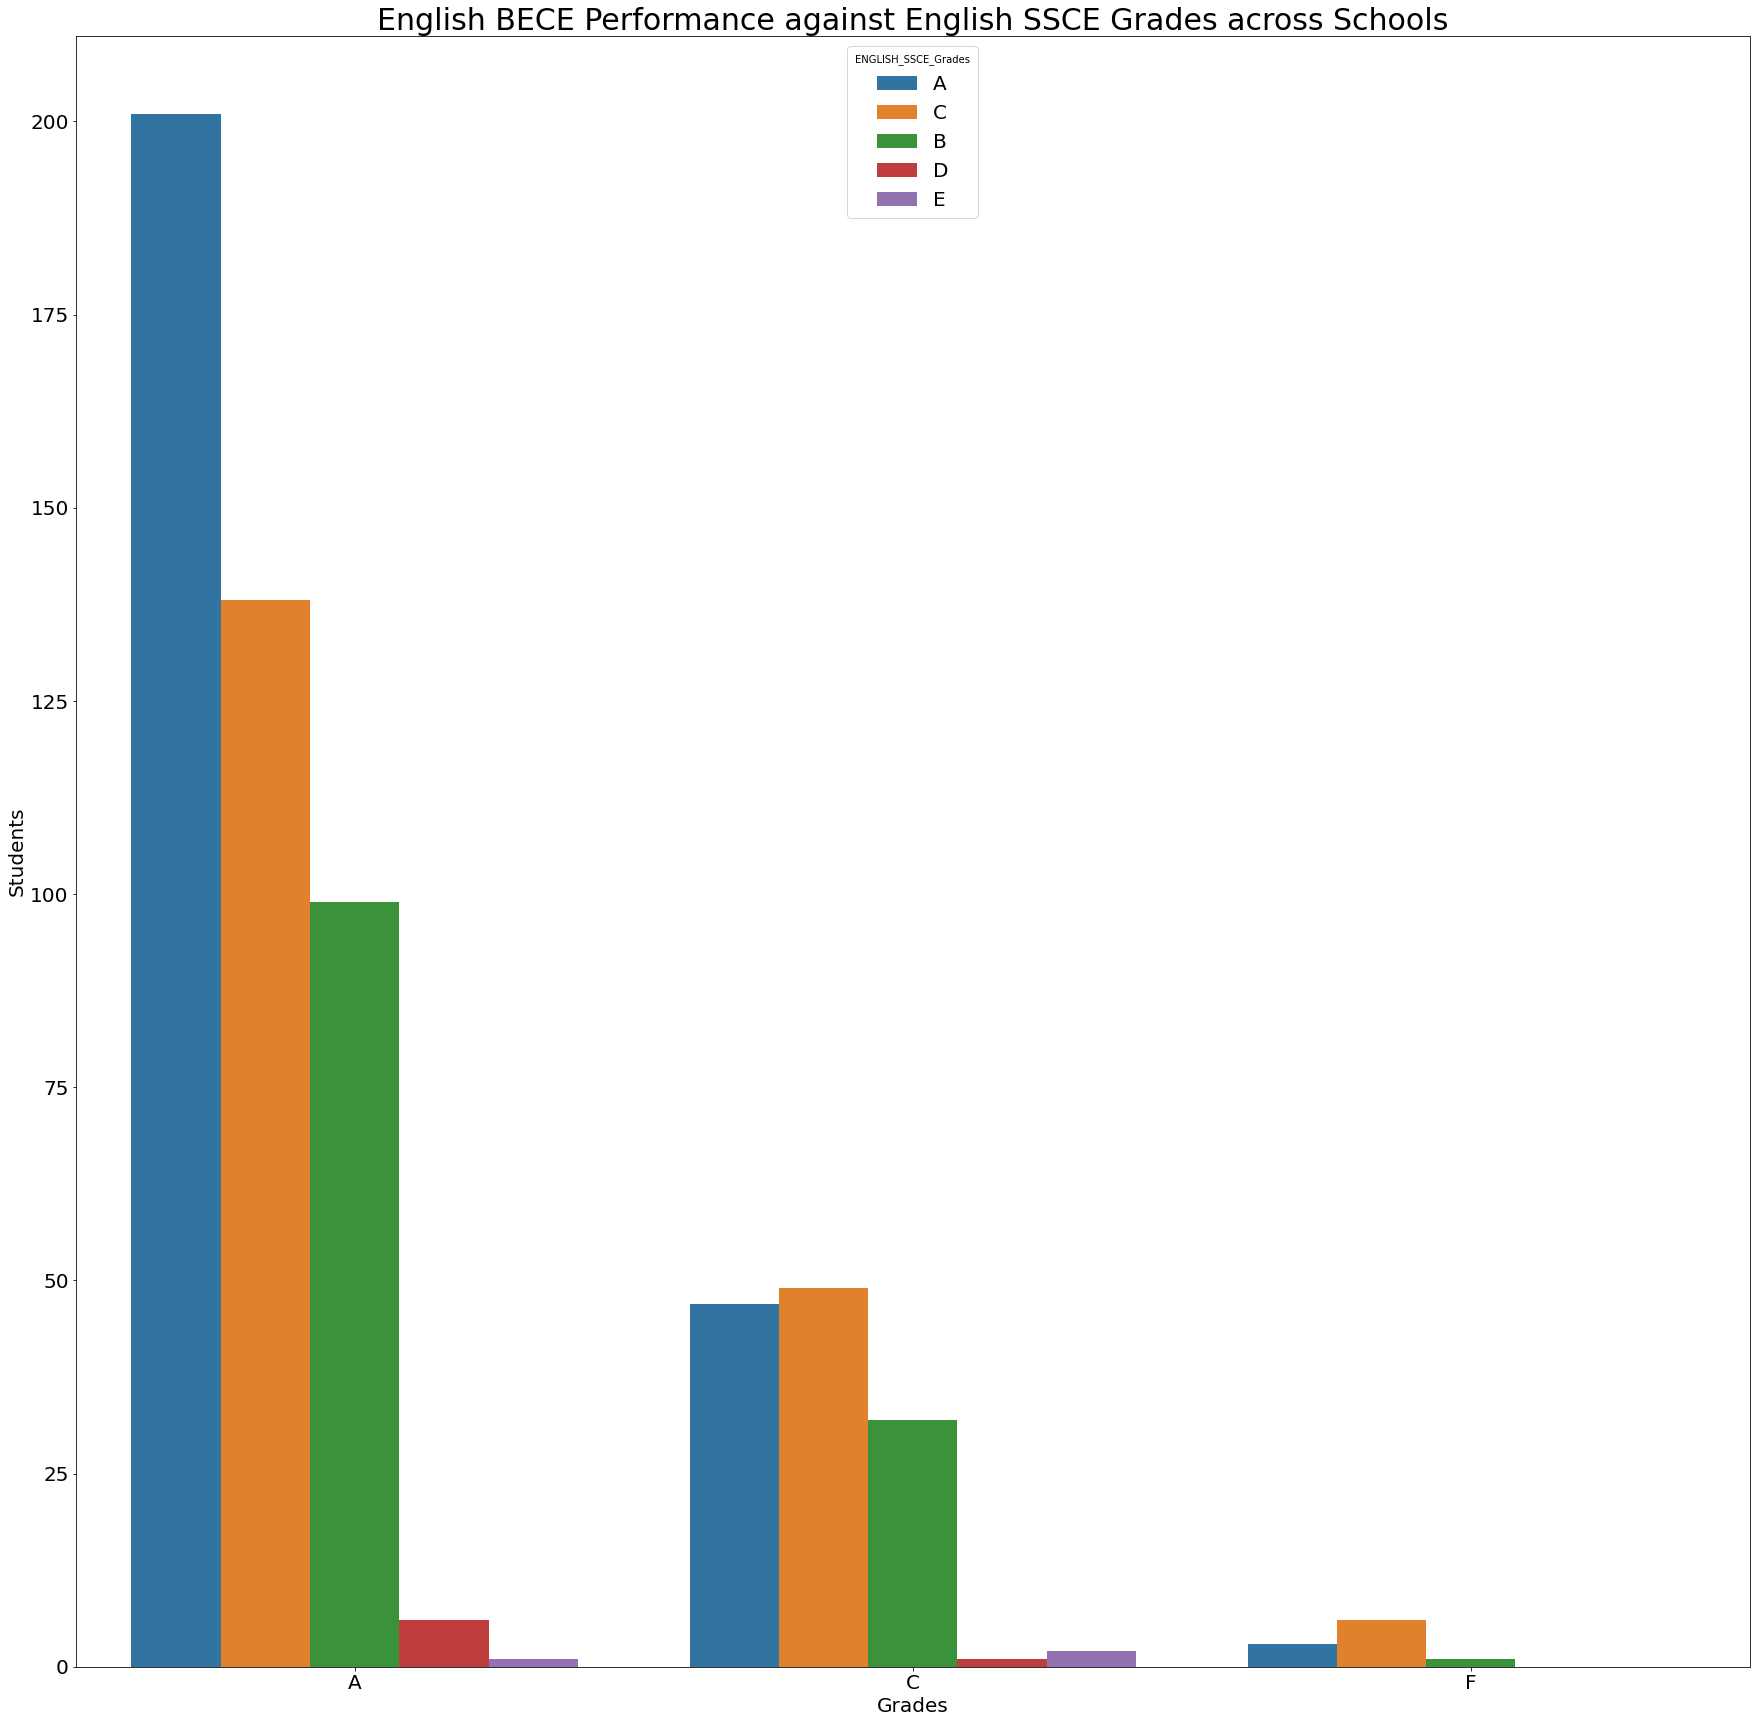

In [91]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['ENGLISH_BECE_Grades'],hue='ENGLISH_SSCE_Grades',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("English BECE Performance against English SSCE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

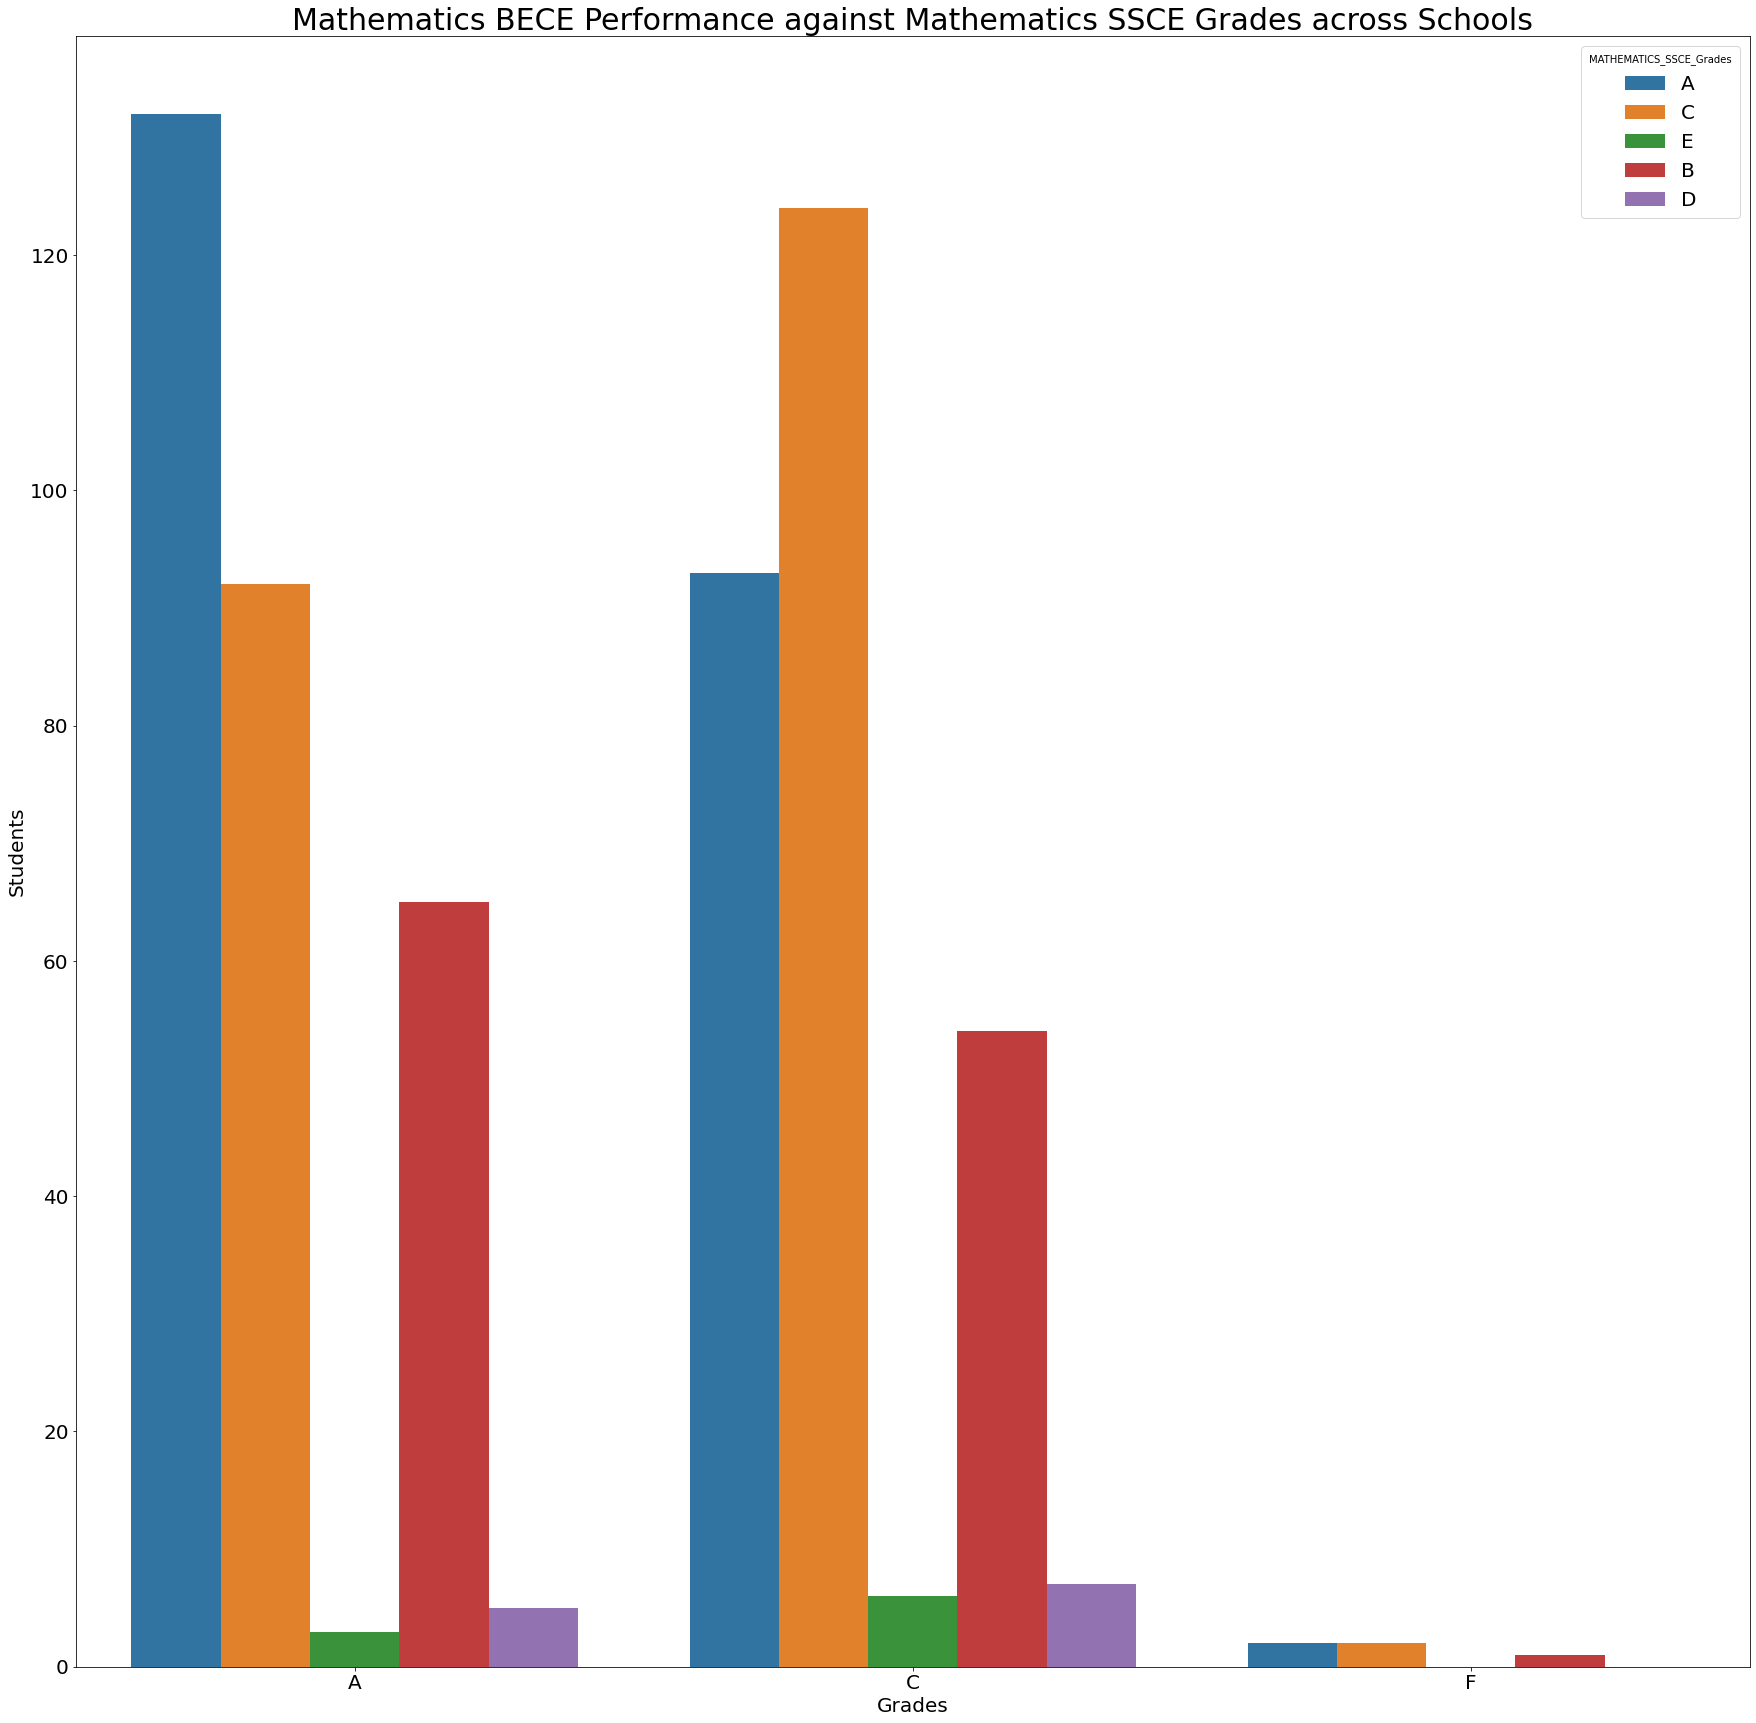

In [92]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['MATHEMATICS_BECE_Grades'],hue='MATHEMATICS_SSCE_Grades',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Mathematics BECE Performance against Mathematics SSCE Grades across Schools", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

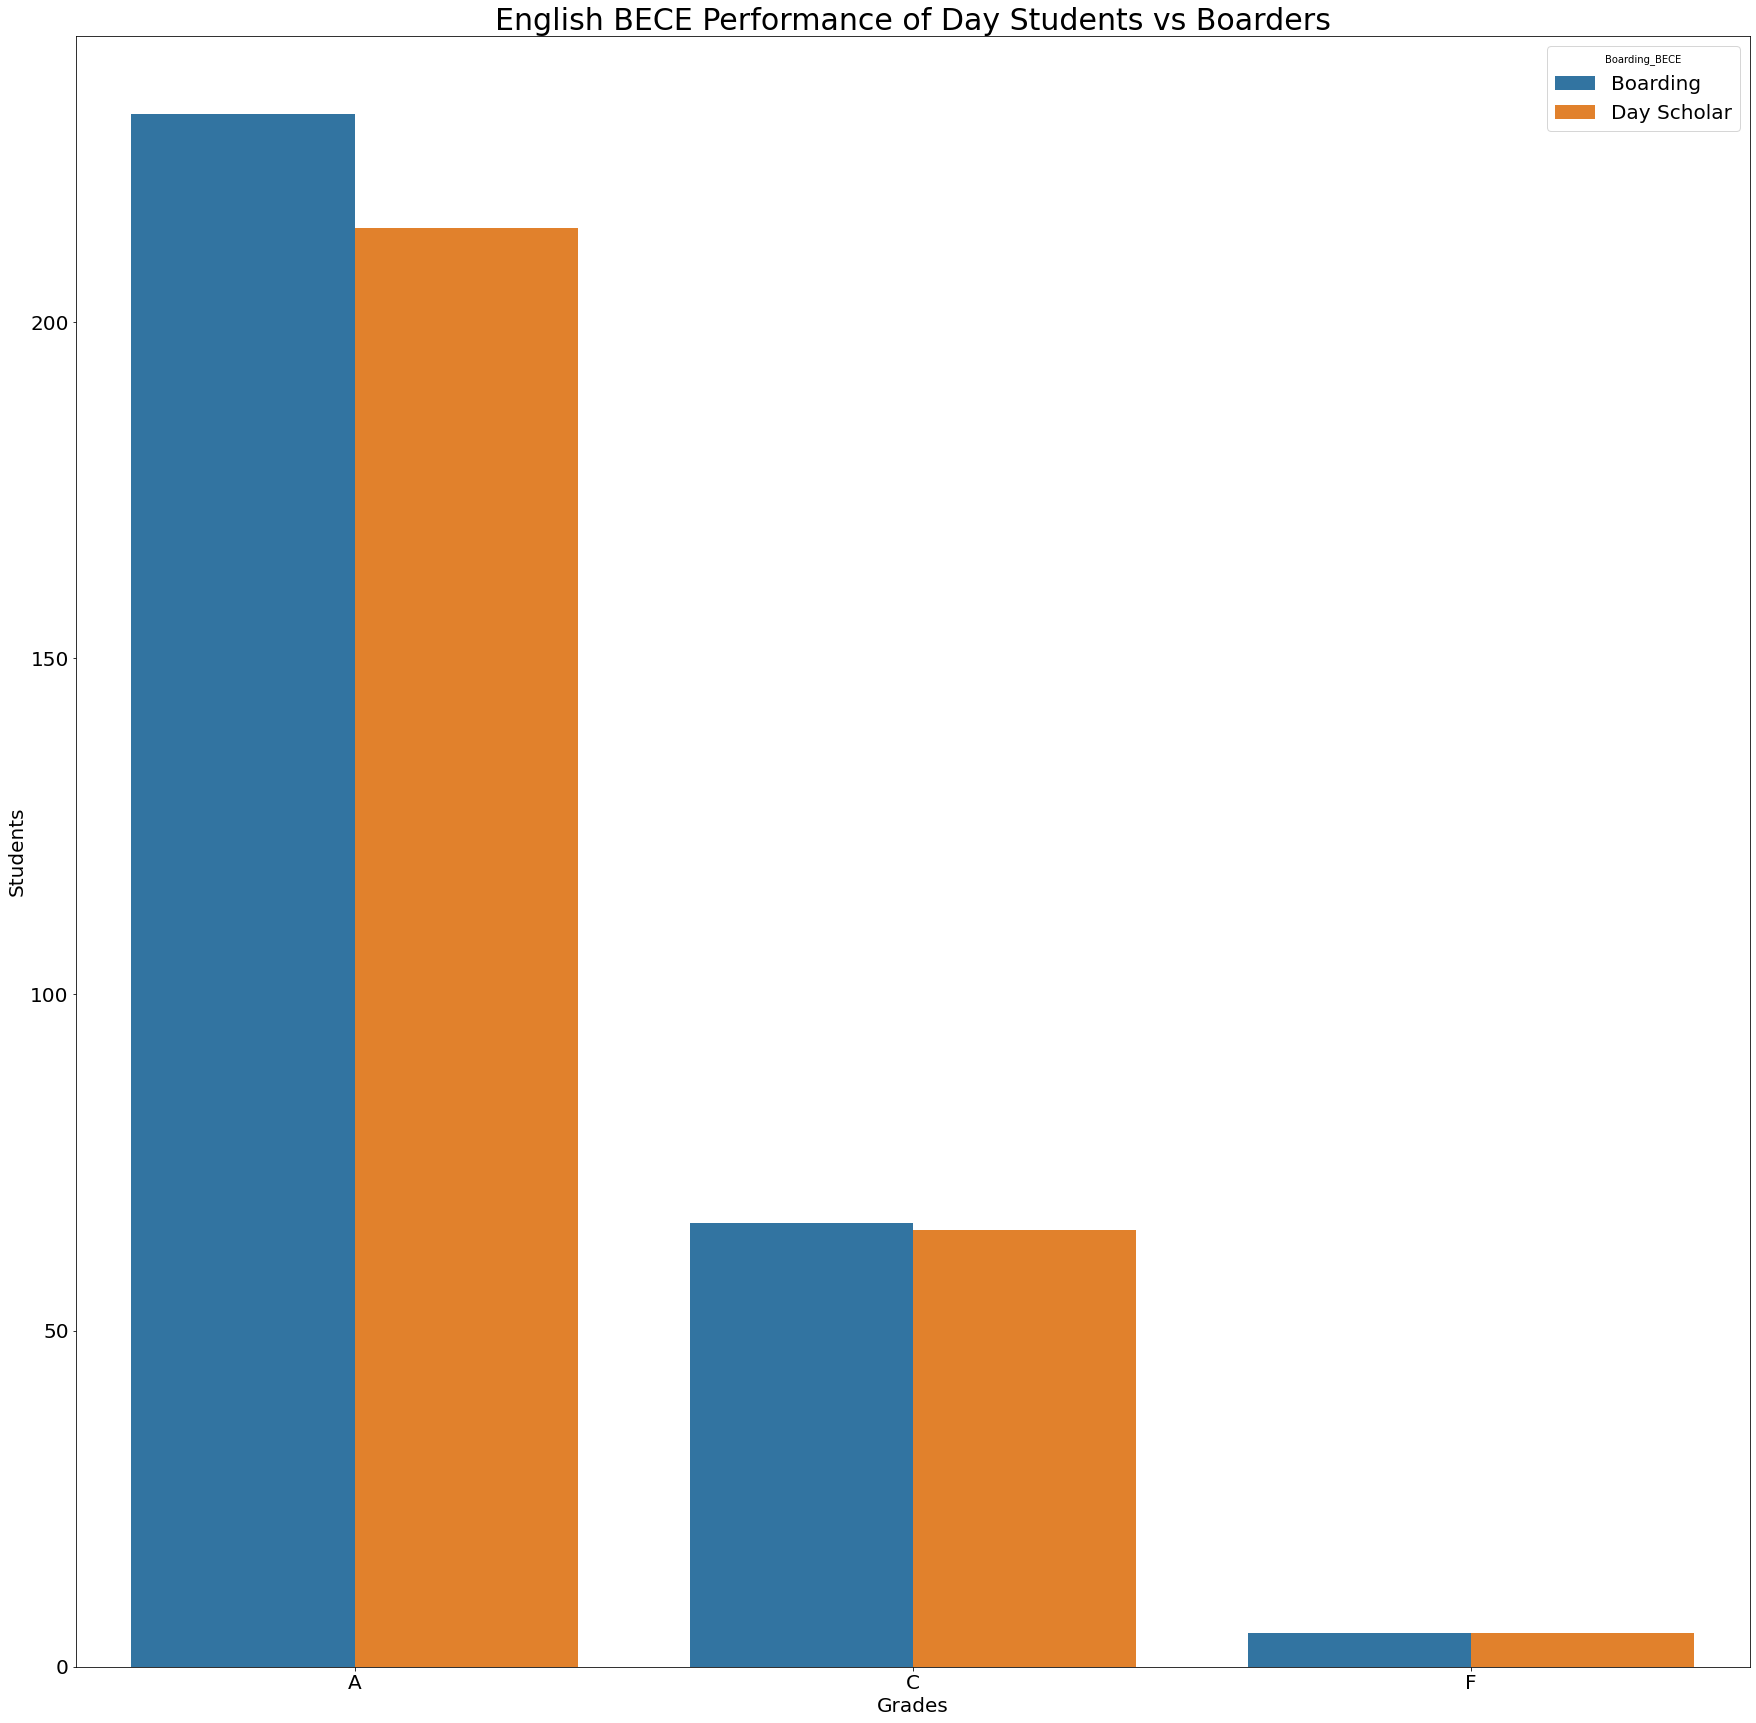

In [93]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['ENGLISH_BECE_Grades'],hue='Boarding_BECE',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("English BECE Performance of Day Students vs Boarders", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

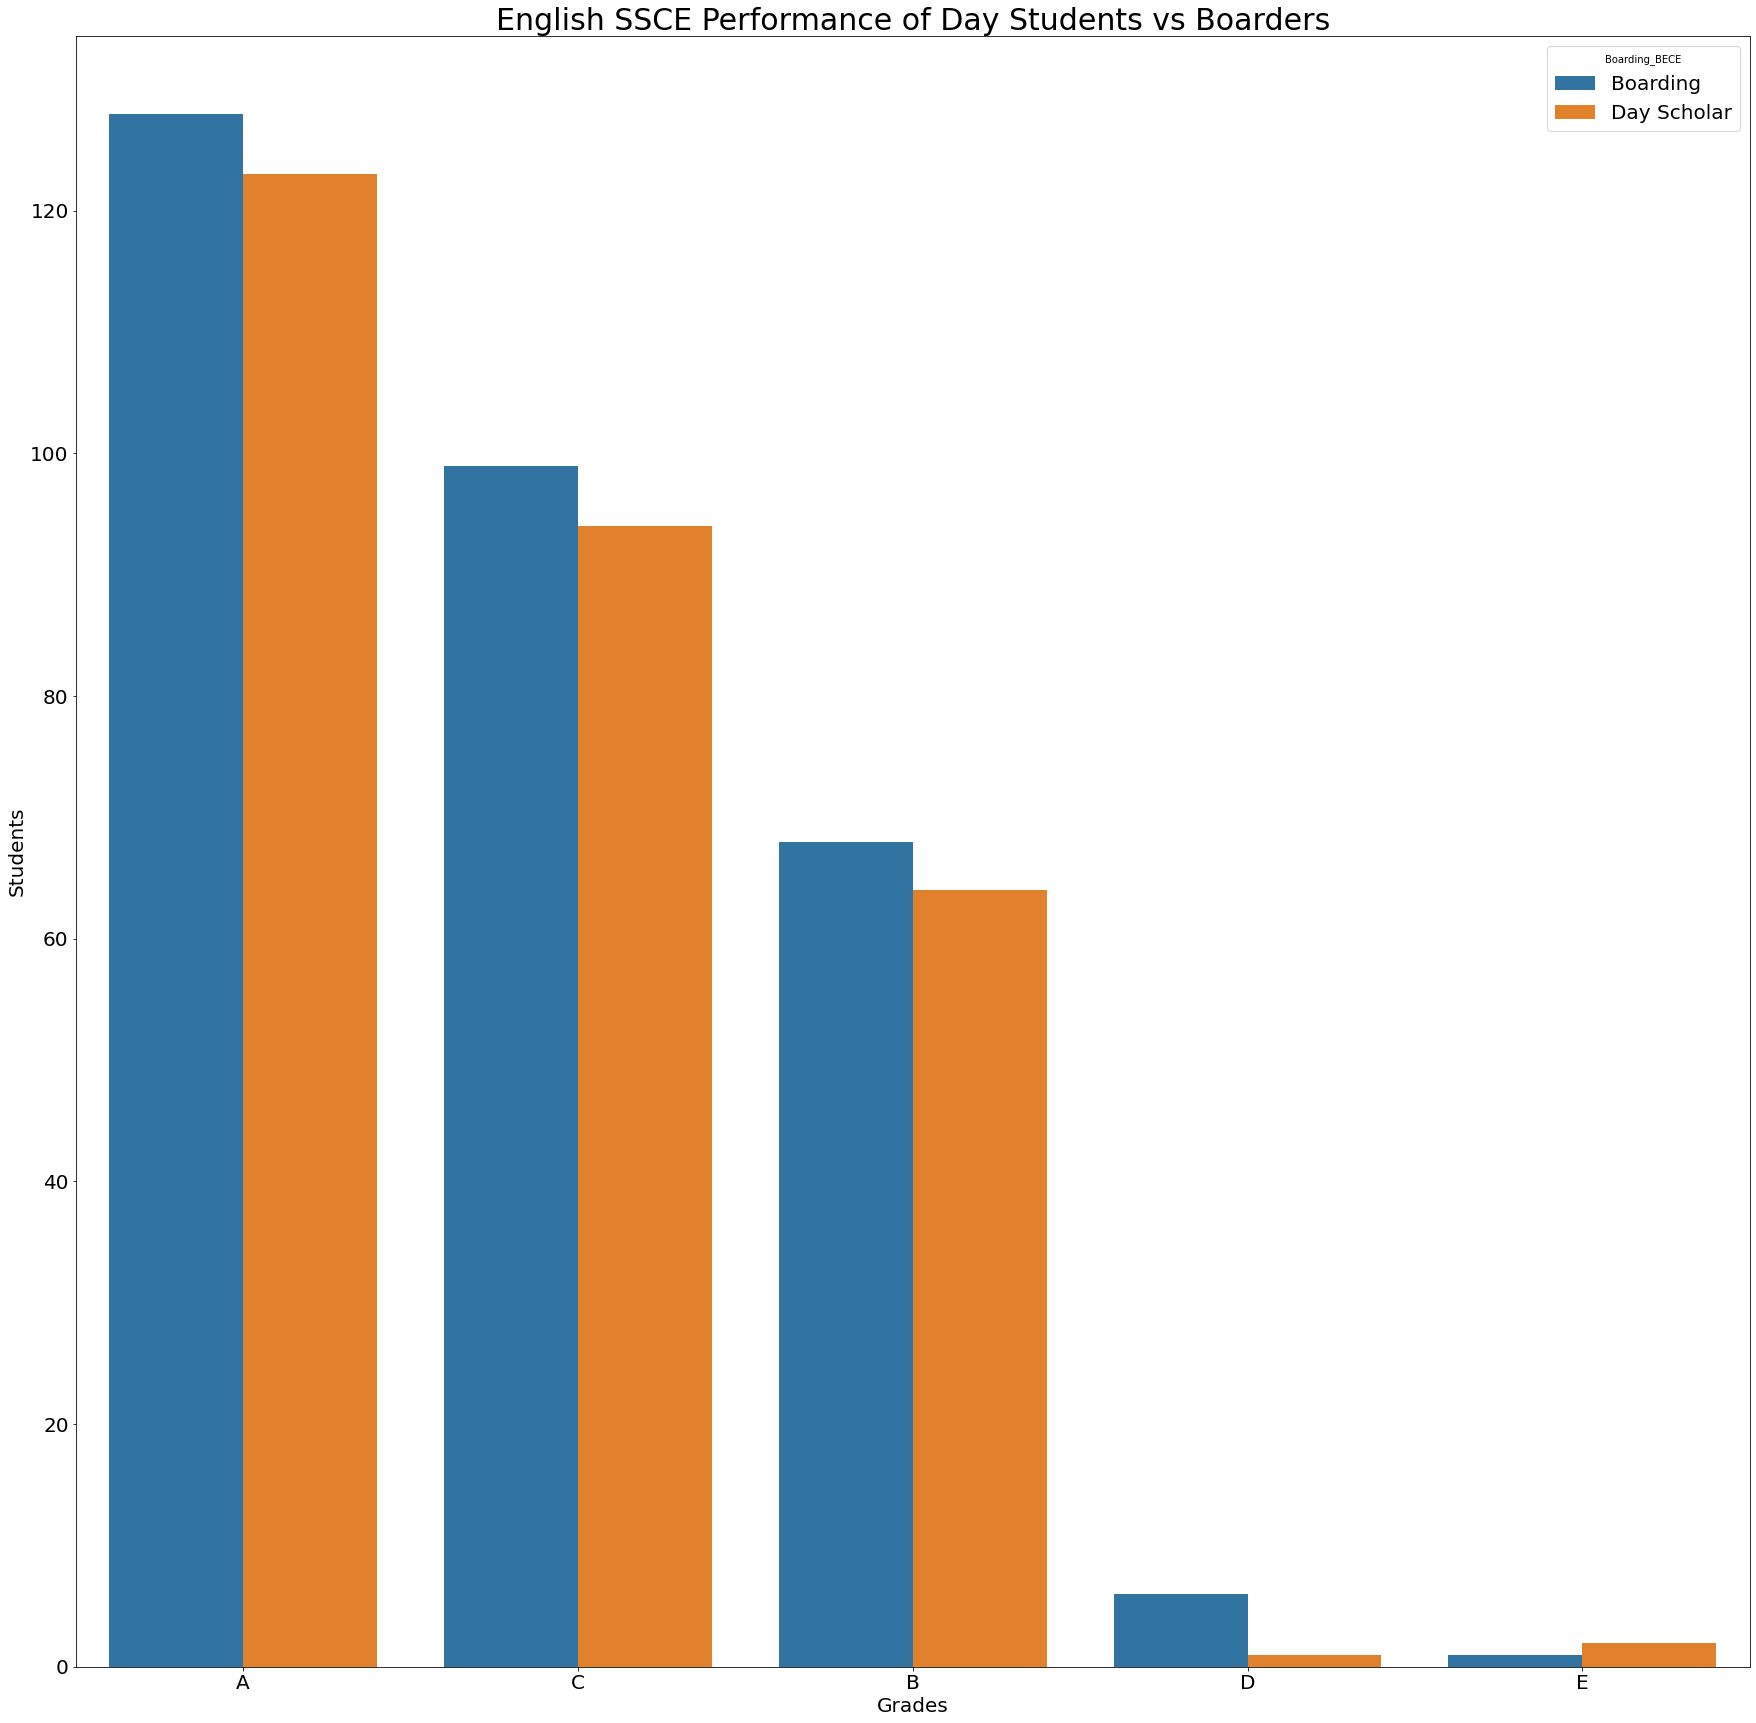

In [94]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['ENGLISH_SSCE_Grades'],hue='Boarding_BECE',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("English SSCE Performance of Day Students vs Boarders", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

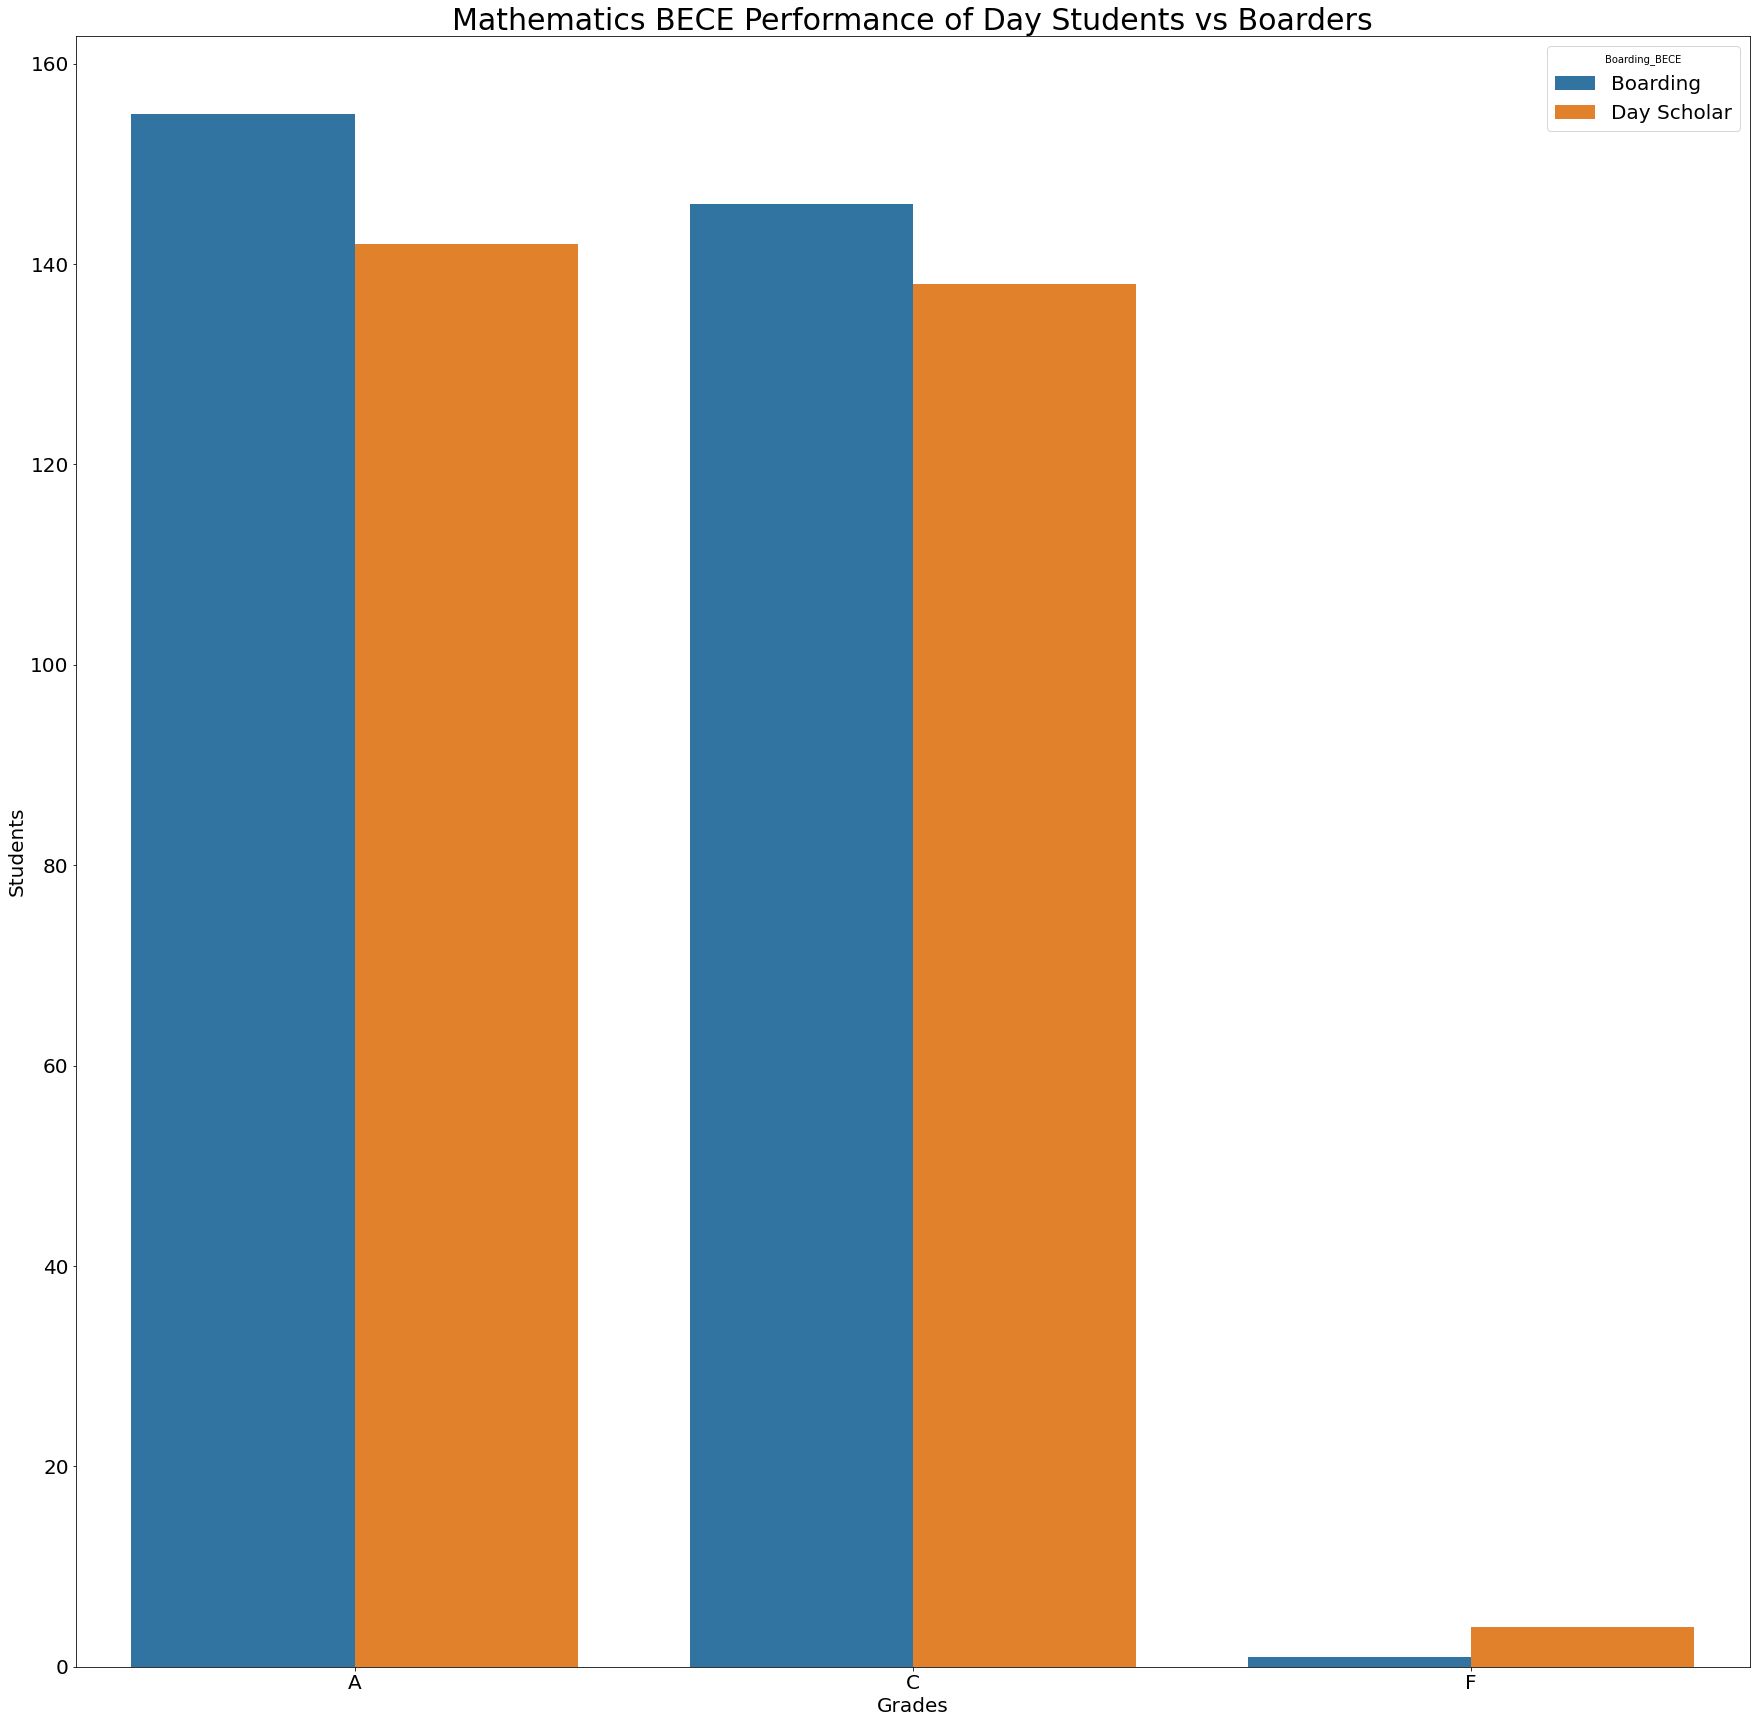

In [95]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['MATHEMATICS_BECE_Grades'],hue='Boarding_BECE',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Mathematics BECE Performance of Day Students vs Boarders", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

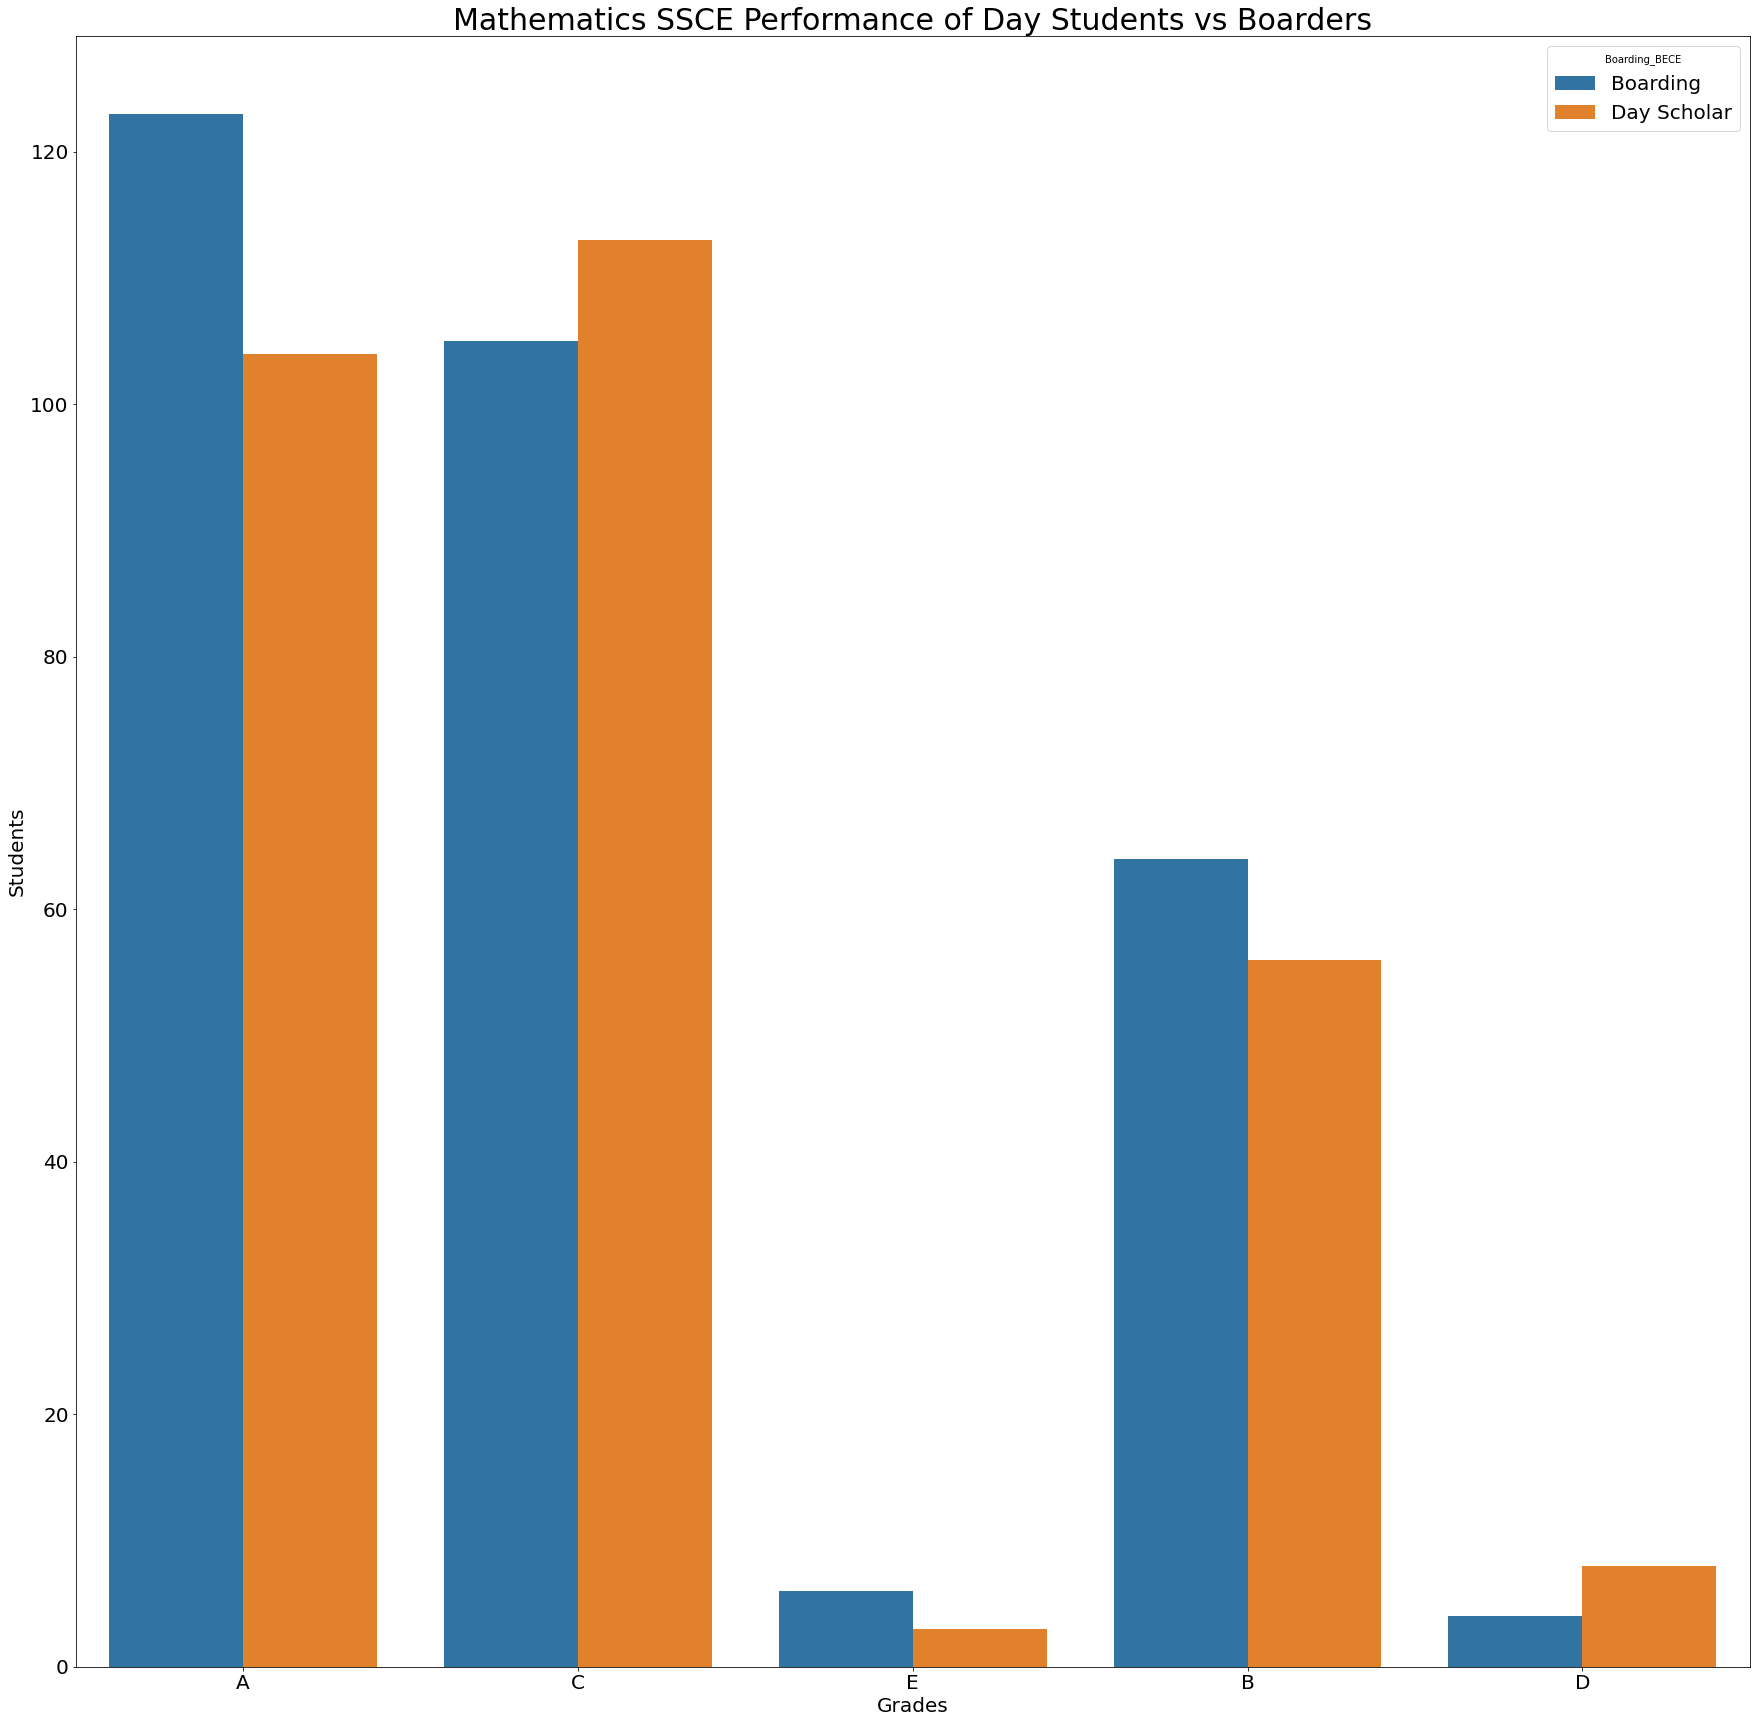

In [96]:
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df['MATHEMATICS_SSCE_Grades'],hue='Boarding_BECE',data=df)
plt.xlabel('Grades', fontsize=20) 
plt.ylabel('Students', fontsize=20)
plt.title("Mathematics SSCE Performance of Day Students vs Boarders", fontsize=30)
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=20)   
plt.show()

## DATA CLEANING

In [97]:
df.columns

Index(['Year_BECE', 'CANDIDATE NAME', 'School', 'Boarding_BECE', 'City',
       'Gender', 'ENGLISH_BECE', 'MATHEMATICS_BECE', 'AGRIC_BECE',
       'BASIC SCIENCE_BECE', 'BASIC TECHNOLOGY_BECE', 'SOCIAL STUDY_BECE',
       'CIVIC EDUCATION_BECE', 'CREATIVE AND CULTURAL ART_BECE', 'Year_SSCE',
       'Department', 'Boarding_SSCE', 'ENGLISH_SSCE', 'MATHEMATICS_SSCE',
       'BIOLOGY_SSCE', 'CHEMISTRY_SSCE', 'PHYSICS_SSCE', 'ECONOMICS_SSCE',
       'GOVERNMENT_SSCE', 'LITERATURE_SSCE', 'JAMB_SCORE', 'JAMB_SCORE_Grades',
       'ENGLISH_BECE_Grades', 'MATHEMATICS_BECE_Grades', 'AGRIC_BECE_Grades',
       'BASIC SCIENCE_BECE_Grades', 'BASIC TECHNOLOGY_BECE_Grades',
       'SOCIAL STUDY_BECE_Grades', 'CIVIC EDUCATION_BECE_Grades',
       'CREATIVE AND CULTURAL ART_BECE_Grades', 'BIOLOGY_SSCE_Grades',
       'ENGLISH_SSCE_Grades', 'MATHEMATICS_SSCE_Grades',
       'CHEMISTRY_SSCE_Grades', 'PHYSICS_SSCE_Grades', 'ECONOMICS_SSCE_Grades',
       'GOVERNMENT_SSCE_Grades', 'LITERATURE_SSCE_Grades']

>Label Encoding of School Names

In [98]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df['School'] = lb.fit_transform(df['School'])


>Label Encoding of Boarding Feature

In [99]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df['Boarding_BECE'] = lb.fit_transform(df['Boarding_BECE'])





>Label Encoding of Gender Feature

In [100]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df['Gender'] = lb.fit_transform(df['Gender'])


>Label Encoding of Department Feature

In [101]:
df.count()

Year_BECE                                586
CANDIDATE NAME                           586
School                                   586
Boarding_BECE                            586
City                                     586
Gender                                   586
ENGLISH_BECE                             586
MATHEMATICS_BECE                         586
AGRIC_BECE                               586
BASIC SCIENCE_BECE                       586
BASIC TECHNOLOGY_BECE                    586
SOCIAL STUDY_BECE                        586
CIVIC EDUCATION_BECE                     586
CREATIVE AND CULTURAL ART_BECE           586
Year_SSCE                                586
Department                               584
Boarding_SSCE                            586
ENGLISH_SSCE                             586
MATHEMATICS_SSCE                         586
BIOLOGY_SSCE                             387
CHEMISTRY_SSCE                           387
PHYSICS_SSCE                             387
ECONOMICS_

>Two Students do not have their department provided in the data, we will be replacing it with Science or Art based on their subject combination


In [102]:
for i in range(len(df)):
    if df['Department'][i]!= df['Department'][i]:
        if df['CHEMISTRY_SSCE'][i] != df['CHEMISTRY_SSCE'][i]:
            #art student
            df['Department'][i] = 'Art'
        else:
            #science student
            df['Department'][i] = 'Science'

In [103]:
df['Department'].count()

586

In [104]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
df['Department'] = lb.fit_transform(df['Department'])


>Take the 5 subject Combinations each student sat for wether Science or Art and Form new Columns

In [105]:
df['Subject 1'] = 0
df['Subject 2'] = 0
df['Subject 3'] = 0
df['Subject 4'] = 0
df['Subject 5'] = 0

In [106]:
for i in range(len(df)):
    if df['Department'][i] == 1:
        df['Subject 1'][i] = df['ENGLISH_SSCE'][i]
        df['Subject 2'][i] = df['MATHEMATICS_SSCE'][i]
        df['Subject 3'][i] = df['BIOLOGY_SSCE'][i]
        df['Subject 4'][i] = df['CHEMISTRY_SSCE'][i]
        df['Subject 5'][i] = df['PHYSICS_SSCE'][i]
        
        if df['PHYSICS_SSCE'][i] != df['PHYSICS_SSCE'][i]:
            #Replace missing value with mean
            df['Subject 5'][i] = df['PHYSICS_SSCE'].mean()
            
    else:
        df['Subject 1'][i] = df['ENGLISH_SSCE'][i]
        df['Subject 2'][i] = df['MATHEMATICS_SSCE'][i]
        df['Subject 3'][i] = df['ECONOMICS_SSCE'][i]
        df['Subject 4'][i] = df['GOVERNMENT_SSCE'][i]
        df['Subject 5'][i] = df['LITERATURE_SSCE'][i]
        
        if df['LITERATURE_SSCE'][i] != df['LITERATURE_SSCE'][i]:
            #Replace missing value with mean
            df['Subject 5'][i] = df['LITERATURE_SSCE'].mean()
            
        

In [107]:
df.count()

Year_BECE                                586
CANDIDATE NAME                           586
School                                   586
Boarding_BECE                            586
City                                     586
Gender                                   586
ENGLISH_BECE                             586
MATHEMATICS_BECE                         586
AGRIC_BECE                               586
BASIC SCIENCE_BECE                       586
BASIC TECHNOLOGY_BECE                    586
SOCIAL STUDY_BECE                        586
CIVIC EDUCATION_BECE                     586
CREATIVE AND CULTURAL ART_BECE           586
Year_SSCE                                586
Department                               586
Boarding_SSCE                            586
ENGLISH_SSCE                             586
MATHEMATICS_SSCE                         586
BIOLOGY_SSCE                             387
CHEMISTRY_SSCE                           387
PHYSICS_SSCE                             387
ECONOMICS_

In [108]:
df.columns

Index(['Year_BECE', 'CANDIDATE NAME', 'School', 'Boarding_BECE', 'City',
       'Gender', 'ENGLISH_BECE', 'MATHEMATICS_BECE', 'AGRIC_BECE',
       'BASIC SCIENCE_BECE', 'BASIC TECHNOLOGY_BECE', 'SOCIAL STUDY_BECE',
       'CIVIC EDUCATION_BECE', 'CREATIVE AND CULTURAL ART_BECE', 'Year_SSCE',
       'Department', 'Boarding_SSCE', 'ENGLISH_SSCE', 'MATHEMATICS_SSCE',
       'BIOLOGY_SSCE', 'CHEMISTRY_SSCE', 'PHYSICS_SSCE', 'ECONOMICS_SSCE',
       'GOVERNMENT_SSCE', 'LITERATURE_SSCE', 'JAMB_SCORE', 'JAMB_SCORE_Grades',
       'ENGLISH_BECE_Grades', 'MATHEMATICS_BECE_Grades', 'AGRIC_BECE_Grades',
       'BASIC SCIENCE_BECE_Grades', 'BASIC TECHNOLOGY_BECE_Grades',
       'SOCIAL STUDY_BECE_Grades', 'CIVIC EDUCATION_BECE_Grades',
       'CREATIVE AND CULTURAL ART_BECE_Grades', 'BIOLOGY_SSCE_Grades',
       'ENGLISH_SSCE_Grades', 'MATHEMATICS_SSCE_Grades',
       'CHEMISTRY_SSCE_Grades', 'PHYSICS_SSCE_Grades', 'ECONOMICS_SSCE_Grades',
       'GOVERNMENT_SSCE_Grades', 'LITERATURE_SSCE_Grades',

In [109]:
df_X = df[['School', 'Boarding_BECE',
       'Gender', 'ENGLISH_BECE', 'MATHEMATICS_BECE', 'AGRIC_BECE',
       'BASIC SCIENCE_BECE', 'BASIC TECHNOLOGY_BECE', 'SOCIAL STUDY_BECE',
       'CIVIC EDUCATION_BECE', 'CREATIVE AND CULTURAL ART_BECE',
       'Department', 'Subject 1',
       'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5']]
df_y = df[['JAMB_SCORE']]

# TRAIN LINEAR REGRESSION MODEL TO PREDICT JAMB SCORE

In [110]:
#data with Data Processing
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df_X , df_y, test_size=0.3) # 70% training and 30% test


In [111]:
from sklearn import datasets, linear_model

In [112]:
regr = linear_model.LinearRegression()
regr.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
y_pred = regr.predict(X1_test)

In [114]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y_pred))

Coefficients: 
 [[ 5.61410937  2.17506189  6.72264435 -0.13272136  0.42504503 -0.0074033
   0.29099775 -0.01767824  0.07533804  0.11015004 -0.34655999  0.9725486
   0.15242212  0.16339152  0.14296867  0.07854488 -0.02350632]]
Mean squared error: 726.33
Coefficient of determination: 0.05


In [115]:
#Using kfolds with K = 5
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'Coefficients', 'Mean squared error', 'Coefficient of determination'])

X = df_X
y =  df_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    regr.fit(X.iloc[train], y.iloc[train])
    y_pred = regr.predict(X.iloc[test])
    rcoefficient = regr.coef_
    mse = mean_squared_error(y_pred, y.iloc[test])
    cd = r2_score(y_pred, y.iloc[test])
    results.loc[0] = [i, rcoefficient, mse, cd]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,Coefficients,Mean squared error,Coefficient of determination
0,0,"[[7.394527727184189, 1.3218003829999865, 7.275...",706.692029,-6.206318
1,1,"[[1.7932636774584294, 0.974172175117643, 4.651...",589.048987,-8.496914
2,2,"[[0.8183210649531936, 1.1841263450061283, -0.0...",1014.362062,-12.617075
3,3,"[[-0.3591252742506018, 1.3403614651341913, 3.7...",775.412588,-9.720622
4,4,"[[-1.6118079709095214, 0.15846738304266583, 0....",974.317392,-10.168356


In [116]:
#Using Stratifiedfolds with K = 5
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'Coefficients', 'Mean squared error', 'Coefficient of determination'])
X = df_X
y =  df_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    regr.fit(X.iloc[train], y.iloc[train])
    y_pred = regr.predict(X.iloc[test])
    rcoefficient = regr.coef_
    mse = mean_squared_error(y_pred, y.iloc[test])
    cd = r2_score(y_pred, y.iloc[test])
    results.loc[0] = [i, rcoefficient, mse, cd]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,Coefficients,Mean squared error,Coefficient of determination
0,0,"[[-3.953141957854076, -3.279155974127404, -1.0...",760.268349,-8.681972
1,1,"[[2.7428858399036, 3.6934985859162586, 3.58150...",707.323682,-8.884191
2,2,"[[4.023329410840448, 1.5894904123374993, 7.229...",878.021042,-9.095223
3,3,"[[3.0557906032258804, 1.7832435603074965, 4.29...",841.984540,-9.888803
4,4,"[[0.6195659583050731, -0.02326800524434602, 1....",797.691986,-12.268943


# TRAIN RANDOM FOREST REGRESSOR MODEL TO PREDICT JAMB SCORE

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X1_train, y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [119]:
y_pred = regr.predict(X1_test)

In [120]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y_pred))

Mean squared error: 769.69
Coefficient of determination: -0.01


In [121]:
#Using kfolds with K = 5
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'Mean squared error', 'Coefficient of determination'])
X = df_X
y =  df_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    regr.fit(X.iloc[train], y.iloc[train])
    y_pred = regr.predict(X.iloc[test])
    mse = mean_squared_error(y_pred, y.iloc[test])
    cd = r2_score(y_pred, y.iloc[test])
    results.loc[0] = [i, mse, cd]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,Mean squared error,Coefficient of determination
0,0.0,624.537652,-37.147218
1,1.0,641.151933,-12.535095
2,2.0,1007.774338,-77.776895
3,3.0,748.478192,-27.430793
4,4.0,918.745158,-51.906399


In [122]:
#Using Stratifiedfolds with K = 5
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'Mean squared error', 'Coefficient of determination'])
X = df_X
y =  df_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    regr.fit(X.iloc[train], y.iloc[train])
    y_pred = regr.predict(X.iloc[test])
    mse = mean_squared_error(y_pred, y.iloc[test])
    cd = r2_score(y_pred, y.iloc[test])
    results.loc[0] = [i, mse, cd]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,Mean squared error,Coefficient of determination
0,0.0,810.503127,-6.805219
1,1.0,667.580264,-20.463586
2,2.0,865.471789,-21.542211
3,3.0,789.683754,-39.395895
4,4.0,852.496502,-75.431309


# TRAIN LASSO REGRESSION MODEL TO PREDICT JAMB SCORE

In [123]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

In [124]:
clf.fit(X1_train, y1_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
y_pred = clf.predict(X1_test)

In [126]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y_pred))

Mean squared error: 719.85
Coefficient of determination: 0.05


In [127]:
#Using kfolds with K = 5
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'Mean squared error', 'Coefficient of determination'])
X = df_X
y =  df_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    mse = mean_squared_error(y_pred, y.iloc[test])
    cd = r2_score(y_pred, y.iloc[test])
    results.loc[0] = [i, mse, cd]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,Mean squared error,Coefficient of determination
0,0.0,694.109127,-6.472976
1,1.0,586.411824,-8.668321
2,2.0,1008.786854,-12.952196
3,3.0,771.343727,-10.030554
4,4.0,972.864212,-10.400449


In [128]:
#Using Stratifiedfolds with K = 5
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'Mean squared error', 'Coefficient of determination'])
X = df_X
y =  df_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    y_pred = clf.predict(X.iloc[test])
    mse = mean_squared_error(y_pred, y.iloc[test])
    cd = r2_score(y_pred, y.iloc[test])
    results.loc[0] = [i, mse, cd]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,Mean squared error,Coefficient of determination
0,0.0,749.356212,-8.891203
1,1.0,701.085829,-9.143162
2,2.0,870.688900,-9.435361
3,3.0,835.681446,-10.247672
4,4.0,798.808485,-12.508405


# TRAIN SUPPORT VECTOR MACHINE MODEL TO PREDICT JAMB SCORE

In [129]:
from sklearn.svm import SVC
svclassifier_1 = SVC(kernel='linear')
svclassifier_1.fit(X1_train, y1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [130]:
y_pred = svclassifier_1.predict(X1_test)

In [131]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y_pred))

Mean squared error: 1489.43
Coefficient of determination: -0.96


In [132]:
#Using kfolds with K = 5
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'Mean squared error', 'Coefficient of determination'])
X = df_X
y =  df_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    svclassifier_1.fit(X.iloc[train], y.iloc[train])
    y_pred = svclassifier_1.predict(X.iloc[test])
    mse = mean_squared_error(y_pred, y.iloc[test])
    cd = r2_score(y_pred, y.iloc[test])
    results.loc[0] = [i, mse, cd]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,Mean squared error,Coefficient of determination
0,0.0,1861.084746,-0.190317
1,1.0,1388.683761,-0.148386
2,2.0,1680.880342,-0.840267
3,3.0,1341.863248,-0.435316
4,4.0,2009.435897,-0.556102


In [133]:
#Using Stratifiedfolds with K = 5
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'Mean squared error', 'Coefficient of determination'])
X = df_X
y =  df_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    svclassifier_1.fit(X.iloc[train], y.iloc[train])
    y_pred = svclassifier_1.predict(X.iloc[test])
    mse = mean_squared_error(y_pred, y.iloc[test])
    cd = r2_score(y_pred, y.iloc[test])
    results.loc[0] = [i, mse, cd]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,Mean squared error,Coefficient of determination
0,0.0,1707.593220,-0.363987
1,1.0,1511.324786,-0.326741
2,2.0,1624.119658,-0.462804
3,3.0,1804.111111,-0.398042
4,4.0,1891.846154,-1.040375


# TRAIN MULTIPLE LINNEAR REGRESSION MODEL TO PREDICT JAMB SCORE 

In [134]:
from sklearn import linear_model

In [135]:
regr = linear_model.LinearRegression()
regr.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
y_pred = svclassifier_1.predict(X1_test)

In [137]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y_pred))

Mean squared error: 573.94
Coefficient of determination: 0.25


In [138]:
#Using kfolds with K = 5
kfold = KFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'Mean squared error', 'Coefficient of determination'])
X = df_X
y =  df_y
for (train, test), i in zip(kfold.split(X, y), range(5)):
    regr.fit(X.iloc[train], y.iloc[train])
    y_pred = regr.predict(X.iloc[test])
    mse = mean_squared_error(y_pred, y.iloc[test])
    cd = r2_score(y_pred, y.iloc[test])
    results.loc[0] = [i, mse, cd]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,Mean squared error,Coefficient of determination
0,0.0,706.692029,-6.206318
1,1.0,589.048987,-8.496914
2,2.0,1014.362062,-12.617075
3,3.0,775.412588,-9.720622
4,4.0,974.317392,-10.168356


In [139]:
#Using Stratifiedfolds with K = 5
stratifiedKFold = StratifiedKFold(5, True, 1)
results = pd.DataFrame(columns=['k-fold', 'Mean squared error', 'Coefficient of determination'])
X = df_X
y =  df_y
for (train, test), i in zip(stratifiedKFold.split(X, y), range(5)):
    regr.fit(X.iloc[train], y.iloc[train])
    y_pred = regr.predict(X.iloc[test])
    mse = mean_squared_error(y_pred, y.iloc[test])
    cd = r2_score(y_pred, y.iloc[test])
    results.loc[0] = [i, mse, cd]
    results.index = results.index + 1
results = results.reset_index(drop=True)
results

,k-fold,Mean squared error,Coefficient of determination
0,0.0,760.268349,-8.681972
1,1.0,707.323682,-8.884191
2,2.0,878.021042,-9.095223
3,3.0,841.984540,-9.888803
4,4.0,797.691986,-12.268943
